In [ ]:
! pip install scikit-multilearn

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from skmultilearn.adapt import mlknn
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from datetime import datetime
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/akshat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Stack Overflow: Tag Prediction

## Business Problem

### Description

<p style='font-size:18px'><b> Description </b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Suggest the tags based on the content that was there in the question posted on Stackoverflow.

<p style='font-size:18px'><b> Source:  </b> https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/</p>


## Source/Useful links

Data Source : https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data <br>
Youtube : https://youtu.be/nNDqbUhtIRg <br>
Research paper : https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tagging-1.pdf <br>
Research paper : https://dl.acm.org/citation.cfm?id=2660970&dl=ACM&coll=DL

## Real Wordl/Business objectives and constraints

# Machine learning Problem

## Data

### Data overview

Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data
<br>
All of the data is in 2 files: Train and Test.<br />
<pre>
<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />
</pre>
The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).<br />
<br />


__Data Field Explaination__

Dataset contains 6,034,195 rows. The columns in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')<br />
</pre>

<br />

### Example data point

<pre>
<b>Title</b>:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
<b>Body </b>: <pre><code>
        #include&lt;
        iostream&gt;\n
        #include&lt;
        stdlib.h&gt;\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         
                 cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y&lt;n+1; y++)\n         
                 {\n                 
                    cin&gt;&gt;m[y];\n                 
                    cin&gt;&gt;u[y];\n         
                 }\n         
                 for(x=1; x&lt;n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1&lt;n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i&lt;n+1; i++)\n         
                 {\n            
                    for(int l=1; l&lt;=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j&lt;4; j++)\n            
                    {\n                
                        cout&lt;&lt;e[i][j];\n                
                        for(int k=0; k&lt;n-(i+1); k++)\n                
                        {\n                    
                            cout&lt;&lt;a[k]&lt;&lt;"\\t";\n               
                        }\n                
                        cout&lt;&lt;"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        </code></pre>\n\n
        <p>The answer should come in the form of a table like</p>\n\n
        <pre><code>       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        </code></pre>\n\n
        <p>if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)</p>\n\n
        <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'
<b>Tags </b>: 'c++ c'
</pre>

## Mapping the real-world problem to a Machine learning problem

### Type of Machine learning problem

<p> It is a multi-label classification problem  <br>
<b>Multi-label Classification</b>: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these. <br>
__Credit__: http://scikit-learn.org/stable/modules/multiclass.html
</p>

### Performance metric

<b>Micro-Averaged F1-Score (Mean F Score) </b>: 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

<i>F1 = 2 * (precision * recall) / (precision + recall)</i><br>

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. <br>

<b>'Micro f1 score': </b><br>
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.
<br>

<b>'Macro f1 score': </b><br>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
<br>

https://www.kaggle.com/wiki/MeanFScore <br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html <br>
<br>
<b> Hamming loss </b>: The Hamming loss is the fraction of labels that are incorrectly predicted. <br>
https://www.kaggle.com/wiki/HammingLoss <br>

# Exploratory data analysis

## Data loading and cleaning

### Using pandas and SQLite to load the data.

In [2]:
TRAIN_DB = 'so_train.db'

In [ ]:
if not os.path.isfile(TRAIN_DB):
    start = datetime.now()
    disk_engine = create_engine(f'sqlite:///{TRAIN_DB}')
    start = dt.datetime.now()
    chunkside = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv(
            './data/stackOverflow/Train.csv',
            names=['Id', 'Title', 'Body', 'Tags'],
            chunksize=chunksize,
            iterator=True,
            encoding='utf-8',
    ):
        df.index += index_start
        j += 1
        print(f'{j*chunksize} rows')
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1
    print(f'Time taken to run this cell :{datetime.now() - start}')

### counting the number of rows

In [ ]:
if os.path.isfile(TRAIN_DB):
    start = datetime.now()
    con = sqlite3.connect(TRAIN_DB)
    num_rows = pd.read_sql_query("""
    SELECT count(*) FROM data
    """, con)
    print(f"Number of rows in the database : {num_rows['count(*)'].values[0]}")
    con.close()
    print(f"Time taken to count the number of rows : {datetime.now() - start}")
else:
    print("Please download the train.db")

### Checking for duplicates

In [ ]:
if os.path.isfile(TRAIN_DB):
    start = datetime.now()
    con = sqlite3.connect(TRAIN_DB)
    df_no_dup = pd.read_sql_query(
        """
    SELECT Title, Body, Tags, COUNT(*) as cnt_dup
    FROM data GROUP BY Title, Body, Tags
    """, con)
    con.close()
    print(f"Time taken to run this cell : {datetime.now() - start}")
else:
    print("Please download the train.db")

In [ ]:
df_no_dup.head()
# We can see that there are duplicated in the dataset

In [ ]:
print(
    f"""No of duplicated questions: {num_rows['count(*)'].values[0]- df_no_dup.shape[0]}, (
    {
        (1-(
            (df_no_dup.shape[0])/(num_rows['count(*)'].values[0])
        ))*100
    }%
    )"""
)

In [ ]:
df_no_dup.cnt_dup.value_counts()

In [ ]:
start = datetime.now()
df_no_dup["tag_count"] = df_no_dup["Tags"].apply(
    lambda text: len(str(text).split(" ")))
# adding a new feature number of tags per question
print("Time taken to run this cell :", datetime.now() - start)
df_no_dup.head()

In [ ]:
# distribution of number of tags per question
df_no_dup.tag_count.value_counts()

### Creating a new database with no duplicates

In [3]:
TRAIN_NO_DUB = "so_train_no_dub.db"

In [ ]:
if not os.path.isfile(TRAIN_NO_DUB):
    disk_dup = create_engine(f'sqlite:///{TRAIN_NO_DUB}')
    no_dup = pd.DataFrame(df_no_dup, columns=['Title', 'Body', 'Tags'])
    no_dup.to_sql('no_dub_train', disk_dup)

In [ ]:
if os.path.isfile(TRAIN_NO_DUB):
    con = sqlite3.connect(TRAIN_NO_DUB)
    tag_data = pd.read_sql_query("""
    SELECT Tags FROM no_dub_train
    """, con)
    con.close()
    
    # Dropping unwanted column
    tag_data.drop(tag_data.index[0], inplace=True)
    # Dropping null values
    tag_data.dropna(inplace=True)
    # Displaying data
    tag_data.head()
else:
    print("Please download the train.db")

## Analysis of Tags

### Total no of unique tags

In [ ]:
# Importing & initializing the CountVectorizer object which is sklearn's bag of words tool.

vectorizer = CountVectorizer(tokenizer = lambda x : x.split())

# Fit transform does two functions:
# First : It fits the model and learns the vocabulary.
# Second: It transforms our training data into features vectors.
tag_dtm = vectorizer.fit_transform(tag_data['Tags'])

In [ ]:
print(f'No of data points : {tag_dtm.shape[0]}')
print(f'No of unique tags : {tag_dtm.shape[1]}')

In [ ]:
# function get_feature_names will give us the vocabulary
tags = vectorizer.get_feature_names()
print(f'Some of the tags we have : {tags[:10]}')

### Number of times a tag appeared

In [ ]:
# Storing the document term matrix in a dictionary.
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [ ]:
# Saving this dictionary to csv files.
TAG_CSV = 'so_tag_counts_dtm.csv'
if not os.path.isfile(TAG_CSV):
    with open(TAG_CSV, "w") as csv_file:
        writer = csv.writer(csv_file)
        for key, val in result.items():
            writer.writerow([key, val])
tag_df = pd.read_csv(TAG_CSV, names=['Tags', 'Counts'])
tag_df.head()

In [ ]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

### Plotting distribution of tags

In [ ]:
plt.plot(tag_counts)
plt.title('Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel('Tag Number')
plt.ylabel("Number of times tag appeared")
plt.show()

<pre>From above we can see that majority of the tags are appearing very few times and very less tags are taking majority of the counts. So now lets zoom in a little bit and consider only first 10,000 tags.
</pre>

In [ ]:
plt.plot(tag_counts[:10000])
plt.title("First 10k tags: Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel('Tag number')
plt.ylabel('Number of times tag appeared')
plt.show()
print(tag_counts[:10000:25])

<pre>
Still we can not get any more information then out previous plot, so now lets zoom in a little bit more and use only 500 most popular tags.
</pre>

In [ ]:
plt.plot(tag_counts[:500])
plt.title("First 10k tags: Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel('Tag number')
plt.ylabel('Number of times tag appeared')
plt.show()
print(tag_counts[:500:5])

<pre>
Now are seeing some details in the plot. Now we can see that it is forming a power law distribution. So now let us only observe top 100 tags.
</pre>

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)

plt.plot(tag_counts[:100], c='b')
plt.scatter(
    x= list(range(0, 100, 5)),
    y= tag_counts[0:100:5],
    c= 'red',
    label= 'qunatiles with 0.05 intervals',
)
plt.scatter(
    x= list(range(0, 100, 25)),
    y= tag_count[0:100:25],
    c= 'blue',
    label= 'quantiles with 0.25 intervals'
)

for x, y in zip(list(range(0, 100, 25)), tag_counts[0:100:25]):
    plt.annotate(s=f"({x,y})", xy=(x, y), xytext=(x-0.05, y+500))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [ ]:
# Storing tags greater than 10k in one list
lst_tags_gt_10k = tag_df[tag_df.Counts>10000].Tags

# print the length of the list
print(f'{len(lst_tags_gt_10k)} Tags are used more than 10k times')

# Storing tags greater than 100k in one list
lst_tags_gt_100k = tag_df[tag_df.Counts>100000].Tags

# print the length of the list
print(f'{len(lst_tags_gt_100k)} Tags are used more than 100k times')

<b> Observations: </b>
- There are total 153 tags which are used more than 10k times.
- 14 tags are used more than 100k times.
- Most frequent tag(ie C#) is used 331505 times.
- Since some tags occured much more frequently than others, Micro-averaged F1-score is the appropriate metric for this problem.

### Tags per questions

In [ ]:
# storing the count of tag in each question in list 'tag_count'
tag_quest_count = tag_dtm.sum(axis=1).tolist()
# converting list of lists into single list
tag_quest_count = [int(j) for i in tag_quest_count for j in i]
print(f'We have total {len(tag_quest_count)} datapoints')

print(tag_quest_count[:5])

In [ ]:
print(f'Maximum no of tags per question: {max(tag_quest_count)}')
print(f'Minimum no of tags per question: {min(tag_quest_count)}')
print(f'Avg no of tags per question: {sum(tag_quest_count)/len(tag_quest_count)}')

In [ ]:
sns.countplot(tag_quest_count, palette='gist_rainbow')
plt.title("Number of tags in the questions")
plt.xlabel("Number of tags")
plt.ylabel("Number of questions")
plt.show()

<b>Observations :</b>
- Maximum no of tags per question is 5
- Minimum no of tags per question is 1
- Average no of tags per question is 2.899
- Most of the questions are having 2 or 3 tags

### Most frequent tags

In [ ]:
wordcloud = WordCloud(
    background_color='black',
    width=1600,
    height=800
).generate_from_frequencies(result)

fig= plt.figure(figsize= (30, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

<b>Observations:</b><br/>
A look at the word cloud shows that c# java php javascript c++ are some of the most frequent tags.

### The top 20 tags

In [ ]:
i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df_sorted['Tags'][:30])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show();

<b>Observations:</b>
- Majority of the most frequent tags are programming language.
- C# is the top most frequent programming language.
- Android, IOS, Linux and windows are among the top frequent OS's.

## Cleaning and preprocessing of questions

### Preprocessing

1. Sample 1M data points.
2. Seperate out code snippets from the body.
3. Remove special characters from question title and description.
4. Remove stop words (Except 'C')
5. Remove HTML Tags.
6. Convert all the characters into small letters.
7. Use SnowBallStemmer to stem the words.

In [4]:
def striphtml(data):
    cleanr = re.compile("<.*?>")
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext

print(striphtml("""
Hi this is test html:
<html>
    <h1>Hello World</h1>
    <br/>
    <p>My choice is always Pytorch</p>
</html>
"""))


Hi this is test html:
 
     Hello World 
     
     My choice is always Pytorch 
 



In [5]:
# initializing stemmer
stop_words = {'yourselves', 'wasn', 'are', 'ours', 'here', 'about', 'yourself', 'too', 'our', "shan't", 'you', 'at', 'hadn', 'most', 'isn', "you'd", 'of', "mightn't", 'now', 'shouldn', 'm', 'were', 'being', 'with', 'its', 'am', 'not', "you'll", 'be', 'against', 'they', 'have', 'further', 'theirs', "couldn't", 'below', 'as', 'him', 'above', 'them', "haven't", "isn't", 'won', "you've", 'himself', 'don', 'is', 'by', 'itself', 'all', 'doing', 'your', "shouldn't", 'off', 'it', 'some', 'few', 'just', 'under', "you're", 'why', 'who', 'o', 'ma', 'does', 'through', 'once', 'more', 'whom', 'll', 'and', 'then', 'how', 'd', "won't", 'there', 'i', 'during', 't', 'so', 'can', "mustn't", 'couldn', 'ain', 'hasn', 'she', 'than', 'had', 'after', "weren't", 'while', 'wouldn', 'hers', "didn't", 'into', 'needn', 'myself', 'between', "hadn't", 'aren', 'their', 'haven', 'up', 'did', 'that', 'no', "it's", "that'll", "don't", 'a', 'such', "hasn't", 'an', 'mightn', 'on', 'other', "wasn't", 'we', 'same', 'should', 'my', 'own', 'nor', 'those', "should've", 'having', 'each', 'very', 'been', 'has', 'her', "she's", 'herself', 'didn', 'doesn', "wouldn't", 'from', 'mustn', 'his', 'but', 'because', 'the', 'over', 'or', 'yours', 're', 'what', "needn't", 'both', 'if', 'only', 'was', 'ourselves', 'he', 'this', 'these', 'before', 'in', 'y', 'shan', 'themselves', 'down', 'do', 'again', 'to', 'which', 's', 've', 'where', "aren't", 'out', 'for', 'me', 'until', 'when', 'any', 'will', 'weren', "doesn't"}
stemmer = SnowballStemmer("english")

In [6]:
def create_connection(db_file: str):
    """
    Create a database connection to the SQLite database specified by the db_file
    :param db_file: database file
    :return: connection object or None
    """
    try:
        return sqlite3.connect(db_file)
    except Exception as e:
        print(e)
    return None


def create_table(conn, create_table_sql: str)-> None:
    """
    Create table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c= conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
        
def check_table_exist(dbcon):
    cursor= dbcon.cursor()
    query= "SELECT name FROM sqlite_master WHERE type='table'"
    table_names= cursor.execute(query)
    print("Table in the database")
    tables= table_names.fetchall()
    print(tables[0][0])
    return (len(tables))


def create_database_table(database:str, query:str):
    conn= create_connection(database)
    if conn is not None:
        create_table(conn, query)
        check_table_exist(conn)
    else:
        print("Error! cannot create the database connection.")
    conn.close()

In [7]:
PROCESSED_DB= "StackOverflowProcessed.db"

In [8]:
sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed(
    question text NOT NULL,
    code text,
    tags text,
    words_pre integer,
    words_post integer,
    is_code integer);"""
create_database_table(PROCESSED_DB, sql_create_table)

Table in the database
QuestionsProcessed


In [9]:
# No of rows to fetch
ROWS_FETCH= 250000
read_db= TRAIN_NO_DUB
write_db= PROCESSED_DB

if os.path.isfile(read_db):
    print("Connecting reader")
    conn_r= create_connection(read_db)
    if conn_r is not None:
        reader= conn_r.cursor()
        # Randomly Selecting rows form the database 
        reader.execute(f"""SELECT Title, Body, Tags FROM no_dub_train 
                       ORDER BY RANDOM() LIMIT {ROWS_FETCH};""")
        
if os.path.isfile(write_db):
    print("Connecting writer")
    conn_w= create_connection(write_db)
    if conn_w is not None:
        tables= check_table_exist(conn_w)
        writer= conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print('Cleared all the rows')

Connecting reader
Connecting writer
Table in the database
QuestionsProcessed
Cleared all the rows


### We create a new database to store the sampled and preprocessed question

In [10]:
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/

start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:

    is_code = 0

    title, question, tags = row[0], row[1], row[2]

    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x

    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))

    title=title.encode('utf-8')

    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100==0):
        print("number of questions completed=",questions_proccesed)
        print(code)
        print(' '*40+'question')
        print(question)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

number of questions completed= 100
[]
                                        question
wysiwyg xhtml text area keyboard shortcut web base tabl editor mani textarea textarea contain html content would like user abl edit wysiwyg style sinc user love use keyboard would like simpl way add keyboard shortcut includ shortcut ad div custom class name http markitup jaysalvat com home come close need problem wysiwyg http premiumsoftwar net cleditor also close keyboard shortcut
number of questions completed= 200
['public abstract class Unit {\n    protected string _name;\n    public Unit(string name)\n    {\n        _name = name;\n    }\n}\n', 'public class Metre : Unit {\n    public Metre() : base("Metre")\n    {\n    }\n}\n\npublic class Inch : Unit {\n    public Metre() : base("Inch")\n    {\n    }\n}\n', 'public static class UnitConvertor\n{\n    public Unit Convert(Unit from, Type to) : where Type extends/inherits from Unit\n    {\n        // do the conversion\n        return the instance of

number of questions completed= 1300
['people', 'id (PK)', 'fname', 'lname', '$rs = mysql_query("SELECT * FROM people");\nwhile($row=mysql_fetch_array($rs)){\n    ...do stuff...\n}\n', 'email', "$results['email']"]
                                        question
php loop mysql result array tabl call column simpl enough setup loop data howev look loop column valu pair array automat ad new column call central function pull loop array
number of questions completed= 1400
['console.log', '&lt;div data-bind="madeUpBinding: {}"&gt;No error here...&lt;/div&gt;\n', 'madeUpBinding']
                                        question
forc error bind handler found knockoutj set bind handler load use requirej problem turn ko bind handler ad fair enough problem error happen knockout ignor bind handler regist way forc error least bind handler found exampl html snippet pars knockoutj show error anyth even though regist bind handler
number of questions completed= 1500
[]
                                 

number of questions completed= 2700
['import java.util.*;\nimport java.lang.*;\nimport java.io.*;\n\nclass Marks{\n\n            float age,S1,S2,S3,S4,S5;\n            String Name,Roll;\n\n\n\n            void displayMarks() {\n\n\n\n                Scanner input = new Scanner(System.in);\n\n                System.out.println("Enter your name:");\n                Name=input.nextLine();\n\n                System.out.println("Enter your Roll no:");\n                Roll=input.nextLine();\n\n                System.out.println("Enter the marks of first subject:");\n                S1=input.nextFloat();\n\n                System.out.println("Enter the marks of second subject:");\n                S2=input.nextFloat();\n\n                System.out.println("Enter the marks of third subject:");\n                S3=input.nextFloat();\n\n                System.out.println("Enter the marks of fourth subject:");\n                S4=input.nextFloat();\n\n                System.out.println("Enter th

number of questions completed= 3300
['                         Table "public.statistics"\n\nid         | integer                | not null default nextval(\'statistics_id_seq\'::regclass)\ngoals      | hstore                 | \n', '|id    |goals                  |\n|30059 |"3"=&gt;"123"             |\n|27333 |"3"=&gt;"200", "5"=&gt;"10"  |\n', 'select sum(goals) from statistics\n', '|goals                 |\n|"3"=&gt;"323", "5"=&gt;"10" |\n']
                                        question
aggreg hstore column postresql tabl like item need aggreg valu key hash want get result like return
number of questions completed= 3400
[]
                                        question
benefit use ejb webappl develop databas driven web applic java ee wonder benefit use ejb understand correct best practic use ejb everi kind busi logic databas transact use hibern jpa question benefit use inject ejb dao instead regular java class dao get call manag bean differ new java ee might beginn question
numb

number of questions completed= 4500
['&lt;!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"&gt;\n&lt;html xmlns="http://www.w3.org/1999/xhtml" &gt;\n&lt;head&gt;\n    &lt;title&gt;jQuery Sortables Problem&lt;/title&gt;\n    &lt;script src="jquery-1.2.6.min.js" type="text/javascript"&gt;&lt;/script&gt;\n    &lt;script src="jquery-ui.min.js" type="text/javascript"&gt;&lt;/script&gt;\n\n    &lt;style type="text/css"&gt;\n     .items\n     {\n       margin-top: 30px;\n       margin-left: 0px;\n       padding-left: 25px;\n       cursor: move;\n     }\n     .items li\n     {\n       padding: 10px;\n       font-size: 15px;\n       border: 1px solid #666;\n       background: #eee;\n       width: 400px;\n       margin-bottom: 15px;\n       float: left;\n       clear:both;\n     }\n    &lt;/style&gt;\n\n&lt;/head&gt;\n&lt;body&gt;\n\n&lt;ol id="itemlist" class="items"&gt; \n    &lt;li id="1" class="item"&gt;\n     Item 1\n    

number of questions completed= 5300
['NSMutableArray *thisWeek = [today, tomorrow, sunday(Feb 24), monday (Feb 25), etc];\n']
                                        question
ad current futur date array creat custom type calendar tri see possibl store date array without static assign one exampl st date array would day first creat would save next week let say relev index array would best way go store futur date
number of questions completed= 5400
[]
                                        question
comment practic student comput engin pressur type detail comment everyth see use group project work place work project spend much time comment person project work grow complic sometim feel though comment also feel though wast time sinc probabl one work worth time clutter code thought edit given lot think thank input never expect larg respons
number of questions completed= 5500
[]
                                        question
algorithm retriev valu week date calcul algorithm need accept date

number of questions completed= 6600
['HSSFWorkbook wb = new HSSFWorkbook(template); //template is the source of file\nHSSFSheet sheet = wb.getSheet("SAMPLE");\nHSSFRow newRow;\nHSSFCell cellData;\n\nint createNewRowAt = 9; //Add the new row between row 9 and 10\n\nsheet.shiftRows(createNewRowAt, sheet.getLastRowNum(), 1, true, false);\nnewRow = sheet.createRow(createNewRowAt);\nnewRow = sheet.getRow(createNewRowAt);\n']
                                        question
insert row two row exist excel hssf apach poi somehow manag creat new row two row exist excel file problem format includ along shift row one row hide relat go along shift mean ex row hidden creat new row format still hidden row must also move insert creation new row anoth thing object sheet cell like text box move along new row creat like posit object fix want move thing insert new row past row excel function insert new row pleas let know right snippet code copi past row possibl would big help alreadi ask find solut decid

number of questions completed= 7800
[]
                                        question
make sharepoint page compat ie make sharepoint page compat ie anyon work similar requir basic thing take care ribbon control one refer link document pleas suggest regard ketan
number of questions completed= 7900
['public class Alarm extends BroadcastReceiver\n{\n    @Override\n    public void onReceive(Context context, Intent intent)\n    {\n        String message = intent.getStringExtra("message2");\n        Toast.makeText(context, message, Toast.LENGTH_SHORT).show();\n        Intent intent1 = new Intent(context, AlarmShow.class);\n        context.startActivity(intent1);\n\n    }\n}\n', '11-25 18:24:00.511: D/AndroidRuntime(2158): Shutting down VM\n11-25 18:24:00.511: W/dalvikvm(2158): threadid=1: thread exiting with uncaught exception (group=0x40015560)\n11-25 18:24:00.521: E/AndroidRuntime(2158): FATAL EXCEPTION: main\n11-25 18:24:00.521: E/AndroidRuntime(2158): java.lang.RuntimeException: Unable

number of questions completed= 8700
[]
                                        question
natur topolog powerset let say topolog set natur definit refer properti relationship member artifici otherwis exampl order topolog set real number natur discret topolog artifici suppos powerset set know thing member subset member defin order member term subset relationship order linear defin order topolog found topolog powerset would call natur one
number of questions completed= 8800
[]
                                        question
embed ms word document html curio know wheather possibl emb ms offic documet html without use third parti applic shown thank
number of questions completed= 8900
[]
                                        question
creat login system dreamweav cs hello work make websit big thing want login system nin login system want peopl abl regist login data nand login profil score person set ni would also like admin abl delet account edit pleas help would appreci alot
number of ques

number of questions completed= 9900
['    &lt;?\n    require_once("../constant/constant.php");\n    if($_POST[\'action\'] == \'imgsave\'){\n\n    $admin = $_POST[\'admin\'];\n    $profile = $_POST[\'profile\'];\n\n    $sth = $conn-&gt;prepare("SELECT * FROM profiles WHERE profile_id = \'".$profile."\'");\n    $sth-&gt;execute();\n    $row = $sth-&gt;fetch(PDO::FETCH_ASSOC);\n\n    $targ_w = 180;\n    $targ_h = 120;\n\n    $src = imagecreatefromjpeg(\'../uploads/\'.$profile.\'.jpg\');\n\n    $tmp = imagecreatetruecolor($targ_w, $targ_h);\n    imagecopyresampled($tmp, $src, 0,0,$_POST[\'x\'],$_POST[\'y\'],$targ_w,$targ_h,$_POST[\'w\'],$_POST[\'h\']);\n\n    //Grab new image\n    ob_start();\n    imagejpeg($tmp);\n    $image = ob_get_contents();\n    ob_end_clean();\n    imagedestroy($tmp);\n    imagedestroy($src);\n\n    //Create temporary file and write to it\n    $fp = tmpfile();\n    fwrite($fp, $image);\n    rewind($fp);\n\n    //Upload new image\n    $conn_id = ftp_connect(\'ftp.tes

number of questions completed= 11100
[]
                                        question
automat height edit box shoe applic three item stack top stack cours order banner edit box two button flow want banner stay default size px button well think may platform specif edit box take remain area screen automat resiz window possibl would possibl button move edit box edit box would fill bottom window
number of questions completed= 11200
[]
                                        question
handl properti depend develop class c suppos question somewhat languag independ correct way deal depend properti exampl want creat properti whose valu deriv way valu properti properti undefin call properti set throw except getter set hard seem like eleg way handl simpli return default valu properti someth want one way enforc initi constructor let assum default constructor argument requir option
number of questions completed= 11300
['@interface Class1 { \nCvMat** prevMat1;\n}\n@property CvMat** prevMat1;\n@en

number of questions completed= 12600
[]
                                        question
replac class name serial data want replac string com oldpackag classnam com newpackag classnam stream serial data serial data read db updat replac string face problem alreadi guess part refactor exercis librari would help manipul serial data also pleas comment precaut caveat would great help thank lot nchris np old class new class declar serialvers id part field
number of questions completed= 12700
[]
                                        question
write flume custom sink sourc version tri write sink sourc flume version config file flume site xml could use custom sink compil java file
number of questions completed= 12800
['class abc{\n\n   protected static $instance;\n   var $delta;\n   public static function cdf(){\n      if(!(self::$instance instanceof self)){\n           self::$instance = new self();\n           self::cdf()-&gt;alpha = 100;\n           self::cdf()-&gt;beta = new object();\n    

number of questions completed= 14100
['public String updateContact(Long AdminID, Long ID,\n     String Name,String Phone,\n     String KnownAs, String Notes) throws NotLoggedInException {\n    {\n      String ReturnName="Server NAME";\n      LOG.log(Level.WARNING, "updateContact returning:\'"+ReturnName+"\'");\n      return(ReturnName);\n    }\n', 'LogMe(2,"JVD20130217 BEFORE UpdateContact");\nContactService.updateContact(CompanyInfo.getID(), CurrentContactID,\n       CurrentContact.getName(), CurrentContact.getPhone(),\n       CurrentContact.getKnownAs(), CurrentContact.getNotes(),\n       new AsyncCallback&lt;String&gt;()\n            {\n              public void onFailure(Throwable error)\n              {\n                LogMe(2,"FAILED UpdateContact");\n              }\n              public void onSuccess(String NewNamex)\n              {\n                LogMe(2,"a SUCCESS UpdateContact");\n                LogMe(2,"b UpdateContact:"+ "NewNamex: \'" + NewNamex+"\'");\n            

number of questions completed= 14400
[]
                                        question
sharepoint transact system done research realli seem implement transact system base sharepoint list wrong design decis howev still opinion somehow leverag sharepoint benefit even transact system think option use separ databas use bcs connect data use sharepoint host web part data access data present implement scratch bit curio good case studi system nfor exampl know infor use sharpoint understand use concept webpart point data would store sun databas even screen seem custom built know use bcs way howev use sharepoint webpart well build dashboard like experi assist would great appreci would need exampl case studi support argument sharepoint viabl transact system perhap idea tip pitfal implement transact system sharepoint edit pain point found sharepoint use transact system use transact updat multipl list one atom transact abstract layer sharepoint sql mean lose sever benefit sql offer creat store pr

number of questions completed= 15600
['function a(){...}\nfunction b(){...}\nb.bind("onInvoke","a");\n', 'function handler(){...}\nfunction caller1(){handler(); ...}\nfunction caller2(){handler(); ...}\nfunction caller2(){handler(); ...}\n// More callers all over your website everywhere else\n', 'function handler(){...}\n// Caller make no reference to handler on creation\nfunction caller1(){...}\nfunction caller2(){...}\nfunction caller3(){...}\n// Caller function are still all over the place, all over your website\n// Event handler registered later in one location here, doesn\'t matter where they are phsically\ncaller1.bind("onInvoke",handler);\ncaller2.bind("onInvoke",handler);\ncaller3.bind("onInvoke",handler);\n', ' $("img").bind("onClick",click_handler);\n']
                                        question
function invok event js possibl bind function anoth function invok exampl would go someth like call also automat call edit ok ok clarifi question chain idea find eleg way event 

number of questions completed= 16800
['XX-12-XXXX\n12-XX-2000\nXX-XX-2000\nXX-XX-XXXX\n']
                                        question
chang partial string field field data string like like chang everi xx xxxx respect mysql queri
number of questions completed= 16900
[]
                                        question
optim ethernet speed dedic web server mbps vs mbps busi upgrad dedic web server server serv web user internet seem nic speed mbps may overkil consid traffic come internet hoster provid fast enough peer would make mbps requir web server
number of questions completed= 17000
[]
                                        question
minim dns lookup tri improv perform site replac domain name static resourc imag style etc correspond ip address would gain perform improv side approach
number of questions completed= 17100
[]
                                        question
hard integr hyperbol function self studi integr meet difficult problem int infti frac sinh ax cosh bx text frac

number of questions completed= 18300
['default 0\ntimeout 30\n\ntitle Multi-Boot Rescue USB\nkernel /casper/vmlinuz root=/dev/ram0\ninitrd /casper/initrd.lz\n']
                                        question
set multi os bootabl usb tri set usb thumb drive multipl bootabl os es ubuntu amp window done far extract ubuntu live cd iso partit extract window instal iso part normal could setup singl partit window usb simpli mark partit bootabl ubuntu would use unetbootin set grub thumb disk instal grub fine need figur set grub actual give option boot two extract iso afaik info found boot grub menu lst nmi current setup wait second boot normal hd os need modifi default root initrd someth els
number of questions completed= 18400
['1, me, mom, "hello mom, I\'m good. How are you?", 1, 23/09-2011\n2, mom, me, "hello son, how are you?", 1, 22/09-2011\n3, me, dad, "hello dad, how are you?", 1, 20/09-2011\n', 'between You and Mom - Hello mom... - 23/09-2011 - 2 messeges\nbetween You and Dad - Hello

number of questions completed= 19800
[]
                                        question
get authent multipli creat applic connect multipli com ni key sampl code would great help nthank advanc
number of questions completed= 19900
[]
                                        question
logout singl sign wif integr applic singl sign applic wif use claim problem abl logout system clear claim nsuppos hit url http localhost login aspx still live state use two line code still log federatedauthent sessionauthenticationmodul deletesessiontokencooki nfederatedauthent sessionauthenticationmodul signout suggest sign system
number of questions completed= 20000
['regedit']
                                        question
run batch file usb drive detect configur pc execut batch file everi time usb drive insert would like use possibl
number of questions completed= 20100
[]
                                        question
calcul new veloc object collid vertic wall struggl solv question id extrem grate any

number of questions completed= 21300
[]
                                        question
magento admin panel complet blank nicht gut morn got magento instal work fine two month process order manag inventori amaz good websit problem today magento admin panel complet stop work nightmar brows admin see login panel log admin panel stare back pool white url get fail http www domainnam com index php admin dashboard index key da ae liter html creat htaccess chang error generat var tri remov cach avail would solv aw situat thank guy
number of questions completed= 21400
['&lt;T&gt;', '&lt;T&gt;', 'public static T FindBy(int id)  \n', 'ChildA Foo = ChildA.FindBy(SomeID);\n', 'ChildA Foo = ChildA.FindBy&lt;ChildA&gt;(SomeID);\n', 'ChildB Foo = (ChildB) ChildA.FindBy(SomeID)\n']
                                        question
cast generic subtyp tri implement repositori pattern run minor problem concern actual beli bigger issu got databaseent use handl basic crud oper class need store databas des

number of questions completed= 22800
['letters[n]', 'n = 1:26']
                                        question
sequenc letter python built method modul python generat letter built constant letter letter constant built constant work lower case letter alphabet produc thank
number of questions completed= 22900
['html += \'&lt;div class="className"&gt;\';\nhtml += \'&lt;img src="/path/to/image.jpg&gt;&lt;a href="link.html"&gt;more info&lt;/a&gt;\';\nhtml += \'&lt;/div&gt;\';\n', 'skimlinks();', 'skimlinks();', 'skimlinks();']
                                        question
one dom append html new one site page load imag descript dom abl monet click link use compani call skimlink process load potenti monetiz sp link dom code must ad dom simpl enough sometim mayb result search show result batch time preload next result user click show append html add new content question new content load dom mean one first result therefor alreadi call good call everi new addit know question may also need 

number of questions completed= 24500
[]
                                        question
set charact set multi byte use code way set charact set multi byte code mean without go properti compil set mean well code thank advanc would mean lot answer bug
number of questions completed= 24600
['&lt;StructLayout(LayoutKind.Sequential)&gt; _\nPublic Structure LASTINPUTINFO\n    Public cbSize As UInteger\n    Public dwTime As UInteger\nEnd Structure\n\n&lt;DllImport("user32.dll")&gt; _\nFriend Shared Function GetLastInputInfo(ByRef plii As LASTINPUTINFO) As Boolean\nEnd Function\n\nPublic Shared Function GetInactiveTime() As TimeSpan\n    Dim info As LASTINPUTINFO = New LASTINPUTINFO()\n    info.cbSize = CUInt(Marshal.SizeOf(info))\n\n    If GetLastInputInfo(info) Then\n        Return TimeSpan.FromMilliseconds(Environment.TickCount - info.dwTime)\n    Else\n        Return Nothing\n    End If\nEnd Function\n\nSub Main()\n    inactiveTimer = New Timer()\n    inactiveTimer.Interval = 10000\n    in

number of questions completed= 25700
[]
                                        question
dataannot valid asp net mvc use dataanot valid control valid control simpl modelst isvalid control valid simpl class control thank
number of questions completed= 25800
[]
                                        question
like favorit button drupal modul drupal user like unlik favorit node like stackoverflow button tnx
number of questions completed= 25900
[]
                                        question
tool view activ stream tfs project look tool display various project activ given durat say sinc yesterday order took place dev commit chang set dev close work item dev ad new work item design ui custom detail dev ad comment work item dev ad work item iter
number of questions completed= 26000
['MKMapRectContainsPoint', 'boundingMapRect']
                                        question
determin mkoverlay contain cllocationcoordin mkmappoint possibl duplic determin annot insid mkpolygonview io tri de

number of questions completed= 26800
[]
                                        question
gauss newton minim linear function given input output relat begin pmatrix end pmatrix begin pmatrix amp amp end pmatrix begin pmatrix end pmatrix begin pmatrix end pmatrix paramet want minim least squar error use gauss newton method suppos measur nmi question calcul size residu vector output input paramet begin pmatrix end pmatrix begin pmatrix end pmatrix bigg begin pmatrix amp amp end pmatrix begin pmatrix end pmatrix begin pmatrix end pmatrix bigg order calcul minimis error paramet delta delta tj tr size follow ninput vector noutput vector nr quad quad quad quad quad nj quad quad quad quad np quad quad quad quad quad six quad paramet see size delta would seem consist residu vector calcul process right yes comput paramet vector correct answer thank much
number of questions completed= 26900
['Select id,name \nfrom tb_demo t1 \nWHERE id NOT IN \n    (Select id \n     from tb_demo \n     WHERE time 

number of questions completed= 28600
[]
                                        question
ad row sharepoint promot link could anyon provid detail span promot link sharepoint display multipl row look follow link detail process idea file edit http jsypeksharepoint blogspot com ad row sharepoint html
number of questions completed= 28700
['&lt;html lang="en" class="ui-mobile ui-loading"&gt;&lt;head&gt;&lt;base href="http://www.luvbid.com/user_menu.php"&gt;\n        &lt;meta http-equiv="Content-Type" content="text/html; charset=utf-8"&gt;\n        &lt;meta name="viewport" content="width=device-width, initial-scale=1"&gt;\n        &lt;link rel="stylesheet" href="http://code.jquery.com/mobile/1.1.0-rc.1/jquery.mobile-1.1.0-rc.1.min.css"&gt;\n        &lt;link rel="stylesheet" type="text/css" href="http://dev.jtsage.com/cdn/datebox/latest/jquery.mobile.datebox.min.css"&gt;\n        &lt;link rel="stylesheet" type="text/css" href="http://dev.jtsage.com/cdn/simpledialog/latest/jquery.mobile.simpled

number of questions completed= 28900
[]
                                        question
answer statist question larg comput chip manufactur plant construct westbank expect result addit fourteen hundr children counti xe public school system perman workforc arriv child iq requir individu instruct cost citi addit per year much money westbank anticip spend next year meet need new special ed student assum iq score normal distribut mean xce xbc standard deviat xcf
number of questions completed= 29000
['$x_1,\\,x_2,\\,x_3)$']
                                        question
avoid place everywher mathmod whenev write space comma mathmod realli want space usual either someth like point c explicit vector let vector sinc tex remov space text often riddl explicit short space way tell tex desir hack tex submiss
number of questions completed= 29100
[]
                                        question
prevent button click action work gui user press load bunch process occur take minut load process fin

number of questions completed= 30300
["Illegal attempt to establish a relationship 'import' between objects in different contexts (source = &lt;NSManagedObject: 0x1067bb730&gt; (entity: Genre; id: 0x1053330c0 &lt;x-coredata:///Genre/tC6A85CFE-3D0A-4E29-9186-4FD46104AEBC60&gt; ; data: {\n    import = nil;\n    name = Polka;\n}) , destination = &lt;NSManagedObject: 0x106736170&gt; (entity: Import; id: 0x103b571e0 &lt;x-coredata://440D80CF-7C56-4B6F-9778-990032A76B8B/Import/p1&gt; ; data: &lt;fault&gt;))\n", 'NSError *writeError = nil;\n\nTNAppDelegate *del = (TNAppDelegate *)[[NSApplication sharedApplication] delegate];\nNSManagedObjectContext *moc = [[NSManagedObjectContext alloc] init];\n[moc setPersistentStoreCoordinator:[del persistentStoreCoordinator]];\n[moc setUndoManager:nil];\n\nNSNotificationCenter *nc = [NSNotificationCenter defaultCenter];\n[nc addObserver:self\n       selector:@selector(mergeChanges:)\n           name:NSManagedObjectContextDidSaveNotification\n         objec

number of questions completed= 31200
['.bib', '.tex', '.bib', 'C-c [', '.emacs', 'C-c [', '(setq reftex-default-bibliography\n        \'("/some/path/foo.bib"))', '.emacs', '.bib', '.emacs']
                                        question
default bibliographi databas path reftex discov reftex happi includ manual howev happi path bibliographi file set would like chang found frequent work latex manuscript coauthor general use version manag system svn mercuri keep refer central databas instead keep separ file manuscript work kept directori file unabl make reftex recogn presenc local file type emac look manual resort insert follow snippet default file make work unsatisfactori sinc everytim start new manuscript slight differ bibliographi need modifi file well altern procedur would make reftex recogn local file without modifi time start new manuscript
number of questions completed= 31300
[]
                                        question
c program transfer pixel real time video imag need kn

number of questions completed= 32700
[]
                                        question
cut jpg file c crop would like know cut jpg file use coordin want retriev use artoolkit opencv see blob detect want retriev coordin white sheet use coordin cut jpg file took nfind help slice cut imag piec
number of questions completed= 32800
[]
                                        question
push email apach php server built web servic need check constant email messag nbasic user send us email server make action base email nwe could use crontab php script check new messag everi minut pop nbut kind offens popserv effici min long read push email use imap around mobil devic nin case mobil devic webserv push email webserv execut php script nwe use gmail pop smtp imap server edit nfrom answer figur must run process daemon webserv check email daemon may communic gmail use pop noop ii imap idl best pop imap googl seem invit use imap want overus gmail fair use check email everi sec thank
number of questio

number of questions completed= 33600
[]
                                        question
select certain row databas generat php file got quit big question sorri html form site submit data get sent mysql databas uniqu id number tabl databas look like column one uniqu id column two fist name column three last name column four email etc etc ok digest goe php file contain mani variabl use includ function includ variabl php file first simpl question would like use data certain field databas valu variabl php file explain could tell php select certain row use uniqu id number take data row insert valu variabl hope make sens second html form mention earlier user submit form data go databas wonder possibl php creat anoth php file server user download php file includ user uniqu id number valu variabl variabl valu get taken databas php search row databas certain uniqu id number use inform column data row variabl newli generat php file know someth big pretti hard understand realli best explain thou

number of questions completed= 35000
['A', 'B', 'A . B / ( ||A|| x ||B|| )', 'proc iml;\n use fundstr;\n read all var _all_ into wgts;\n\n nrows=nrow(wgts);\n d=j(nrows,nrows,0);\n\n do i = 1 to nrows;\n  do j = i to nrows;\n\n  tmp = wgts[i,]*wgts[j,]`; /** need to divide by norms each vector **/\n  d[i,j] = tmp;\n  d[j,i] = tmp;\n\n   end;\n end;\nquit;\n']
                                        question
calcul cosin similar sas iml matrix sas iml pair row say vector want calcul cosin similar result squar matrix number row initi matrix pass vector euclid function get back vector function appear act separ element vector inde sas document say call base sas function matrix argument function usual act elementwis element teh sic matrix weird would anyon want calcul summari statist element vector alway return element way get euclidean norm vector code notwithstand euclidean norm effici way
number of questions completed= 35100
[]
                                        question
modifi tabl

number of questions completed= 36700
[]
                                        question
optim eclips android develop develop android use eclips adt plug slow restart frequent get pain wors various android project open need use librari project specif optim make improv eclips perform use adt plug
number of questions completed= 36800
[]
                                        question
https page return empti respons chrome facebook app know facebook requir ssl certif app page bought ssl certif godaddi tri reach app tri access https page time page take long time load return empti respons error deal problem time chrome firefox ie work fine other suffer problem solv
number of questions completed= 36900
['convert -size 416x318 xc:none -fill $SCALEFILE -draw "circle $SIZE" $NEWFILE']
                                        question
imagemagick crop squar circl imag draw circl leav rest transpar want take circl crop function bash variabl normal stuff scalefil file newfil save size normal size 

number of questions completed= 37300
['UINavigationController *rootNav=[[UINavigationController alloc]initWithRootViewController:attractObj]; \nUINavigationController *detailNav=[[UINavigationController alloc]initWithRootViewController:attDetailObj]; \nsplitViewController.viewControllers = [NSArray arrayWithObjects:rootNav,detailNav,nil];\nsplitViewController.delegate=rootViewController; \n[window addSubview:splitViewController.view]; \n//[attDetailObj.view sizeToFit]\n']
                                        question
set current rootview popov uisplitview control button click im remov rootview detailview ad new rootview detailview turn ipad potrait mode click popov button display old rootview display new rootviewcontrol help
number of questions completed= 37400
['Regex.Replace(QueryString, @"[^\\s\\x20-\\x7F]", "");', 'QueryString', 'QueryString']
                                        question
unabl remov invis char use regex want remov invis char string keep space amp char ni use

number of questions completed= 38800
[]
                                        question
window open option file open compress file sure possibl would make life allot easier want get open option open make edit file zip file without extract file work someth need open zip file manipul data insid right copi file need edit archiv edit copi back archiv dozen time hour way get open context option view file compress file window explor use window could anyon suggest easier way
number of questions completed= 38900
[]
                                        question
good serial communic protocol stack embed devic write sever differ custom serial protocol various project start becom frustrat invent wheel everi time lieu continu develop custom solut everi project search general solut wonder anyon know serial protocol better yet implement meet follow requir support multipl devic like abl support rs bus guarante deliveri sort acknowledg mechan simpl error detect crc probabl fine master slave ideal s

number of questions completed= 39900
[]
                                        question
move ubuntu cento right server hous actual host websit use ubuntu obvious reason plan switch vps soon read cento better choic ubuntu vps os question difficult migrat one os list packag depend webmin gitolit znc ircd hybrid hybserv awstat packag compat cento config file edit scratch simpli transfer one server anoth thank advanc help
number of questions completed= 40000
[]
                                        question
complet clean vs solut way clean vs solut complet complet mean remov current output project built activ configur mean clean output intermedi file build configur even chang build output path want delet ouput previous output path exampl scenario check sourc tree make releas build debug build bin debug directori bin releas directori well obj directori want clean output configur mayb subvers better tool delet everyth sourc control otherwis suppos batch file clean obj bin testresult direc

number of questions completed= 40500
['@Entity\n@Table(name = "REQUEST")\n@javax.persistence.SequenceGenerator(name = "REQ_SEQ", sequenceName = "REQUEST_SEQ")\npublic class Request {\n/**\n * Unique id for this request\n */\n@Id\n@GeneratedValue(strategy = GenerationType.SEQUENCE, generator = "REQ_SEQ")\n@Column(name = "REQ_ID")\nprivate long requestId;\n   //So on\n}\n']
                                        question
hibern sequenc generat non contin valu use hibern sequencegener auto generat uniqu valu primari key column sampl code given everyth work fine except fact generat valu interleav exampl insert valu insert th insert produc valu work fine subsequ insert problem ni dont problem long generat valu uniqu curious know could caus fyi use oracl
number of questions completed= 40600
['Visual Basic .NET compiler no found (Mono 2.6.7)']
                                        question
error monodevelop instal monodevelop ubuntu partit none vb net app debug error correct limit experi u

number of questions completed= 41400
['&lt;div id="loading"&gt;\n   &lt;p&gt;&lt;img src="./images/loading.gif" /&gt; Please Wait&lt;/p&gt;\n&lt;/div&gt;\n\n&lt;form action="./cgi-bin/my_script.py" method="post" enctype="multipart/form-data" name="fname"&gt;\n   &lt;input type="submit" id="submit" value="Submit" /&gt;\n&lt;/form&gt;\n', ' $(document).ready(function() {\n        $("form").submit(function() {\n            showLoading();\n            $(\'#content\').load(\'./cgi-bin/my_script.py\', null, showResponse);\n        });\n\n        function showResponse() {\n            hideLoading();\n        }\n\n        function showLoading() {\n            $("#loading").show();\n        }\n\n        function hideLoading() {\n            $("#loading").hide();\n        }\n    });\n']
                                        question
display page load messag tri display imag gif page load html page output script py get display idea got far mani thank advanc html js
number of questions completed

number of questions completed= 42900
["var divArr = new Array();\n\nfor(i = 0; i &lt; 8; i++){\n\n //var rand_numX = Math.floor((100-19)*Math.random()) + 20;\n var rand_numY = Math.floor((100-19)*Math.random()) + 20;\n divArr[i] = OS.dom.add_element('div', view, {position: 'absolute', width:'30px', height: rand_numY+'px', 'background-color': '#000000'});\n\n }\n"]
                                        question
formul div object way resembl sine wave basic idea array div rectangl width px random height math rand right tri arrang form sine wave pattern know use math sin somewher clue go help issu great appreci far
number of questions completed= 43000
["(define (buildseries L)\n  (define (a x) \n    (lambda (y) (+ x y)))\n  (define (m x) \n    (lambda (y) (* x y)))\n  (define (s x) \n    (lambda (x) (* x x)))\n  (define (funcfind d)\n    (cond\n     [(null? d) (a 0)]\n     [(&gt; d 0) (a d)]\n     [(= d 0) (s d)]\n     [(&lt; d 0) (m d)]))\n  (funcfind (first L)))\n\n((buildseries '(2))

number of questions completed= 44400
['SELECT customfieldvalue.ISSUE\nFROM   customfieldvalue\nWHERE  customfieldvalue.STRINGVALUE \nIN (SELECT customfieldvalue.STRINGVALUE\n    FROM   customfieldvalue\n    WHERE  customfieldvalue.CUSTOMFIELD = "10670"\n    GROUP  BY customfieldvalue.STRINGVALUE\n    HAVING COUNT(*) &gt; 1);\n']
                                        question
need optim nest select statement got follow sql inner nest select return row sec mysql run nthe customfieldvalu tabl contain row want return valu issu column stringissu column valu exclus row customfield column contain tri run queri mysql seem stuck left run minut pretti sure problem queri
number of questions completed= 44500
["Forbidden\nYou don't have permission to access / on this server.\n"]
                                        question
locahost work chrome ie wamp use wampserv php mysql tri access localhost get weird thing work fine opera work chrome internet explor experienc issu correct
number of questi

number of questions completed= 45600
['Array', '[:one, 1, :two, 2]', 'Hash', '{:one =&gt; 1, :two =&gt; 2}']
                                        question
transform one two one two rubi rubi like way convert like like
number of questions completed= 45700
[]
                                        question
librari dexedlib use migrat eclips android studio project set export eclips appear librari dexedlib use must add project
number of questions completed= 45800
[]
                                        question
ad record data tabl whose coulmn generat rumtim sampl datat column name get ad rumtim popul record data tabl sampl exampl thank
number of questions completed= 45900
[]
                                        question
prove set contain least two co prime integ ask prove distinct number select first posit integ least two number co prime posit integ know divid even bigger could even divid howev get smaller prove
number of questions completed= 46000
[]
                           

number of questions completed= 47100
['onhover', "jQuery.fn.random = function() {\n    var randomIndex = Math.floor(Math.random() * 56);  \n    return jQuery(this[randomIndex]);\n};\nvar timer = window.setInterval(function () {$('.graphic-container img').random().mouseover();}, 5000);\n", 'mouseout']
                                        question
jqueri hover random element need set function hover de hover random element class everi second thus far work follow fix element class thus life figur get event work random element must happen next random element hover help would much appreci
number of questions completed= 47200
['no enough space']
                                        question
problem uninstal window instal window develop preview version dual boot win ultim ni put win partit gb almost tri uninstal win dont allow uninstal say tri login win increas size partit win also possibl pleas help want uninstal
number of questions completed= 47300
['(define (leaf-member? item tr)\n (c

number of questions completed= 48300
[]
                                        question
distribut dot product like oper let ldot mathbb mathbb defin cdot newcommand lcm operatornam lcm cdot left sum text mod text mod text mod right text mod lcm ldot inform multipl iy carri mathbb mathbb sum carri mathbb lcm ldot mathbb question follow cdot equiv cdot cdot quad text mod lcm ldot hold
number of questions completed= 48400
['    em.getTransaction().begin();\n\n    em.persist(u);\n\n    em.getTransaction().commit();\n    em.clear();\n    em.close();\n']
                                        question
gwt xc xb find persist xml xc xb tri save simpl user jpa hibern db nso persist xml know work execut simpl test without deploy gwt app problem test user interfac persist method throw next error think caus xc xb find persist xml error javax persist persistenceexcept persistenceunit isw task unabl configur entitymanagerfactori bla bla bla error caus org hibern hibernateexcept unabl get default b

number of questions completed= 49800
[]
                                        question
android sort imag galleri use color color picker dialog select one color get imag galleri respect color select exampl select red color dialog box want select imag major color red exampl googl search sort imag use color
number of questions completed= 49900
[]
                                        question
format column date dataset dataset column name date contain valu format month day year need chang data display format help solv issu would great
number of questions completed= 50000
[]
                                        question
make smaller function general effici memori wise sinc variabl get dealloc frequent divid work function oppos one big function memori effici c sinc given time fewer variabl memori stack frame get dealloc often answer given lot local variabl stack frame come central main creat top know advantag break function smaller function pleas answer question respect memori usag
n

number of questions completed= 51400
['1.WORKER, with coloumns\n|ID|OTHER_STAF|\n, where ID is primary key, and\n2.FIRM, with coloumns\n|FPK|ID|SOMETHING_ELSE|\n']
                                        question
updat primari key problem ni tabl combin fpk id make primari key also id foreign key referenc worker id null must valu worker want make store procedur updat id worker would like chang valu specif id worker also instanc specif valu id firm store procedur id thank everi advic
number of questions completed= 51500
['&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;meta charset="utf-8" /&gt;\n&lt;head&gt;\n&lt;?    \n   $page_ref="170";\n   $template_ref="15";\n   $sql=mysql_query("SELECT * FROM site_content WHERE page_ref=\'$page_ref\' AND template_ref=\'$template_ref\' ORDER BY box_id DESC");     \nwhile($row=mysql_fetch_array($sql))\n{\n    $top_box_id=$row[\'box_id\']; \n    $drag_id=$top_box_id;       \n    break;\n}\nif($_SERVER[\'REQUEST_METHOD\'] == "POST")  { \n$q=count($_POST["te

number of questions completed= 51700
[]
                                        question
wget print error noth otherwis wget print error noth otherwis default behavior show progress bar lot stuff verbos version still print one line per download file want quiet option caus total quiet even case error print anyth mode print error noth els
number of questions completed= 51800
['var urlPrefix   = "images/skybox/";\nvar urls = [ \nurlPrefix + "skyboxmid.jpg", urlPrefix + "skyboxback.jpg",\nurlPrefix + "skyboxleft.jpg", urlPrefix + "skyboxfront.jpg",\nurlPrefix + "skyboxright.jpg", urlPrefix + "skyboxtop.jpg" ];\n\nvar textureCube = THREE.ImageUtils.loadTextureCube( urls );\nvar shader  = THREE.ShaderLib[\'normalmap\'];\nshader.uniforms["tNormal"].texture = textureCube;\nvar material = new THREE.MeshShaderMaterial({\n    fragmentShader  : shader.fragmentShader,\n    vertexShader    : shader.vertexShader,\n    uniforms    : shader.uniforms\n});\n\nskybox  = new THREE.Mesh( new THREE.CubeGeome

number of questions completed= 53200
['{"group":"Adult 5","classes":[{"title":"Coed 1","teachers":"Hollis / Maxwell","callnum":"551","room":"B-213"},{"title":"Coed 2","teachers":"Thweatt","callnum":"552","room":"B-202"},{"title":"Coed 3","teachers":"Davis","callnum":"553","room":"E-102"}]}\n', '01-19 20:40:49.197: E/AndroidRuntime(1429): FATAL EXCEPTION: AsyncTask #1\n01-19 20:40:49.197: E/AndroidRuntime(1429): java.lang.RuntimeException: An error occured while executing doInBackground()\n01-19 20:40:49.197: E/AndroidRuntime(1429):     at android.os.AsyncTask$3.done(AsyncTask.java:200)\n01-19 20:40:49.197: E/AndroidRuntime(1429):     at java.util.concurrent.FutureTask$Sync.innerSetException(FutureTask.java:273)\n01-19 20:40:49.197: E/AndroidRuntime(1429):     at java.util.concurrent.FutureTask.setException(FutureTask.java:124)\n01-19 20:40:49.197: E/AndroidRuntime(1429):     at java.util.concurrent.FutureTask$Sync.innerRun(FutureTask.java:307)\n01-19 20:40:49.197: E/AndroidRuntime(1429

number of questions completed= 54400
[' &lt;?php\n\n\n\n// array for JSON response\n$response = array();\n\n// check for required fields\nif (isset($_POST[\'name\']) &amp;&amp; isset($_POST[\'age\'])){\n\n    $name = $_POST[\'name\'];\n    $age = $_POST[\'age\'];\n    // include db connect class\n    require_once __DIR__ . \'/db_connect.php\';\n\n    // connecting to db\n    $db = new DB_CONNECT();\n\n    // mysql inserting a new row\n    $result = mysql_query("INSERT INTO test (name, age) VALUES(\'$name\', \'$age\')");\n\n    // check if row inserted or not\n    if ($result) {\n        // successfully inserted into database\n        $response["success"] = 1;\n        $response["message"] = "row successfully created.";\n\n        // echoing JSON response\n        echo json_encode($response);\n    } else {\n        // failed to insert row\n        $response["success"] = 0;\n        $response["message"] = "Oops! An error occurred.";\n\n        // echoing JSON response\n        echo json_

number of questions completed= 55300
['void ResultsWindow::closeEvent(QCloseEvent* event)\n{\n    if (isWindowModified())\n    {\n        activateWindow();\n        QMessageBox::StandardButton button = QMessageBox::warning(\n                this,\n                APPLICATION_NAME,\n                "Warning: data have been modified. Do you want to save the "\n                    "changes?",\n                QMessageBox::Save | QMessageBox::Discard | QMessageBox::Abort,\n                QMessageBox::Abort);\n        switch (button)\n        {\n            case QMessageBox::Save:\n                if (!Save())\n                {\n                    event-&gt;ignore();\n                    return;\n                }\n                break;\n            case QMessageBox::Discard:\n                break;\n            case QMessageBox::Abort:\n            default:\n                event-&gt;ignore();\n                return;\n        }\n    }\n    event-&gt;accept();\n}\n', 'closeEvent', 'eve

number of questions completed= 56000
[]
                                        question
android video format encod use support android devic collect video clip user abl play insid app extern video player use videoview mediacontrol everyth work expect desir hd nexus run android howev play order devic get sorri video play error messag video mp encod fps also use gp luck want support mani android devic possibl least start one problem video use app thank help
number of questions completed= 56100
[]
                                        question
know someon fan facebook page know subject done alreadi must stupid tri figur problem simpli ni facebook page let say one http www facebook com page mediev forgecom nwith fan poepl nnow websit would like give discount poepl fan page nso tri php api applic id secret discov want page app appid neither secret misunderstand someth nso wonder php know someon fan nif possibl could use javascript api make check wich quit bad done somewher via php even w

number of questions completed= 57300
[' $(document).ready(function () {\n    var url = \'&lt;%: Url.Content("~/") %&gt;\' + "Products/GetMenuList";\n    $.getJSON(url, function (data) {\n        $.each(data, function (index, dataOption) {\n\n            $("#navmenu-v").append("&lt;li&gt;&lt;a href=\'javascript:DoNothing();\' id=\'list\'&gt;" \n            + dataOption.Name + "&lt;/a&gt;&lt;/li&gt;");\n        });\n        $(\'#list\').click(function () {\n            //add some content to div\n        });\n    });\n\n});\n']
                                        question
onclick show content div use jqueri use json retriev data want click list thing test alert work first list anyon tell could thank
number of questions completed= 57400
['    $("#dialog").dialog({\n            autoOpen: false,\n    modal: true,\n    title: \'Save Changes\',\n    buttons: {\n        "Don\'t Save": function() {\n            setDivText();\n            $( this ).dialog( "close" );\n        },\n        Canc

number of questions completed= 58200
['A - - C - - H - - J\n      |\n      F- - K- -B \n']
                                        question
shortest path algorithm uniform distanc one point adjac point tri develop algorithm wherein locat class class creat list adjac locat want know get shortest path one locat anoth tri look differ algorithm seem answer problem exampl point want go point idea list adjac locat shortest path search adjac locat adjac locat know implement code good algorithm also want display c rout shortest path also develop one bit limit java featur use nif anyon help much appreci thank
number of questions completed= 58300
['div\n{\nfont-weight: bold;\nfont-size: 12px;\nvisibility: visible;\nfont-family: Arial, sans-serif;\nwhite-space: nowrap;\nposition: absolute;\n}\n']
                                        question
css conflict posit absolut extj grid recent integr extj grid exist webpag result css conflict identifi conflict css exist stylesheet unfortun modifi curre

number of questions completed= 59400
[]
                                        question
app disappear win alt tab list sometim troubl one delphi project late seem sometim form open modal dialog app stop show alt tab list close dialog still taskbar alt tab mean switch without use mous run window bit anyon seen idea caus fix
number of questions completed= 59500
['var query = from x in ds.tables[0].AsEnumerable()\n    orderby x.Field&lt;int&gt;("Priority")\n    select new {\n        Name = x.Field&lt;string&gt;("Text"),\n        Amount = //maybe using GetChildRows here???\n    };\n']
                                        question
sum field grandchild tabl linq dataset claus think need exact instead use linq dataset transact tabl db data context http stackoverflow com question linq queri across three level tabl generat sum setup two datarel dataset relat categori ds tabl exampl product ds tabl relat product transact ds tabl realli know amount thank advanc
number of questions completed= 

number of questions completed= 60500
[]
                                        question
insert hyphen string c array string phone number insert hyphen string function use nthank
number of questions completed= 60600
[]
                                        question
know program use webclient servic found use tcpview one svchost exe http connect close wait strang ip address although visibl program run help process explor discov svchost use webclient window servic wonder figur program use webclient connect ip order determin malwar
number of questions completed= 60700
[]
                                        question
best current javascript templat engin bunch older question topic point number option avail two question exampl answer topic good templat languag support javascript jqueri templat engin answer question howev past year javascript landscap evolv consider exampl net jqueri extens recent ad offici jqueri plugin current templat engin best one use option awar jqueri tmpl https g

number of questions completed= 62200
[]
                                        question
format intel ssd take advantag wear level function sinc use trim want setup ssd disk free space ssd control use wear level fdisk also read onlin chang situat partit ssd capac intel ssds higher advertis excess space use wear level true worri set littl free partit would like confirm mani thank
number of questions completed= 62300
['DISPLAY']
                                        question
run headless gvim get syntax highlight code convert html want generat html file batch show gvim colorschem action took current solut script http code googl com vimcolorschemetest open open gvim window colorschem want process far way found avoid annoy new window pop everi second start vncserver set environ variabl vncserver gvim window sent display within vnc session howev would like know way avoid whole vnc setup run headless gvim instanc convers exit window ever actual display use linux btw
number of questions com

number of questions completed= 63600
[]
                                        question
topcod evalu code familiar topcod know sourc code get final grade point depend time mani compil etc one highest weight perform test sort simpl code java c could share evalu hope write test program write univers sort follow question one ask shorter code result best perform im interest topcod know perform write code test perform
number of questions completed= 63700
['SRC V2.0.. ........Time Id Event T Conf .Northing ..Easting ...Depth Velocity .NN_Err .EE_Err .DD_Err .NE_Err .ND_Err .ED_Err Ns Nu uSt ....uMag Nt tSt ....tMag .MomMag SeiMoment ...Energy ...Es/Ep .SourceRo AspRadius .StaticSD AppStress DyStressD MaxDispla PeakVelPa PeakAccPa PSt\n07-30-2010 07:43:56.543 ND     0 e 0.00    152.54    746.45  1686.31     6000   11.76   11.76   11.76    0.00    0.00    0.00 30  0 num    -9.90 30 utm    -3.21   -1.12 2.06e+007 2.22e+000 20.93    6.08e+000 0.00e+000 3.83e+004 1.49e+003 0.00e+000 1.52e-005 1.

number of questions completed= 65100
['<pre>\ntemplate&lt;class A1>\nVoid Go(A1 a);</p>\n\n<p>template&lt;class A1, class A2>\nVoid Go(A1 a1, A2 a2);</p>\n\n<p>template&lt;class A1, class A2, class A3>\nVoid Go(A1 a1, A2 a2, A3 a3);\n</pre>', '\n\n#include &lt;boost\\any.hpp>\n\n#include &lt;vector>\n#include &lt;iostream>\n#include &lt;string>\n\n\nclass A\n{\n\npublic:\n\n    void Go()\n    {\n        std::cout &lt;&lt; L"(0 params)\\n";\n    }\n\n    template\n    void Go(U0 u0)\n    {\n        std::cout &lt;&lt; L"1 param " &lt;&lt; u0 &lt;&lt; L"\\n";  \n    }\n\n    template\n    void Go(U0 u0, U1 u1)\n    {\n        std::cout &lt;&lt; L"2 params " &lt;&lt; u0 &lt;&lt; L" " &lt;&lt; u1 &lt;&lt; L"\\n";   \n    }\n\n    template\n    void Go(U0 u0, U1 u1, U2 u2)\n    {\n        std::cout &lt;&lt; L"3 params " &lt;&lt; u0 &lt;&lt; L" " &lt;&lt; u1 &lt;&lt; L" " &lt;&lt; u2 &lt;&lt; L"\\n"; \n    }\n\n};\n\nclass B\n{\n\npublic:\n\n    void Whatever() {}\n\n};\n\nint main(int argc, 

number of questions completed= 66300
[]
                                        question
nhibern eager load collect page exampl entiti tri return eager load collect mix track collect tag collect need return page list mix eager load track amp tag without page relativli simpl use futur lt function run multipl queri track tag data need page get data back nhibern get issu display data paul
number of questions completed= 66400
['lib.client.php', 'php', 'new Environment()', '__construct', 'Gateway::checkInstance()']
                                        question
store php opp class site use librari file store folder standard websit root contain seri class built librari file contain class leav file one break class file includ individu best practic name convent use file see moment use lib also use inc seen done time updat remodel structur compli psr standard ccall vendor core connect gateway php gatewaydsn php gatewayexcept php compon environ php environmentrequest php centr php access user 

number of questions completed= 67800
['PAID_VERSION = 1', 'PAID_VERSION', '#ifndef', '#ifdef']
                                        question
defin user defin section target build set defin xcode compil code project use current version xcode llvm ni free paid version game set preprocessor flag paid version target defin user defin section build set compil howev keep come undefin nso direct build free version app look around stack overflow googl found hint go
number of questions completed= 67900
[' function onItemDeleted(name) {\n\n           $("#" + name).remove();                       \n\n       }\n']
                                        question
remov html element id use follow code remov element dom tree would bad perform sinc indic parent element element tr contain tabl element dom search element start top might bodi would someth like bodi div tabl tr found find parent tr tabl would search like tabl tr know true sinc think search alway start root node
number of questions compl

number of questions completed= 69600
["The element 'PropertyGroup' in namespace 'http://schemas.microsoft.com/developer/msbuild/2003' has invalid child element 'TeamProject' in namespace 'http://schemas.microsoft.com/developer/msbuild/2003'.\n", '&lt;Project DefaultTargets="DesktopBuild" xmlns="http://schemas.microsoft.com/developer/msbuild/2003" ToolsVersion="3.5"&gt;\n']
                                        question
tfs build script tfs tri modifi build script tfsbuild proj get follow warn correct element propertygroup inde child call teamproject xe make assumpt caus follow line xml namespac xe appear exist far tell although look like standard one pleas anyon tell standard xml namespac view content whether warn see may caus
number of questions completed= 69700
['onSuccess', 'progress bar', 'onsuccess', 'onsuccess']
                                        question
intercept onsuccess method gwt need method intercept method gwt need add code call onsuccess method gwt mani call onsuc

number of questions completed= 70200
[]
                                        question
use way access ui thread accord document one three option use access ui thread differ thread nthese option activ runonuithread runnabl view post runnabl view postdelay runnabl long use seem add runnabl messag queue ui thread assum postdelay realli use want schedul runnabl later mention also run runnabl ui thread extra confus also asynctask use
number of questions completed= 70300
['--          --\n|            |\n\n\n\n\n|            |\n--          --\n', '&lt;LinearGradientBrush StartPoint="0,0" EndPoint="1,1"&gt;\n    &lt;GradientStop Color="Black" Offset="0" /&gt;\n    &lt;GradientStop Color="Black" Offset="0.01" /&gt;\n    &lt;GradientStop Color="Transparent" Offset="0.0101" /&gt;\n    &lt;GradientStop Color="Transparent" Offset="0.9899" /&gt;\n    &lt;GradientStop Color="Black" Offset="0.99" /&gt;\n    &lt;GradientStop Color="Black" Offset="1" /&gt;\n&lt;/LinearGradientBrush&gt;\n', '&lt;Visua

number of questions completed= 70800
['private void OpenConnection()\n        {\n                if (ConnectionState.Closed == _connection.State)\n                    _connection.Open();\n        }\n', 'protected DataTable GetDataTable(string Query)\n {\n     DataTable dt =new DataTable();\n     SqlCommand cmd = InitializeCommand(Query);\n\n     SqlDataAdapter adp = new SqlDataAdapter(cmd);\n     try\n     {\n         OpenConnection();\n         adp.Fill(dt);\n         CloseConnection(true);\n         return dt;\n     }\n     catch (SqlException ex)\n     { throw ex; }\n     finally\n     {\n         adp.Dispose();\n         cmd.Dispose();\n     }\n }\n', 'OpenConnection()', 'throw ex', 'GetDataTable', 'throw new ApplicationException(ex.message,ex.innerexception)\n']
                                        question
except handl design datalay layer architectur creat data access layer want handl except catch busi layer clear idea sourc except ni someth like edit given code know reason e

number of questions completed= 72300
['registerSomething(myClass)', 'registerArticleModel(MyPageModel)', '  &lt;browser:page\n  name="content-item-plain"\n  for="*"\n  class=".content_item.ContentItem"\n  permission="zope2.View"\n  layer="my.model.browser.interfaces.IMyModelLayer"\n  template="templates/content_item_plain.pt"\n  /&gt;\n\n  &lt;browser:page\n  name="content-item-another"\n  for="*"\n  class=".content_item.ContentItem"\n  permission="zope2.View"\n  layer="my.model.browser.interfaces.IMyModelLayer"\n  template="templates/content_item_another.pt"\n  /&gt;\n', '&lt;-- config/layout may contain \'@@content-item-another\' or \'@@content-item-plain\' \nfrom the vocabulary --&gt;\n\n&lt;tal:def define="layout config/layout"\n     &lt;metal:item use-macro="context/?layout/html" /&gt;\n&lt;/tal:def&gt;\n']
                                        question
simpl way plone gather view adapt registri registri search way keep registri view name adapt plone pure zcml grok manner withou

number of questions completed= 73100
[]
                                        question
call get servic android new android call get method android use drupal servic modul get json
number of questions completed= 73200
['$("#content").load("site.html");\n']
                                        question
confus jqueri get load site would like implement ajax page load seen facebook twitter compar smaller site kotaku game basic want header remain static throughout page domain load content specif contain use ajax jqueri jqueri load almost perfect xe almost basic code use howev anoth page load function url chang ruin bookmark well link therefor unaccept url need chang problem get header chang along rest page cours look anybodi pleas help accomplish site mention
number of questions completed= 73300
[]
                                        question
visual basic microsoft access train current tri learn creat run manag databas compani deal chemic question simpl websit good read help underst

number of questions completed= 74800
['            try\n            {\n                SendKeys.SendWait("{PRTSC}");\n                Thread.Sleep(100);\n                if (Clipboard.ContainsImage())\n                    return Clipboard.GetImage();\n            }\n            catch (Exception)\n            {\n                throw;\n            }\n            Bitmap bitmap = new Bitmap(1, 1);\n            return bitmap;\n']
                                        question
printscreen sourc code simul would like take pictur fullscreen direct game know need creat overlay harder c found use printscreen past mspaint captur game window end unstabl code code sometim work sometim throw externalexcept sometim clipboard containsimag return fals simpli return size imag would like tri improv code reli time take copi someth clipboard thread sleep work code part larger code execut everi ms need idea send key reliabl get method printscreen use
number of questions completed= 74900
['public class Co

number of questions completed= 75700
[]
                                        question
android ant run test artifact ant run test android test project run fine see summari test run failur detail inform avail like log file save test run basic want abl run test command line run list failur pass much detail possibl plus captur logcat guess manual nthank
number of questions completed= 75800
['new Bitmap (this.Width, this.Height, Imaging.PixelFormat.Format32bppArgb)\n', '            pea.Graphics.DrawImage\n                ( !this.bitmap\n                , this.ClientRectangle\n                , new Rectangle (0, 0, this.Width, this.Height)\n                , GraphicsUnit.Pixel\n                )\n']
                                        question
undesir anti alias draw bitmap window render imag system draw bitmap subsequ draw window howev see edg anti alias prevent detail bitmap creat like thus set pixel either color black color white tri use bitmap setpixel write byte direct bitmap dat

number of questions completed= 76900
['[AjaxMethod(HttpSessionStateRequirement.ReadWrite)]\npublic string CheckPassword()\n{\n  ScriptManager.RegisterClientScriptBlock(this, GetType(), "ScriptManager1", "javascript:CommentButtonShow();", true);\n}\n', '    function CommentButtonShow() {\n        $("#ctl00_mainContentPlaceHolder_divEmailFriends").removeClass(\'hidden\').addClass(\'show\'); \n    }\n']
                                        question
ajax call javascript function c code behind ajax method need call javascript function commentbuttonshow c code behind ajax method unabl achiev follow c ajax method javascript function pleas help thank
number of questions completed= 77000
['&lt;javac srcdir="src" \n   destdir="build/classes" source="1.6" \n   target="1.6" debug="true" encoding="Cp1252"\n   nowarn="true"&gt; \n', '[javac] Compiling 73 source files to C:\\IKOfficeRoot\\Java\\ERP\\Framework\\build\\classes\n\n[javac] C:\\IKOfficeRoot\\Java\\ERP\\Framework\\src\\de\\ikoffice\\uti

number of questions completed= 77800
[]
                                        question
avoid duplic logic javascript c write wizard let user map string properti object done use predefin rule user select suppli argument collect rule save databas run later via servic call problem wizard highlight updat exampl text user select rule type argument done use javascript obvious duplic logic contain insid c rule look way get around rule quit simpl contain list argument appli singl method take input string return result
number of questions completed= 77900
['crosstab', 'crosstab', 'crosstab', 'crosstab', "\n-- Table which has be pivoted\nCREATE TABLE test_db\n(\n    kernel_id int,\n    key int,\n    value int\n);\n\nINSERT INTO test_db VALUES\n(1,1,99),\n(1,2,78),\n(2,1,66),\n(3,1,44),\n(3,2,55),\n(3,3,89);\n\n\n-- This function dynamically returns the list of columns for crosstab\nCREATE FUNCTION test() RETURNS TEXT AS '\nDECLARE\n    key_id int;\n    text_op TEXT = '' kernel_id int, '';\nBEG

number of questions completed= 79000
['   /**\n     * Set updatedBy\n     *\n     * @ORM\\PrePersist\n     * @ORM\\PreUpdate\n     * @param integer $updatedBy\n     */\n    public function setUpdatedBy($updatedBy=null)\n    {\n        if (is_null($updatedBy)) {\n            $updatedBy = $user-&gt;id;\n        }\n        $this-&gt;updatedBy = $updatedBy;\n    }\n']
                                        question
automat updat creat model want creat field model say product automat updat use fosuserbundl doctrin recommend way input user id product product model sure help would wonder thank want someth like model know get user id
number of questions completed= 79100
[]
                                        question
servic path init rc need system bin generic init c see servic path system bin nand build nativ code put data also regist init rc servic nbut fail auto run android start nso wonder whether servic need put system bin nand permiss make file system bin need build whole os sourc b

['let (|T|F|) b = \n    let f (o:int) : obj = null\n    if b then T else F(f)\n', 'let (|T|F|) b = \n    let f (o:obj) : obj = null\n    if b then T else F(f)\n']
                                        question
confus error use activ pattern compil fail differ two exampl argument coerc either int compil obj fail compil
number of questions completed= 80500
[]
                                        question
intern server error upload larg file php use codeignit get intern server error tri upload larg file might mb nthe file upload script work upload folder server save file databas work anymor alreadi tri chang follow still work php ini post max size upload max files ini max allow packet max execut time els check ensur file upload databas work
number of questions completed= 80600
["'module/action"]
                                        question
symfoni reload partial work symfoni project need implement list partial use sfpropelpag pagin problem link page must defin rout mean page relo

number of questions completed= 81900
[]
                                        question
extract tabl pdf file programmat anyon got experi extract data pdf file programat particular embed tabl tool use alway one process depend file tool work sort differ file
number of questions completed= 82000
['public Task GetWaitingOrdersCount(string id, string clientId)\n    {\n        DateTime today = Util.getCurrentDateTime();\n\n      var data = 10\n\n      return Clients.Client(Context.ConnectionId).loadOrders(data);\n\n      //return data;\n    }\n', ' return Clients.Client(Context.ConnectionId).loadOrders(data);\n', "'System.Threading.Tasks.Task&lt;object&gt;' does not contain a definition for 'loadOrders'\n", "con.loadOrders = function (data) {\n        loadOrders(data);\n\n    };\n\nfunction loadOrders(data) {\n\n    $('#totalOrders').html(data);\n}\n", '&lt;script type="text/javascript"&gt;\nvar con;\n$(document).ready(function () {\n    con = $.connection.messagingHub;\n\n\n    $.connecti

number of questions completed= 82500
[]
                                        question
make grid stretch width height accordionitem coupl accordion silverlight app write even accordion insid accordion layout drive insan exampl suppos accordion accordionitem content area whatev height width accordion minus width height header time number item add remov item start want dock item right left accordionitem manual set grid result size accordionitem content way around
number of questions completed= 82600
[' &lt;%= form_tag(\'by_subject\', :remote =&gt; true,  :method =&gt; "get" ) do  %&gt;\n&lt;%= select_tag( "subject_id", options_for_select(Subject.all.collect {|p| [ p.name, p.id ] })) %&gt;\n    &lt;%= submit_tag "Search" %&gt;\n &lt;% end %&gt;\n', '&lt;form accept-charset="UTF-8" action="by_subject" data-remote="true" method="get"&gt;&lt;div style="margin:0;padding:0;display:inline"&gt;&lt;input name="utf8" type="hidden" value="&amp;#x2713;" /&gt;&lt;/div&gt;\n&lt;select id="subject_id

number of questions completed= 83100
[]
                                        question
color non generic contour use c draw pictur programmat sinc pictur differ accord run time valu paramet applic end non generic close contour consist straight line curv need fill differ color nani idea accomplish thank advanc
number of questions completed= 83200
['import com.mycompany.someproject.path.ClassName;\n', 'import com.mycompany.\n', 'myproject.path...\n', 'import com.mycompany.tool.path.SomeClass;\nimport com.mycompany.sallysproject.path.SomeOtherClass;\n', 'import com.mycompany.myproject.*\n']
                                        question
regex match string word like see intern librari use java project search code let say project titl myproject regex would match line begin exclud match line would exclud intern project import
number of questions completed= 83300
['    var mySites = SitesApp.getAllSites(myDomain, 1, 10);\n', "function view() {\n  var myDomain = 'example.com';\n\n  // this

number of questions completed= 84900
[]
                                        question
make sql server command timeout interact wpf applic use ef connect sql server databas lot servic hit databas concurr result one queri time lock tabl queri optmize place still timeout default second timeout follow option make commandtimeout configur keep limit work without timeout make user depend like asp net track user session timeout user want extend simil line want prompt user command need time execut want wait option case load increas user chang config set mani time becom mainten bottleneck therefor decid go option anyon done pleas suggest solut approach
number of questions completed= 85000
[]
                                        question
creat multimap java android find implement multimap java work android without includ class etc implement found requir thing requir thing get messi quick port project c new java project well tri keep thing ident possibl get work refer exampl would great
numb

number of questions completed= 86300
[]
                                        question
doctrin inheret overload ive stump best way implement doctrin entiti archiv follow ill best explain want base rate differ task job like job laundri rate nthen custom overrid job rate custom wife job laundri rate custom would like abl someth like custom getjobr laundri nand custom specif implement job return specif rate specif implement found return default rate may think hard solut come seem ugli thank njohn
number of questions completed= 86400
[]
                                        question
remov seam stitch imag use pyramid blend stitch two imag visibl seam think use pyramid blend remov seam use inspir websit implement function input two imag mask stitch imag input imag length mask stich last use homographi matrix warpperspect also open type blend
number of questions completed= 86500
[]
                                        question
mysql paypal tri figur way configur paypal mysql exampl us

number of questions completed= 87400
['protected void gridResult_RowDataBound(object sender, GridViewRowEventArgs e) { \n    if (e.Row.RowType == DataControlRowType.DataRow)\n    {\n        HyperLink  status = e.Row.FindControl("id") as HyperLink;\n        if ( status != null &amp;&amp; status.Text == "AAAA" ) {\n            status.Enabled = false; \n        }\n    }\n}\n']
                                        question
unabl find control gridview want find control hyperlink gridview base valu control want enabl disabl hyperlink ni tri like alway get null pleas help
number of questions completed= 87500
['package main\n\nimport "fmt"\n\nfunc main() {\n    a := make([]int, 5)\n    printSlice("a", a)\n    b := make([]int, 0, 5)\n    printSlice("b", b)\n    c := b[:2]\n    printSlice("c", c)\n    d := c[2:5]\n    printSlice("d", d)\n}\n\nfunc printSlice(s string, x []int) {\n    fmt.Printf("%s len=%d cap=%d %v\\n",\n        s, len(x), cap(x), x)\n}\n', 'a len=5 cap=5 [0 0 0 0 0]\nb len=0

number of questions completed= 89100
["function preDispatch()\n{\n    $auth = Zend_Auth::getInstance();\n    if (!$auth-&gt;hasIdentity()) {\n        $this-&gt;_redirect('auth/login');\n    }\n}\n", "function loginAction()\n{\n    if (strtolower($_SERVER['REQUEST_METHOD']) == 'post') {\n        // collect the data from the user\n        Zend_Loader::loadClass('Zend_Filter_StripTags');\n        $filter = new Zend_Filter_StripTags();\n        $username = $filter-&gt;filter($this-&gt;_request-&gt;getPost('username'));\n        $password = $filter-&gt;filter($this-&gt;_request-&gt;getPost('password'));\n\n        if (empty($username)) {\n            $this-&gt;view-&gt;message = 'Please provide a username.';\n        } else {\n            // setup Zend_Auth adapter for a database table\n            $dbAdapter = Zend_Db_Table::getDefaultAdapter();\n\n            //Zend_Loader::loadClass('Zend_Auth_Adapter_DbTable');\n            $authAdapter = new Zend_Auth_Adapter_DbTable($dbAdapter);\n    

number of questions completed= 90300
[]
                                        question
cascad delet work mani mani relationship coredata work say entiti parent children parent delet children eras great entiti call lover individu love mani individu love mani happen individu delet cascad delet work delet last person love delet
number of questions completed= 90400
['        string input = " a href=\\"/.* .* /a "; //spaces because &lt; and &gt; will be removed soon.\n        List&lt;string&gt; matchedlinks = new List&lt;string&gt;();\n        WebClient wc = new WebClient();\n        wc.BaseAddress = "http://www.sharpq.com";\n        wc.Headers.Add("user-agent", @"Mozilla/5.0 (Windows NT 6.0; rv:8.0.1) \nGecko/20100101 Firefox/8.0.1");\n        Uri baseUri = new Uri("http://www.sharpq.com");\n        wc.Proxy = null;\n        string data = "error";\n        Uri nurl = new Uri("http://www.sharpq.com");\n        try\n        {\n            Stream s = wc.OpenRead(baseUri);\n            Strea

number of questions completed= 91500
[]
                                        question
ad focus suggestbox hi want focus suggestbox page load ni could find eventlisten purpos guess ndefin handler mayb someth nativ textbox focus gwt way set focus text box thank
number of questions completed= 91600
['&lt;div class="left"&gt;content&lt;/div', '&lt;div class="right"&gt;content&lt;/div&gt;', '&lt;div class="horz"&gt;content&lt;/div&gt;']
                                        question
pars wiki markup javascript use regex attempt pars wiki style markup use javascript creol wiki markup parser found attempt extend parser pars div tag like markup lt lt content lt lt nhtml markup content nhtml markup content nhtml parser use regular express pars markup regex definit strong point js file virtual comment find particular difficult edit post guy blog ask help post year old expect hear back anytim soon help customis someon could point javascript parser alreadi support div would appreci
number of 

number of questions completed= 92700
[]
                                        question
instal xap commandlin window mobil standalon emul instal window phone stand alon emul xde exe would like instal commandlin addit window mobil applic use smart devic connect api describ justin angel blog post work fine long complet sdk instal tri instal applic stand alon emul face error datastor empti idea stand alon emul ad datastor know approach instal xap insid stand alon emul thank hint best regard nfrank http justinangel net windowsphon emulatorautom microsoft smartdevic connect platformnotfoundexceptio nn except type microsoft smartdevic connect platformnotfoundexcepti non thrown
number of questions completed= 92800
['/// &lt;summary&gt;\n/// tries to execute a long running task\n/// if the task is not completed in specified time, its deemed un-sccessful.\n/// &lt;/summary&gt;\n/// &lt;param name="timeout"&gt;&lt;/param&gt;\n/// &lt;returns&gt;&lt;/returns&gt;\nbool Task(int timeout)\n{\n    b

number of questions completed= 93600
[]
                                        question
possibl chose email send submit form via drop question want visitor abl send submit form diffrent area compani repres differ email select via drop menu bonus would also like send mail default email address everytim blind copi know part wonder drop select would interfer process familiar thanx advanc
number of questions completed= 93700
[]
                                        question
monotouch net framework creat monotouch project need use properti exist net higher librari howev monotouch creat project framework set default tri look set chang clean instal monotouch even tri chang schema attribut noth work anyon advic pointer simpl find anyth anywher also look question issu none help
number of questions completed= 93800
['image.setOnClickListener(new View.OnClickListener() {\n\n    @Override\n    public void onClick(View v) {\n        // TODO Auto-generated method stub\n\n\n        empty.setImageR

number of questions completed= 94800
['private function createFileFromString($stringWithFile){\n    header(\'Content-Description: File Transfer\');\n    header("Content-Type: application/pdf");\n    header(\'Content-Disposition: attachment; filename=remesa.pdf\');\n    header(\'Cache-Control: must-revalidate\');\n    header(\'Pragma: public\');\n    ob_start();\n    ob_clean();\n    ob_flush();\n    flush();\n    $fp = file_put_contents("document.pdf", "w");\n    fwrite($fp, base64_decode($stringWithFile));\n    readfile($fp);\n    ob_get_contents();\n    fclose($fp);\n    exit();\n}\n']
                                        question
recreat pdf file java php webservic java use apach axi get id document call jasperreport creat pdf file report previous creat java app server side creat report use method jaspermanag fillreport jasperexportmanag exportreporttopdf last one return array byte webservic take array encod base string php receiv string respons webservic want recreat file php kn

number of questions completed= 95400
[]
                                        question
get devic profil xperia activ use within flash builder get devic profil xperia activ emul within flash builder anyon point download sure question took chanc anyway sinc still relat program
number of questions completed= 95500
['private void RestartButton_Click(object sender, RoutedEventArgs e)\n{\n    startStopButton.Visibility = Visibility.Hidden;\n    restartButton.Visibility   = Visibility.Hidden;\n    statusTextBlock.Text = "Restarting...";\n\n    Controller.Stop();\n    Controller.WaitForStatus(ServiceControllerStatus.Stopped);\n    Controller.Start();\n    Controller.WaitForStatus(ServiceControllerStatus.Running);\n\n    startStopButton.Visibility = Visibility.Visible;\n    restartButton.Visibility   = Visibility.Visible;\n\n    statusTextBlock.Text = Controller.Status.ToString();\n}\n']
                                        question
wpf chang button properti click app usercontrol wrap serv

number of questions completed= 96900
["if ( $test_form &amp;&amp; (!isset( $_POST['action'] ) || ($_POST['action'] != $action ) ) )\n    return call_user_func($upload_error_handler, $file, __( 'Invalid form submission.' ));\n"]
                                        question
disabl test form wp handl upload secur concern write plugin modifi default behavior upload file post media librari set overrid wp handl upload custom uniqu filenam callback ad trip follow check insid wp handl upload post action set sure set overrid test form fals work wonder could potenti secur issu though would allow someon post form remot sourc someth seem like normal disabl creat upload field use built post upload form want make sure
number of questions completed= 97000
['&lt;%= Liquid::Template.parse(&lt;code from database&gt;).render %&gt;', '{{ content_for_layout }}']
                                        question
use liquid rubi rail layout want creat rubi rail layout liquid format basic tri let user crea

number of questions completed= 97500
['write.table(result, file ="F:\\\\filename.csv",row.names=FALSE,sep=",")\n', '  write.csv(result, file ="F:\\\\filename.csv",row.names=FALSE)\n']
                                        question
write csv file use separ want write result matrix csv file use code result alreadi valu type separ use write type data alreadi use tab separ time split column valu insert singl column also tri time singl column content splite multipl column
number of questions completed= 97600
['DbSet.Find()', 'DbSet.Find()', 'public class UserController : Controller\n{\n    private testContext db = new testContext();\n\n    // GET: /User/Delete/5\n    public ActionResult Delete(int id = 0)\n    {\n        User user = db.Users.Find(id);\n        if (user == null)\n        {\n            return HttpNotFound();\n        }\n\n        return View(user);\n    }\n\n\n    // POST: /User/Delete/5\n    [HttpPost, ActionName("Delete")]\n    public ActionResult DeleteConfirmed(int id)

number of questions completed= 97800
['password', 'sym_authors', 'PBKDF2v1|10000|29846548654be8d15328|zCZ+']
                                        question
login symphoni admin panel upgrad symphoni symphoni abl login project mac os follow browser safari chrome firefox opera look localhost solut comment symphoni forum per get admin area confirm htaccess lib core class session php file per comment also add login known incorrect password receiv normal symphoni error notif login detail provid incorrect howev enter known correct password form post give feedback login redirect hash field tabl chang upon enter known correct password know use salt look salt though sha length char help give great appreci articl consult localhost solut comment symphoni forum get admin area
number of questions completed= 97900
['// &lt;----------------', '#import &lt;UIKit/UIKit.h&gt;\n#import &lt;MapKit/MapKit.h&gt;\n#import &lt;CoreLocation/CoreLocation.h&gt;\n#import "MapViewController.h"\n#import "Event.h"

number of questions completed= 98400
[]
                                        question
tikz pictur shape new tikz packag need draw flow char use follow shape howev figur draw th th one would nice complet help shape list help great appreci note visit node shape tikz contain shape
number of questions completed= 98500
[]
                                        question
jqueri stop previous defin action look post jqueri stop fadein fadeout nhttp stackoverflow com question jqueri stop click action first elev stop anim jq nhttp stackoverflow com question cancel queu jqueri slideup slidedown anim lot seem make work site basic instal jqueri hotkey creat shortcut site user hit hotkey div fadein show user shortcut fadeout second later issu seem make work perfect smooth code pleas see jsfiddl http jsfiddl net js panel pleas scroll skip hotkey pluggin code end press rapid altern alt alt see fade effect act weird sometim even work help much appreci thank advanc
number of questions completed= 9860

number of questions completed= 99700
[]
                                        question
app dell pre instal indic capslock numlock etc bought new dell studio unfortun indic light cap lock num lock etc seem dell provid softwar solut problem first play system notif would popup howev dell also instal bunch softwar want format seem find reinstal softwar solut app dell pre instal indic capslock numlock
number of questions completed= 99800
['[emmajava] emmarun: [MAIN_METHOD_FAILURE] com.flipkart.website.testrunner.Driver.main() method failure: java.lang.NullPointerException\n[emmajava] Exception in thread "main" com.vladium.emma.EMMARuntimeException: [MAIN_METHOD_FAILURE] com.flipkart.website.testrunner.Driver.main() method failure: java.lang.NullPointerException\n']
                                        question
code coverag use emma maven project test part ant project code coverag use emma sourc code maven project whose java file compil use mvn clean instal test part ant project unabl g

number of questions completed= 101100
['id', 'ParentPK', 'ParentFK', 'CREATE TABLE Parent(\n    ParentPK bigint NOT NULL,\n    TypeCode int NULL,\n    Id bigint NULL,\n    FullName varchar(50) NULL\n}\n\nCREATE TABLE Child(\n    ChildPK bigint NOT NULL,\n    Code int NULL,\n    Designation int NULL,\n    ParentFK bigint NULL\n}\n\nALTER TABLE Child ADD\n  CONSTRAINT FK_Child_Parent FOREIGN KEY(ParentFK)\n    REFERENCES Parent (ParentPK)\n', '@Entity\n@Table(name="Parent")\npublic class ParentType extends HibernateEntity{\n\n\n    @Id\n    @GeneratedValue(strategy=GenerationType.SEQUENCE, generator="KeyGenerator")\n    @GenericGenerator(name = "KeyGenerator",\n        strategy = "services.db.hibernate.KeyGenerator")\n    protected Long parentPK;\n\n    protected String id;\n    protected int typeCode;\n    protected String fullName;\n\n    @OneToMany(mappedBy="parent",targetEntity=ChildType.class,fetch=FetchType.LAZY,cascade = CascadeType.ALL)\n    protected List&lt;ChildType&gt; child;

number of questions completed= 102300
['sym.getPosition()\n']
                                        question
adob edg anim xe get current label adob edg anim get name label correspond given time seen get current time integ use label posit get label string thank
number of questions completed= 102400
['LIKE', '%', '_']
                                        question
good refer featur syntax comparison matrix sql databas look refer guid possibl one comparison matric various sql databas goal abl see quick function oper statement sql standard yes plural would good support syntax use someth similar addit featur well possibl match equival featur databas instanc like abl quick see databas c support oper support placehold wikipedia comparison sever rdbms mention similar question give interest info extent syntact featur oper support prefer look refer contain said info least follow tabl oracl postgresql db hsqldb ms sql mysql manag find good consolid usabl refer past day thank
number of questi

number of questions completed= 103200
['    $handle = opendir(dirname(realpath(__FILE__)).\'/../images/gallery/\'.$gallery);\nwhile($file = readdir($handle)){\n    if($file !== \'.\' &amp;&amp; $file !== \'..\'){\n        $pictures .= \'&lt;img src="images/gallery/\'.$gallery.\'/\'.$file.\'" alt="" /&gt;\';\n    }\n}\n']
                                        question
tri think way dynam add text imag tri think way make happen use jqueri slideshow display imag simpl php script pull imag folder base galleri user select way sinc differ galleri amount photo galleri vari pictur site static databas run problem think php way basic exampl hope hard code imag text page think good way
number of questions completed= 103300
['public class MainActivity extends SherlockMapActivity implements LocationListener,ActionBar.TabListener {\n\nprivate MapController mapController;\nprivate MapView mapView;    \nprivate LocationManager locationManager;\nprivate GeoPoint currentPoint;\nprivate Location curren

number of questions completed= 103800
['GET:mysite/resource_one', 'GET:mysite/resource_one/edit', 'GET:mysite/resource_one', 'GET:mysite/resource_one/edit', 'GET:mysite/resource_one/delete', 'GET:mysite/resource_two/create']
                                        question
edit resourc pardon simpl question seem search tri tell method design action eg creat amp edit put creat plural articl post disagre use exampl said initi resourc edit creat resourc known url preform get non exist url eg return form form submit put address bam resourc creat edit resourc method design crud issu seem think one way go new resourc eg present form exist data edit data submit seem odd system seem design allow full crud preform resourc without leav said resourc proper method mean right repli much appreci
number of questions completed= 103900
['@RequestMapping(value="/login", method = RequestMethod.GET)\npublic String login(ModelMap model) {\n    doInitialRenditions();\n\n    this.addJsFilePath("../jquery.min

number of questions completed= 105300
[]
                                        question
best forum script avail integr wordpress ok wordpress site network would like setup support forum site want user signup differ page mean want user use wordpress login credenti forum forum plugin avail thank nps possibl use bbpress
number of questions completed= 105400
['&lt;sessionState mode="Custom"', "Violation of PRIMARY KEY constraint 'PK__Sessions__C9F492908756A0EE'. Cannot insert duplicate key in object 'dbo.Sessions'. The duplicate key value is (&lt;randomstring&gt;).\nThe statement has been terminated.", '[db].[SessionId]']
                                        question
asp net univers provid session state get delet migrat older asp net membership mvc new asp net univers provid sinc sql target azur sql sql script move pain anyway set session state sql web confg site goe unexpect say debug stop resum get error expect confirm session inde entri db insid tabl primari key question respons de

number of questions completed= 106800
["Server Error in '/' Application\n\nCompilation Error\n\nDescription: Error compiling a resource required to service this request. Review your source file and modify it to fix this error.\n\nCompiler Error Message: CS0006: Metadata file `/tmp/root-temp-aspnet-0/ed68754/App_global.asax_40e709ea.dll' could not be found\n\n~/Views/Order/Download.aspx\n"]
                                        question
mono random cs compil error fastcgi mono server tri deploy asp mvc project develop mono osx linux server use mono fastcgi mono server webapp alway start fine start get random cs compil error various uri break remain broken restart server applic exampl error relat thread januari question answer seem mod mono specif rather hand wavi anyon advic tri debug solv work around issu get frustrat particular unsupport workaround copi someth window server machin use ms implement instead buggi mono one file bug report
number of questions completed= 106900
[]
      

number of questions completed= 108000
['Cursor', 'Cursor', 'Cursor', 'Cursor', 'Activity']
                                        question
android disadvantag close cursor question regard want know disadvantag close dealloc resourc resourc dealloc close consequ extent close affect bit give error log cat
number of questions completed= 108100
['05-24 19:03:39.112 D/dalvikvm(  441): GC_CONCURRENT freed 2038K, 50% free 8431K/16775K, external 18832K/20738K, paused 9ms+8ms\n05-24 19:03:40.032 I/System.out(  441): successtrue\n05-24 19:03:40.212 D/dalvikvm(  441): GC_CONCURRENT freed 2091K, 51% free 8387K/16775K, external 18832K/20738K, paused 7ms+8ms\n05-24 19:06:07.962 D/SntpClient(   77): request time failed: java.net.SocketException: Address family not supported by protocol\n05-24 19:11:07.972 D/SntpClient(   77): request time failed: java.net.SocketException: Address family not supported by protocol\n05-24 19:16:07.982 D/SntpClient(   77): request time failed: java.net.SocketException: 

number of questions completed= 109200
[]
                                        question
pars math express c possibl duplic string math evalu net c pars mathemat express string ho ni appreci help
number of questions completed= 109300
[]
                                        question
get distanc two atom use loop one pdb structur structur residu find distanc two atom c use loop first find distanc first second residu first third residu first th residu write python script use loop
number of questions completed= 109400
['1 files owner\n2 first responder\n3 scrollview\n3.1 view\n3.1.1 label1\n3.1.2 label2\n3.1.3 label3\n3.1.4 image4\n', '- (void)viewDidLoad {\n[super viewDidLoad];\n\nself.currentPageURL.text = [self.offerItem objectForKey: @"page-url"];\nself.currentPrice.text = [self.offerItem objectForKey: @"price"];\nself.currentRank.text = [self.offerItem objectForKey: @"rank"];\nself.currentName.text = [self.offerItem objectForKey: @"name"];\nself.currentProducerName.text = [self.of

number of questions completed= 110100
['2011-11-29 11:30:23,685 DEBUG [my.fully.qualified.package.Service] Added Action Item: M= 2  Success\n', '2011-11-29 11:30:23,685 DEBUG [my.fully.qualified.package.Service] Added Action Item: M=10  Success\n', '(\\d\\d\\d\\d-\\d\\d-\\d\\d)\\s[\\d|:]+,\\d+\\s([A-Z]+)\\s\\[(.+)\\]\\s.+:\\sM=\\s(\\d).+\n', 'M', 'M=[\\s|d]+']
                                        question
match regex option valu tri extract inform web server log structur run troubl tri match exampl exampl regex work exampl first group date second log level third class name third one valu may notic exampl space digit exampl regex work tri someth like get charact match ask anyon suggest match exampl one regex
number of questions completed= 110200
['&lt;head&gt;\n  &lt;script src="http://code.jquery.com/jquery-latest.js"&gt;&lt;/script&gt;\n&lt;/head&gt;\n\n&lt;button id="hidr"&gt;Hide&lt;/button&gt;\n&lt;button id="showr"&gt;Show&lt;/button&gt;\n&lt;div&gt;\n&lt;span style=\'display:n

number of questions completed= 111300
[]
                                        question
calendar librari android app design app iphon android app app get launch first time hit api get back larg databas common year day event get schedul app user hit button calendar get open current date show date grid view date schedul use look green color event look color likewis oper iphon app calendar view date color event schedul done librari way librari android app reduc work lot nis anyth avail like pleas give suggest
number of questions completed= 111400
['\nvar b=a.createStyleSheet();\n']
                                        question
error htmlfile invalid argument mean get excanva js hit error realli sure minifi version excanva js someth break ie specif sure anyon insight provid inform sure inform help
number of questions completed= 111500
['12345']
                                        question
extract number string use pattern ok c file rev oh doll class want extract string done use ja

number of questions completed= 112500
[]
                                        question
need io app launch picker filetyp present android understand app ingest imag file user download folder use imag direct content insid app amazon mp cloud player good exampl understand io save photo folder access app well use uiimagepickercontrol class refer understand limit media asset brows video photo tell app launch media asset picker user exact match photo file extens made first place word save photo folder one two file present launch media browser show one two file launch media browser want abl use custom file extens standard png jpg etc ultim goal use custom imag file kind token tell app user done someth browser acquir imag file therefor entitl special experi app
number of questions completed= 112600
['#&lt;meta|name="description|".*content|="([^"]+)"&gt;# &lt;- \n', 'META DESCRIPTION =']
                                        question
regex code meta descript look regex code meta descript t

number of questions completed= 113100
["C:\\Users\\Brett&gt;ipconfig /all\n\nWindows IP Configuration\n\n   Host Name . . . . . . . . . . . . : 202668-9\n   Primary Dns Suffix  . . . . . . . :\n   Node Type . . . . . . . . . . . . : Hybrid\n   IP Routing Enabled. . . . . . . . : No\n   WINS Proxy Enabled. . . . . . . . : No\n\nEthernet adapter Local Area Connection:\n\n   Connection-specific DNS Suffix  . :\n   Description . . . . . . . . . . . : Intel(R) PRO/1000 MT Network Connection\n   Physical Address. . . . . . . . . : 00-50-56-A0-22-50\n   DHCP Enabled. . . . . . . . . . . : No\n   Autoconfiguration Enabled . . . . : Yes\n   IPv4 Address. . . . . . . . . . . : 76.12.48.X(Preferred)\n   Subnet Mask . . . . . . . . . . . : 255.255.255.248\n   IPv4 Address. . . . . . . . . . . : 76.12.48.100(Preferred)--set by me--&gt;load balancing\n   Subnet Mask . . . . . . . . . . . : 255.255.255.248\n   Default Gateway . . . . . . . . . : 76.12.48.X\n   DNS Servers . . . . . . . . . . . : 76.1

number of questions completed= 113600
[' if x&gt;0\n', 'if x==1\n']
                                        question
perform logic condit prefer use instead work sever program platform often think better use condit insid loop term effici exampl matlab notat want make binari condit perform time check matlab condit take matrix c scalar often use make differ two way equival
number of questions completed= 113700
[]
                                        question
clear misconcept amazon ec rackspac friend owner small creativ busi multipl depart use dedic server via rd parti lot intern project known ifram small dev project like photo galleri one page site etc client hi traffic site look switch dedic server cloud environ owner enamor amazon cloud servic still want altern option also want new environ mirror current one much possibl linux cento php mysql databas abil scale desir misconcept need clear question alway assum amazon cloud servic suitabl high end high traffic complex web applic netf

number of questions completed= 115000
['private enum ObjType {\n    itemA,\n    itemB,\n    NULL\n}\n']
                                        question
hibern mysql enum null use mysql databas hibern certain enum field allow null empti valu fine queri made hibern tri map empti valu enum defin unabl defin valu enum would work enum allow white space enum class take null member help new ee java would appreci help nthank
number of questions completed= 115100
['scanf("%lf",  )', 'fscanf("%f",  )']
                                        question
get rid string data file written code read squar matrix dat file vector separ dat file augment two gauss jordan elimin get augment matrix row reduc echelon form tri make user friend crash eleg user input nonsens instanc check make sure matrix squar length vector match dimens matrix tri check charact symbol data file number attempt someth like would work stop come across one symbol problem input command line command line realli option want code abl 

number of questions completed= 116400
[]
                                        question
problem use imagehelp resiz imag opennetcf htc use class imagehelp quot articl chris tack resiz larg imag compact framework use opennetcf draw namespac mani devic window mobil version embeb class work perfect howev devic window mobil version robust honeywel equip htc touch throw except limit use devic altern solv problem
number of questions completed= 116500
['public static class ScheduleTypeFactory\n{\n    public static IScheduleItem GetScheduleItem(ScheduleTypeEnum scheduleType)\n    {\n        IScheduleItem scheduleItem = null;\n\n        switch (scheduleType)\n        {\n            case ScheduleTypeEnum.CableOnDemandScheduleTypeID:\n                {\n                    scheduleItem = new VODScheduleItem();\n                    break;\n                }\n            case ScheduleTypeEnum.BroadbandScheduleTypeID:\n                {\n                    scheduleItem = new VODScheduleItem();\n 

number of questions completed= 117600
['/var/log/apache/error_log \n']
                                        question
show apach php error web look way display error apach generat colleagu work project code languag php first tri simpl php readfil script sinc file visibl root user unsuccess want use thing like cpanel kloxo anyon help
number of questions completed= 117700
["create table table1(PacketID int, RequestID int, EmpID int, PartNo varchar(20))\n\ninsert into table1 values\n (1 , 1, 132, 'abc123'),\n (1 , 2, 132, 'abc456'),\n (1 , 3, 132, 'def123'),\n (1 , 4, 132, 'def456'),\n (2 , 5, 228, 'xyz123'),\n (3 , 6, 239, 'xyz321'),\n (3 , 7, 239, 'aaa000')\n", '|_P_|_R_|_Emp_|_PartNo_|\n|_1_|_1_|_132_|_abc123_|\n|_1_|_2_|_132_|_abc465_|\n|_1_|_3_|_132_|_def123_|\n|_1_|_4_|_132_|_def456_|\n|_2_|_5_|_228_|_xyz123_|\n|_3_|_6_|_239_|_xyz321_|\n|_3_|_7_|_239_|_aaa000_|\n', 'PacketID', 'RequestID', 'PacketID', 'RequestID', '|_P_|_R_|_ReadAs_|_Emp_|_PartNo_|\n|_1_|_1_|_1 of 4_|_132_|_abc123

number of questions completed= 118800
['11-07 23:18:51.253: E/AndroidRuntime(450): FATAL EXCEPTION: main\n11-07 23:18:51.253: E/AndroidRuntime(450): java.lang.NumberFormatException: \n11-07 23:18:51.253: E/AndroidRuntime(450):  at org.apache.harmony.luni.util.FloatingPointParser.parseDouble(FloatingPointParser.java:267)\n11-07 23:18:51.253: E/AndroidRuntime(450):  at java.lang.Double.parseDouble(Double.java:318)\n11-07 23:18:51.253: E/AndroidRuntime(450):  at com.xxx.xxx.Page1SubActivity$2.onClick(Page1SubActivity.java:77)\n11-07 23:18:51.253: E/AndroidRuntime(450):  at android.view.View.performClick(View.java:2485)\n11-07 23:18:51.253: E/AndroidRuntime(450):  at android.view.View$PerformClick.run(View.java:9080)\n11-07 23:18:51.253: E/AndroidRuntime(450):  at android.os.Handler.handleCallback(Handler.java:587)\n11-07 23:18:51.253: E/AndroidRuntime(450):  at android.os.Handler.dispatchMessage(Handler.java:92)\n11-07 23:18:51.253: E/AndroidRuntime(450):  at android.os.Looper.loop(Looper

number of questions completed= 119400
['  Options +FollowSymlinks\n  RewriteEngine On\n  RewriteRule (.*)/home.html$ /site/index.php\n', '&lt;IfModule mod_rewrite.c&gt;\n  Options +FollowSymlinks\n  RewriteEngine On\n  RewriteBase /\n  RewriteRule ^home\\.html$ site/index.php\n&lt;/IfModule&gt;\n']
                                        question
followsymlink htaccess rewrit rule error real url www mysit com site index php need www mysit com home html write htaccess go error help tk updat effect domain actual www site com updat save www site com chang work
number of questions completed= 119500
['Dim x = (From y in _Ctx.Table1).Count\n', 'SELECT \n[GroupBy1].[A1] AS [C1]\nFROM ( SELECT \n    COUNT(1) AS [A1]\n    FROM [dbo].[Table1] AS [Extent1]\n)  AS [GroupBy1]\n', 'SELECT COUNT(*)\nFROM Table1\n']
                                        question
entiti framework count caus tsql subqueri simpl entityframework applic access sql server singl tabl want get count row like sql generat ef 

number of questions completed= 120500
['IsValid()', 'IFooRepository', 'IsValid()', 'IFooRepository.Save(entity)', 'ISession.Save()', 'SaveChanges()', 'IRepository.Save(entity)', 'SaveChanges()', 'Repo.Save()']
                                        question
nhibern handl entiti base valid use session per request pattern without control know isess best way entiti base valid entiti class method valid intern member asp net mvc session per request model control zero limit knowledg isess pattern use get entiti id use wrap current nh session return connect entiti instanc load entiti potenti invalid data come form post valid entiti call method valid call deleg otherwis display error messag session current open request begin flush request end sinc entiti connect session flush session attempt save chang even object invalid best way keep valid logic entiti class limit control knowledg nh avoid save invalid chang end request option explicit evict valid failur implicit flush valid fail could manu

number of questions completed= 121400
['class UserManager\n{\n  public IList&lt;User&gt; Users { get; ...}\n  public AddUser(...)\n  public RemoveUser(...)\n}\n', 'Adduser', 'RemoveUser', 'Users', 'listBindingSource.DataSource = userManager.Users;\n', 'listBindingSource.Add(new User(...))\n', 'UserManager', 'AddUser', 'RemoveUser', 'UserManager']
                                        question
databind control best practic encapsul recent use data bind c way straightforward work feel like best way exampl manag class ie usermanag follow interfac control list collect output use collect bind ie manipul list via bind ie work cours complet bypass function cours seem wrong correct way use databind insid lib want put bind object feel gui thing hand bind gui taken complet control collect
number of questions completed= 121500
['\'To Create a package named [Sample Package]\nDim package As New Package()\npackage.Name = "Sample Package"\npackage.PackageType = DTSPackageType.DTSDesigner100\npackag

number of questions completed= 122500
[]
                                        question
excel copi past list link websit excel want extract text link link appear hyperlink blue line excel want extract text link url http sea craigslist com appear seattl excel want extract text sea link past next column
number of questions completed= 122600
[]
                                        question
look altern symantec backup exec go interfac like surf myspac seem like put togeth piecem time logic organ see also error cryptic unhelp anyon recommend good piec backup softwar server handl flash tape drive would need specif agent sql sharepoint exchang thank advanc
number of questions completed= 122700
[]
                                        question
match everyth inbetween two tag regular express match pcre everyth inbetween two tag tri someth like lt loginstart gt lt loginend gt work well kind new regular express hope someon would kind enough explain would accomplish even possibl regular exp

number of questions completed= 123400
['&lt;?php\necho \'\n&lt;form name="read" method="POST"&gt;\nDirectory: &lt;input type="text" name="read" /&gt;\n&lt;input type="submit" value="Go" /&gt;\n&lt;/form&gt;\';\n$maindir = "/home/amartin/public_html";\n$no = "No access";\n$dir = $_POST[\'read\'];\nif($dir == "/")\n{\n  echo $no;\n  die();\n}\nelseif($dir == "/home")\n{\n  echo $no;\n  die();\n}\nelseif($dir == "/home/")\n{\n  echo $no;\n  die();\n}\nelseif($dir == "/home/amartin")\n{\n  echo $no;\n  die();\n}\nelseif($dir == "/home/amartin/")\n{\n  echo $no;\n  die();\n}\nelse {\n  $dir = $maindir;\n}\necho "Viewing directory: " . $dir;\n$folders = scandir($dir);\nchdir($dir);\nforeach($folders as $ind_file)\n{\necho $ind_file.\'&lt;br/&gt;\';\n}\n?&gt;\n']
                                        question
php problem directori viewer work simpl administr page web server tri creat simpl file manag list directori file let chang directori edit file coupl problem though first problem show f

number of questions completed= 124800
[]
                                        question
manual touch drag needl meter imag number display label iphon hi develop iphon app meter read need help touch needl drag left right needl come show label come show label ca enter imag descript bodi pleas help sampl code thank
number of questions completed= 124900
[]
                                        question
googl streetview clone privat non street use compon librari framework avail would allow creat googl streetview bing streetsid experi privat web environ ultim goal provid sell valu add servic product custom collect larg number photo privat repositori let custom navig photo spatial general area small geograph build amp surround landscap mix indoor amp outdoor want expos photo public upload googl servic ideal envis librari like equival leaflet js set path serv imag base locat look possibl use photosyth well think street view concept would work better thought
number of questions completed= 1

number of questions completed= 125900
['aObject := TObject.Create;\ntry\n  aOBject.AProcedure();\n  ...\nfinally\n  aObject.Free;\nend;\n', 'aObject := TObject.Create;\naObject.AProcedure();\n..\naObject.Free;\n']
                                        question
put tri final block everi object creat general question best practic oo delphi current put tri final block anywher creat object free object usag avoid memori leak instead think good practic much overhead perform
number of questions completed= 126000
['var data = [\n  { amount: -10, ago: 15 },\n  { amount: 10,  ago: 10 },\n  { amount: -10, ago: 5 }\n];\n', 'var data = [\n  { amount: -10, ago: 15 },\n  { amount: -10, ago: 10 },\n  { amount: -10, ago: 5 }\n];\n']
                                        question
negat day account websit peopl sell product time add product pay cent everi user someth compar bank account add product account goe cent user negat account amount day need algorithm calcul mani day account negat data look l

number of questions completed= 126200
['- (UITableViewCell *)tableView:(UITableView *)tableView cellForRowAtIndexPath:(NSIndexPath *)indexPath {\n\nstatic NSString *kCellID = @"cellID";\nstatic NSString *cellIdentifier = @"myCellIdentifier";\n\n// if search is active display cell with subtitles otherwise display default\nif (tableView == self.searchDisplayController.searchResultsTableView) {\n\n    UITableViewCell *cell = [tableView dequeueReusableCellWithIdentifier:cellIdentifier];\n    if (cell == nil) {\n        cell = [[[UITableViewCell alloc] initWithStyle:UITableViewCellStyleSubtitle reuseIdentifier:cellIdentifier] autorelease];\n        cell.textLabel.lineBreakMode = UILineBreakModeWordWrap;\n        cell.textLabel.numberOfLines = 0;\n    }\n    cell.textLabel.text = [self.searchFilteredListContent objectAtIndex:indexPath.row];\n\n    for(id obj in data){\n        if ([[obj valueForKey:@"name"] isEqualToString:[self.searchFilteredListContent objectAtIndex:indexPath.row]]) {\n   

number of questions completed= 127400
['customer_id', 'customer_attributes', 'def subscription_params(product_id)\n  {\n    :product_id =&gt; product_id,\n    if customer_id.nil?\n      :customer_attributes =&gt; customer_params,\n    else\n      :customer_id =&gt; customer_id,\n    end\n    :credit_card_attributes =&gt; credit_card_params\n  }\nend\n']
                                        question
put form end block insid hash definit creat web applic integr chargifi want return hash set user custom associ account custom creat way could end block insid hash definit exampl would want someth like follow work
number of questions completed= 127500
[]
                                        question
c gui teach task teach program cours includ stuff gui program c wonder would best setup linux gcc tool choic never done cours like good c programm c programm need c cours need cover oop hard c
number of questions completed= 127600
['-rwx------  1 user.name users   546879 2008-09-05 09:23 New

number of questions completed= 128500
['&lt;div class="table"&gt;\n    &lt;div class="row"&gt;\n        &lt;div class="cell"&gt;Cell&lt;/div&gt;\n        &lt;div class="cell"&gt;Cell&lt;/div&gt;\n    &lt;/div&gt;\n    &lt;div class="row"&gt;\n        &lt;div class="cell colspan2"&gt;Cell&lt;/div&gt;\n    &lt;/div&gt;\n&lt;/div&gt;\n\n&lt;style&gt;\n    .table {\n        display: table;\n    }\n    .row {\n        display: table-row;\n    }\n    .cell {\n        display: table-cell;\n    }\n    .colspan2 {\n        /* What to do here? */\n    }\n&lt;/style&gt;\n', 'display: table-cell']
                                        question
colspan rowspan element whose display set tabl cell follow code pretti straightforward add colspan element
number of questions completed= 128600
['http://example.com/../../.././././1.htm', 'http://example.com/test/../test/.././././1.htm', 'http://example.com/.//1.htm', 'http://example.com/../test/..//1.htm', 'http://example.com/1.htm', 'http://example.com/

number of questions completed= 129600
[]
                                        question
print complex widget qt complex widget ton differ subwidget subclass qlabel want print widget obvious want print background want print differ text color style frame slight modifi realli want iter subwidget special print function would need attach widget add print qlabel would like use paintev hierarchi mywidget deriv qwidget would like insert sublay mywidget myprintwidget qwidget myprintwidget paintev would check current print go screen thus call qwidget paintev els print printer call function myprintwidget drawwidget instead right way nprint enabl widget figur npaintev print nprinter instead screen good exampl nprint complex widget
number of questions completed= 129700
[]
                                        question
xampp asp aspx possibl use xampp apach asp work aspx want use normal asp kind regard jsmb
number of questions completed= 129800
[]
                                        question

number of questions completed= 131300
[]
                                        question
get recent activ stori via fql graph api want get messag facebook like yanyang sina sadegh friend see piyush mangalick said recent activ stori expos via fql graph api stori along tag peopl mention stori avail fql stream tabl graph api post object link http develop facebook com blog post check stream tabl found column stori stori tag exist steam tabl till alway throw stroy member stream tabl use graph api get feed feed show comment like share friend relat ship like want music info could get recent activ stori via fql graph api
number of questions completed= 131400
['    &lt;form&gt;\n        &lt;select id="termid"&gt;\n            &lt;option value=""&gt;- select -&lt;/option&gt;\n            &lt;option value="1"&gt;Option 1&lt;/option&gt;\n            &lt;option value="2"&gt;Option 2&lt;/option&gt;\n            &lt;option value="3"&gt;Option 3&lt;/option&gt;\n            &lt;option value="4"&gt;Opt

number of questions completed= 132200
[]
                                        question
way get notifi shopifi app uninstal shopifi app tri understand user flow system sometim see api request make fail check get invalid api key access token access token previous work shop conclus user uninstal app point time possibl get sort notif user uninstal app help understand user flow better confirm reason api request fail could implement constant poll everi shop instal app rather clumsi better solut
number of questions completed= 132300
['Account\n AccountId\n LoginName\n EmployeeId - nullable\nEmployee\n  FirstName,\n  SecondName,\n  etc..\n', '   var data = from o in _accountRepository.AsQueryableWithIncludes(x =&gt; x.Employee, x =&gt; x.Permissions)\n               select new AccountGridVM\n               {\n                   AccountId = o.AccountId,\n                   EmployeeFirstName = o.EmployeeId == null ? String.Empty: o.Employee.FirstName,\n                   LoginName = o.LoginNa

number of questions completed= 133700
[]
                                        question
test slow php code possibl duplic php cgi run slowli window run wordpress window server reason php code execut slowli would abl trace exact part code slow server
number of questions completed= 133800
[]
                                        question
facebook mobil app site url creat facebook applic integr mobil version site question canva url post author url public visibl user ever see url facebook app authent purpos reason mobil app run mobil applic use webview wish advertis url public awar android iphon sdk look answer question
number of questions completed= 133900
['class my_str(str):\n        def is_palindrome(self):\n                a_string = self.lower()\n                length = len(self)\n                for i in range(length/2):\n                        if a_string[i] != a_string[-(i+1)]:\n                                return False\n                return True\n\nthis = my_str(raw_in

number of questions completed= 134900
[]
                                        question
make transpar window stay top tri make transpar window stay top order want implement someth like layer indic paramet program need make background transpar whole widget qwidget setwindowopac function found document http doc trolltech com qq qq background html http doc trolltech com qwidget html transpar doubl buffer first one explain new qt back store pictur exact want second one explain detail left pictur left widget addit properti widget attribut set default state suit custom widget use transpar irregular shape paint entir area opaqu brush know use qt
number of questions completed= 135000
[]
                                        question
linq sql singl multipl dbml sproc read singl vs multipl dbml gear toward use tabl question specif use sproc multipl dbmls around lookup sproc getlist insert updat delet list grow like crazi get hard keep eye easili spend lot time scan sproc okay multipl dbmls u

number of questions completed= 135500
[]
                                        question
connect custom list outlook creat sharepoint custom list want connect list outlook possibl task list document librari success attach list outlook ni ndocument list action connect outlook
number of questions completed= 135600
[]
                                        question
use program templat larg scale system student object orient program c slowli learn new thing nas part term present cours ask speak statement state use program templat develop larg scale system justifi given follow articl studi softwar architectur larg scale softwar system http www crystalclearsoftwar com public representinglargescalearchitectur pdf read abl decid whether templat adopt develop system avoid familiar basic concept run time compil time scenario use templat larger system complex use templat use templat safe sail develop larg system kind highlight reason either way whether templat use done away
number of questions 

number of questions completed= 137000
["PROTOCOL = 'smtp'\nHOST = 'mail.xxxx.com'\nPORT = 25\nUSER = 'xxxx@xxxx.com'\nPASS = '*******'\n", "PROTOCOL = 'smtp'\nHOST = 'ssl://smtp.googlemail.com'\nPORT = 465\nUSER = 'xxxx@gmail.com'\nPASS = '*******'\n", 'A PHP Error was encountered\n\nSeverity: Notice\n\nMessage: fwrite() [function.fwrite]: send of 40 bytes failed with errno=10053 An established connection was aborted by the software in your host machine.\n\nFilename: libraries/Email.php\n\nLine Number: 1846\n-----------------------------------------------\nA PHP Error was encountered\n\nSeverity: Notice\n\nMessage: fwrite() [function.fwrite]: send of 36 bytes failed with errno=10053 An established connection was aborted by the software in your host machine.\n\nFilename: libraries/Email.php\n\nLine Number: 1846\n']
                                        question
codeignit error send email use got error use setup compani email use gmail set setup work fine anyon help matter
number of qu

number of questions completed= 137900
[]
                                        question
dynam form user php php applic need allow user creat registr form custom privileg choos number field name well type tabl data also creat dynam mysql nnow want know librari could lessen work harder way nthank
number of questions completed= 138000
['string myDate = "2010-12-24";\n', 'DateTime.Parse(mystring);']
                                        question
pars string year month day format c im use webservic need datetim follow format string pars way said string pars get format tri use give colon separ format
number of questions completed= 138100
['&lt;div id="mySwfParent"&gt;\n   &lt;swfObject&gt;&lt;/swfObject&gt;\n&lt;/div&gt;\n', "document.getElementById('mySwfParent').disabled = true;\n"]
                                        question
disabl swf object use javascript swfobject disabl true want basic someth like later event effect swfobject still respond mous event disabl swf object use jav

number of questions completed= 138700
['&lt;!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd"&gt;\n&lt;html xmlns="http://www.w3.org/1999/xhtml" lang="en" xml:lang="en"&gt;\n    &lt;head&gt;\n        &lt;script type="text/javascript" src="jquery.js"&gt;&lt;/script&gt;\n    &lt;/head&gt;\n    &lt;body&gt;\n        &lt;script&gt;\n            safari.application.addEventListener("comnand", performCommand, false);\n\n            Function performCommand(event) {  \n                if (event.command == "open-designs") {  \n                    $(document).ready(function() {\n                        $(\'a[href*="/Create/DesignProduct.aspx?"]\').each(function() {\n                            window.open($(this).attr(\'href\'),\'_blank\');\n                        });\n                    });\n                }  \n            }\n        &lt;/script&gt;\n    &lt;/body&gt;\n&lt;/html&gt;\n']
                                        question


number of questions completed= 140100
['&lt;tr class="jp_contact"&gt;&lt;td&gt;text&lt;/td&gt;&lt;td&gt;text&lt;/td&gt;&lt;td&gt;text&lt;/td&gt;&lt;td&gt;&lt;input name="in_val" &gt;&lt;/td&gt;&lt;/tr&gt;\n&lt;tr class="jp_contact"&gt;&lt;td&gt;text&lt;/td&gt;&lt;td&gt;text&lt;/td&gt;&lt;td&gt;text&lt;/td&gt;&lt;td&gt;&lt;input name="in_val" &gt;&lt;/td&gt;&lt;/tr&gt;\n&lt;tr class="jp_contact"&gt;&lt;td&gt;text&lt;/td&gt;&lt;td&gt;text&lt;/td&gt;&lt;td&gt;text&lt;/td&gt;&lt;td&gt;&lt;input name="in_val" &gt;&lt;/td&gt;&lt;/tr&gt;\n', '$(\'.jp_contact\').each(function(e){\n        var currentRow = $(this);\n        $(this).hover(\n            function(){\n                    $(this).addClass(\'jp_hover\');\n                    $(currentRow + " td:last").removeClass(\'dis_button\');\n                },\n            function(){\n                    $(this).removeClass(\'jp_hover\');\n                    $(\'input[name="in_val"]\').addClass(\'dis_button\');\n                });\n    });\n

number of questions completed= 141500
[]
                                        question
handl messag box use webbrows c use webbrowsw featur c tri log websit applic everyth goe fine except wrong id password enter littl messag box set webpag pop block everyth ok click question possibl way manag littl window like read text insid great nbut way anyway simpli make messag box go away programat
number of questions completed= 141600
[]
                                        question
select jqueri tab use paramet url current investig replac tab provid strut tag librari tab provid jqueri ui success manag get tab integr exist applic struggl set select tab use paramet incom url myurl com action selectedtab secondtab newcom javascript jqueri pointer start
number of questions completed= 141700
['    private static void ConfigureDatabase()\n    {\n        var config = Db4oEmbedded.NewConfiguration();\n        config.Common.ObjectClass(typeof(Device)).CallConstructor(true);\n        using(var db =

number of questions completed= 142700
['    $artNr = "B003TKSD8E";\n    $base_url = "http://ecs.amazonaws.de/onca/xml";\n    $params = array(\n        \'AWSAccessKeyId\' =&gt; self::API_KEY,\n        \'AssociateTag\' =&gt; self::API_ASSOCIATE_TAG,\n        \'Version\' =&gt; "2010-11-01",\n        \'Operation\' =&gt; "ItemLookup",\n        \'Service\' =&gt; "AWSECommerceService",\n        \'Condition\' =&gt; "All",\n        \'IdType\' =&gt; \'ASIN\',\n        \'ItemId\' =&gt; $artNr);\n\n\n    $params[\'Timestamp\'] = gmdate("Y-m-d\\TH:i:s.\\\\0\\\\0\\\\0\\\\Z", time());\n\n    $url_parts = array();\n    foreach(array_keys($params) as $key)\n        $url_parts[] = $key . "=" . str_replace(\'%7E\', \'~\', rawurlencode($params[$key]));\n    sort($url_parts);\n\n    $url_string = implode("&amp;", $url_parts);\n    $string_to_sign = "GET\\necs.amazonaws.de\\n/onca/xml\\n" . $url_string;\n\n    $signature = hash_hmac("sha256", $string_to_sign, self::API_SECRET, TRUE);\n\n    $signature = url

number of questions completed= 143200
[]
                                        question
dual boot win seper drive ubuntu tb hdd win anoth tb hdd right unplug sata cabl get boot one best way abl pick care os primari one msi mobo thank
number of questions completed= 143300
["[numeric, pics] = xlsread('matrix.xls');\n[r,c] = size(pics);\ndone = r*c;\n\nrandvecall = randsample(done, done, true);\nrandvec = randvecall([1,diff(randvecall)]~=0);\ncurrk = randvec(k);\n", '??? Error using ==&gt; horzcat\nCAT arguments dimensions are not consistent.\n\nError in ==&gt; testAS_randsample at 76\nrandvec = randvecall([1,diff(randvecall)]~=0);\n', 'randvecall=[1 2 3 4 5 5 5 5 8 7 8 8];\nrandvec = randvecall([1,diff(randvecall)]~=0);\ndisp(randvec)\n\nrandvec = [1 2 3 4 5 8 7 8]\n']
                                        question
remov consecut duplic vector matlab matlab code essenti build array valu microsoft excel spreadsheet want duplic array consecut duplic ad line code remov manual enter valu

number of questions completed= 144200
[]
                                        question
nginx conf rest api current develop rest api bridg io web applic share databas content found way implement rest api php blog start develop ovh apach base server unfortun provid oauth support web host servic way instal ovh tell need dedic server vps server go work dotcloud great altern think server seem amazon ec one nginx base nit first time use nginx server need help translat htaccess nginx conf file ask help tri find nginx conf file one work nwhen push dotcloud app http servic app crash dotcloud cli said www warn servic crash startup listen wrong port fail respond port http within second pleas check applic log thank help advanc
number of questions completed= 144300
['  "&gt;&lt;/title&gt;&lt;script src="http://www.weblearn.edu"&gt;&lt;/script&gt;&lt;!--   \n', '  cript src="http://www.weblearn.edu"&gt;&lt;/script&gt;&lt;!--  \n', ' SELECT \n\n CASE\n WHEN PATINDEX(\'"&gt;%http%&lt;!--\', Academi

number of questions completed= 144500
[]
                                        question
android app get data third parti jsp servlet write android app get data certain web applic web app base servlet jsp mine public librari servic eleg way get data tri write servlet handl request respons get work servlet forward done due differ context redirect work either sinc post method mean sure write form access librari servlet easili enough result jsp page turn page string someth somehow think stuck way php whatev mayb get jsp page web server somehow extract data jqueri mayb send android realli want display jsp page browser user would like take data creat object
number of questions completed= 144600
['Pdbindex', "for i = pdbindex(:,1)\n\n    clean2_pdb = split(':', pdbindex);\n\nend\n", "Undefined function or method 'split' for input arguments of type 'cell'.", 'strsplit']
                                        question
undefin function method split input argument type cell matlab wrote code w

number of questions completed= 145600
['        &lt;h:column title="COLUMN 1"&gt;\n            &lt;f:facet name="header" &gt;COL 1&lt;/f:facet&gt;\n            &lt;h:outputText id="col1" value="#{oneEntry.col1}" styleClass="al"/&gt;\n        &lt;/h:column&gt;\n\n        &lt;h:column title="COLUMN 2"&gt;\n            &lt;f:facet name="header" &gt;COL 2&lt;/f:facet&gt;\n            &lt;h:outputText id="col2" value="#{oneEntry.col2}" styleClass="al"/&gt;\n        &lt;/h:column&gt;\n']
                                        question
titl appear hover column datat code similar titl appear cursor hover column header idea
number of questions completed= 145700
['SELECT ... LIMIT 1 FOR UPDATE;']
                                        question
get first unlock row backend pool databas job facilit system speedup would like multipl backend poll databas job job tabl njobid date action complet told done row lock backend howev test select skip lock row block row unlock way get first unlock row upda

number of questions completed= 146800
[]
                                        question
compar data graph use c gethashcod graph data pull oauth sourc use sever rest call store relate databas data structur end tabl sever one mani relationship like period go retriev inform see updat necessari databas sinc go mani user data like chang often goal minim load databas unnecessarili strategi queri data oauth provid hash result compar last hash generat dataset hash match would simpli start transact databas blow away data user write data close transact save time read data databas compar work see chang row ad delet chang etc question glue data togeth memori big string use c gethascod fair reliabl mechan check data chang better techniqu skin cat thank
number of questions completed= 146900
[]
                                        question
finit commut ring necessarili uniti finit commut ring necessarili uniti ask follow theorem given lectur note finit commut ring everi non zero divisor unit sa

number of questions completed= 148000
[]
                                        question
instal visual studio express overwrit visual studio want instal visual studio express beta creat metro app fun still want keep visual studio primari develop environ intent reinstal later instal vs express keep vs imagin want upgrad later version eras damag old one solut instal vs virtual machin word side side scenario support differ version visual studio tri instal visual studio express beta machin definit safe thing instal imposs compil project visual studio everi project exit code error appear case setup virtual machin vs especi window consum preview avail free
number of questions completed= 148100
[]
                                        question
help vpn novic brows vpn need connect network entri point provid vpn entri point address usernam password machin name connect vista machin follow instruct page http www onecomputerguy com network vista fvpn fclient htm arriv connect one vpn entri poi

number of questions completed= 149500
[]
                                        question
start command line run command startup way open cmd propmpt run command automat server start boot want run c design run bootup would thank
number of questions completed= 149600
['class RunsController &lt; ApplicationController\n    def index\n        @runs = Run.order(params[:order]).limit(params[:limit]).offset(params[:offset])\n\n        respond_to do |format|\n            format.json { render json: @runs, callback: params[:callback] }\n        end\n    end\n\n    def show\n        @run = Run.find(params[:id])\n\n        respond_to do |format|\n            format.json { render json: @run, callback: params[:callback] }\n        end\n    end\nend\n', 'where(...)', 'http://.../runs.json?id=4&amp;experiment_id=2\n', '@runs = Run.order(params[:order]).limit(params[:limit]).offset(params[:offset])\nif(params[:id])\n    @runs = @runs.where(id: params[:id])\nend\nif(params[:experiment_id])\n    @runs = 

number of questions completed= 151000
[]
                                        question
run soap ui mock servic unattend way possibl run soap ui mockservic defin project unattend server edit ni tri get mock servic run use help manual page http www soapui org test autom mock servic html question ncan integr teamciti buildstep start mock servic nof cours mock servic stop end build otherwis run problem futur build
number of questions completed= 151100
[]
                                        question
use enterpris librari work multiti soa base enterpris applic everi complex busi logic mani busi valid requir larg amount support data databas slow perform number concurr user nthe client multiti winform top consid almost enterpris librari block cach applic block data access applic block except handl applic block log applic block polici inject applic block secur applic block uniti applic block valid applic block enterpris librari right way go pleas suggest librari framework better opinion 

number of questions completed= 152200
[]
                                        question
purpos hash inform taught creat hash tabl class understand hash data would use seem hash store inform semi random posit array want know data made use store question exampl hash inform benefici data retriev organ manner seem place arbitrari posit would difficult retriev
number of questions completed= 152300
['( M&lt;sup&gt;3&lt;/sup&gt;)', '  // $data[\'dataLashing\'][$i][\'units_name\'] - it`s a value from db in LOOP\n\n$getExcelObject\n            -&gt;mergeCells("A$startRow:E$startRow")-&gt;setCellValue("A$startRow",$data[\'dataLashing\'][$i][\'material\'])\n            -&gt;mergeCells("F$startRow:G$startRow")-&gt;setCellValue("F$startRow",$data[\'dataLashing\'][$i][\'units_name\'])\n            -&gt;mergeCells("H$startRow:I$startRow")-&gt;setCellValue("H$startRow",$data[\'dataLashing\'][$i][\'quantity\']);\n']
                                        question
phpexcel write superscript excel use

number of questions completed= 153400
['&lt;option&gt;']
                                        question
popul meta select box child page tri popul drop select meta box list child page page use wp list page function retriev list child page problem problem list return li item best way get format suitabl dropdown box
number of questions completed= 153500
['git clone "public url"', 'ssh git@github.com']
                                        question
ssh public key deni git clone command tri clone git repo fork github repositori rail app want clone local git push onto heroku generat set rsa key copi onto github public key tri say public key deni tri verifi key also say public key deni tri sever differ thing make work still tri chang permiss ssh folder also tri ad dsa key rsa work pleas help thank vista btw
number of questions completed= 153600
[]
                                        question
multipl opa web app one server current multipl websit set standard apach virtual host configu

number of questions completed= 155200
[]
                                        question
possibl record stage movi file multius flex applic applic includ voic chat stream server well various dynam interact wonder possibl captur experi context particular user write video file offlin playback share etc someth similar record stream camera object stage input devic think way put smart peopl thank advanc
number of questions completed= 155300
[]
                                        question
get histori object hello ni use django admin user add model object know django keep track user action user ad item object custom view outsid admin panel need display user name adder fetch retriev data cheer
number of questions completed= 155400
['ProcessStartInfo start = new ProcessStartInfo\n{\n    Arguments = "\\"" + newTargetFile + "\\"" +\n                " " +\n                "\\"" + originalFile.FullName + "\\"",\n    FileName = filename,\n    WindowStyle = ProcessWindowStyle.Normal,\n    Create

number of questions completed= 156700
[]
                                        question
generat entiti relationship diagram generat sql use latex similar text macro tool librari generat entiti relationship diagram generat sql
number of questions completed= 156800
[]
                                        question
use net autom googl chrome print pdf featur creat small net applic process xml data use xslt transform xml html googl chrome fantast featur print option save pdf view html file save page pdf document want programat net app use googl chrome pdf featur automat produc pdf transform xml net code
number of questions completed= 156900
['uint[] bitfield = new uint[4] { 0x0080000, 0x00FA3020, 0x00C8000, 0x0FF00D0 };\n', '&gt;&gt; 4', 'uint[4] { 0x0008000, 0x000FA302, 0x000C800, 0x00FF00D };\n', 'int shift = 4;\nfor (int i = 0; i &lt;= shift; i++) {\n    for (int j = bitfield.GetUpperBound(0); j &gt; 0; j--) {\n        bitfield[j] = bitfield[j] &gt;&gt; 1;\n        bitfield[j] = bit

number of questions completed= 157800
['string connectionstring = "Server=MyDbServer;Database=MySchema;Uid=MyUser;Pwd=XXX;";\nstring sql = "Insert Into MyTable (date, Description) VALUES(\'2009-12-11\', \'foo test description\');";\n\n using (TransactionScope scope = new TransactionScope(TransactionScopeOption.Required))\n using (MySqlConnection conn = new MySqlConnection(connectionstring))\n {\n       conn.Open();\n\n       using (MySqlCommand cmd = new MySqlCommand(sql, conn))\n       {\n            cmd.ExecuteNonQuery();\n       }\n }\n', 'string connectionstring = "Server=MyDbServer;Database=MySchema;Uid=MyUser;Pwd=XXX;";\nstring sql = "Insert Into MyTable (date, Description) VALUES(\'2009-12-11\', \'foo test description\');";\n\nusing (MySqlConnection conn = new MySqlConnection(connectionstring))\n{\n    conn.Open();\n\n    using (TransactionScope scope = new TransactionScope(TransactionScopeOption.Required))\n    using (MySqlCommand cmd = new MySqlCommand(sql, conn))\n    {\n    

number of questions completed= 159500
['    #include "stdafx.h"\n    #include &lt;string&gt;\n    #include &lt;iostream&gt;\n\n    using namespace std;\n\n    string a[] = {"some", "text"};\n\n    void test(string a[])\n    {\n        int size_of_a = sizeof(a) /sizeof(a[0]);\n        cout &lt;&lt; size_of_a; \n    }\n    int _tmain(int argc, _TCHAR* argv[])\n    {\n        test(a); //gives 0\n        int size_of_a = sizeof(a) /sizeof(a[0]);\n        cout &lt;&lt; size_of_a; //gives 2\n        return 0;\n    }\n']
                                        question
c array size differ result possibl duplic sizeof array c program languag see comment test give instead would expect could someon explain could correct thank
number of questions completed= 159600
['#include &lt;iostream&gt;\n\nusing namespace std;\n\nint array[9][9];\nint outputArray[9][9];\n\nint input_value(int x, int y, int value) {\n    int i,j;\n    for (i = 0; i &lt; 9; i++) {\n        if (value == outputArray[i][y] || valu

number of questions completed= 160100
['&lt;organizations default="SCORM2004Ex_ORG"&gt;\n        &lt;organization identifier="SCORM2004Ex_ORG"&gt;\n            &lt;title&gt;SCORM 2004 Example&lt;/title&gt;\n            &lt;item identifier="SCORM2004Ex" isvisible="true" identifierref="SCORM2004Ex_RES"&gt;\n                &lt;title&gt;SCORM 2004 Example&lt;/title&gt;\n                &lt;imsss:sequencing&gt;\n                    &lt;imsss:objectives&gt;\n                        &lt;imsss:primaryObjective objectiveID="PRIMARYOBJ" satisfiedByMeasure="true"&gt;\n                            &lt;imsss:minNormalizedMeasure&gt;&lt;/imsss:minNormalizedMeasure&gt;\n                        &lt;/imsss:primaryObjective&gt;\n                    &lt;/imsss:objectives&gt;\n                &lt;/imsss:sequencing&gt;\n            &lt;/item&gt;\n            &lt;item identifier="SCORM2004Ex2" isvisible="true" identifierref="SCORM2004Ex2_RES"&gt;\n                &lt;title&gt;SCORM 2004 Example&lt;/title&gt

number of questions completed= 161300
['doskey', 'alias gitrel=\'if [ -n "$(npm version patch)" ]; then git push &amp;&amp; git push --tags; fi\'\n', 'npm', 'doskey']
                                        question
would convert bash alia window doskey alia port bash alias batch command incred difficult time one particular anyon think help bash alia question run get return valu version patch control flow logic within command
number of questions completed= 161400
['[UIView beginAnimations:@"cell shift" context:nil];\n[UIView setAnimationDuration:kEventActionViewAnimationDuration];\n\ncell.eventName.frame = (self.pseudoEditing) ? kPseudoEditingFirstIndentedRect :     kFirstLabelRect;\ncell.eventLocationName.frame = (self.pseudoEditing) ? kPseudoEditingSecondIndentedRect : kSecondaryLabelRect;\ncell.eventStartDate.frame = (self.pseudoEditing) ? kPseudoEditingThirdIndentedRect : kThirdLabelRect;\ncell.eventStartEndTime.frame = (self.pseudoEditing) ? kPseudoEditingFourthIndentedRect : kFou

number of questions completed= 162200
['- (void)viewDidLoad {\n\n[super viewDidLoad];\n\ndispatch_async(kBgQueue, ^{\n    NSData* data = [NSData dataWithContentsOfURL: JsonURL];\n    [self performSelectorOnMainThread:@selector(fetchedData:)\n                           withObject:data waitUntilDone:YES]; });  }\n\n-(SearchResult *)parseTrack:(NSDictionary *)dictionary {\nSearchResult *searchResult1 = [[SearchResult alloc] init];\nsearchResult1.day = [[dictionary objectForKey:@"post"] objectForKey:@"DAY_OF_WEEK"];\nsearchResult1.classType= [[dictionary objectForKey:@"post"] objectForKey:@"CLASS_TYPE"];\nreturn searchResult1;\n}\n\n\n- (void)fetchedData:(NSData *)responseData { //parse out the json data\n\nsearchResults2 = [NSMutableArray arrayWithCapacity:10];\n\nNSError* error;\nNSDictionary* dictionary = [NSJSONSerialization\n                      JSONObjectWithData:responseData //1 \n                            options:kNilOptions error:&amp;error];\nNSArray *array = [dictionary objec

number of questions completed= 162800
['//buttons = html-button elements with id\'s\nbuttonTypes: {\n"open" : [\'#button1\', \'#button2\'], \n"close" : [\'#button3\', \'#button4\'] \n} \n', 'for(a in buttonTypes) {\n    $(buttonTypes[a]).each(function(i,button){ \n        $(button).click(function(e) {\n            that[a]();\n        });\n    });\n}\n']
                                        question
javascript attach eventhandl loop option object like want assign click handler element buttontyp key nthe button relat open shall call function name nand relat close shall call function call close nso wrote loop problem click button function call close seem alway last one wrong
number of questions completed= 162900
['$(document).ready(function() {\n    $(\'a[rel="preview"]\').colorbox(\n        { \n            photo: true\n            , maxWidth: \'95%\'\n            , maxHeight: \'95%\'\n            , photoScaling: true \n        }\n    ); \n});\n']
                                      

number of questions completed= 164800
["Cluster * base;\nCluster * absorbed;\n\nlist&lt;Cluster&gt;::iterator li = clusters.begin();\n\n// li is then pointed to some element.\n\nabsorbed = &amp;(*li);   // Get a pointer to the chosen element.\n\nbase-&gt;joinCluster(absorbed);   // Perform an action with absorbed.\n\n// li contines the cycle and now point to clusters.end()\n\n// Now, absorbed should be deleted from list. li doesn't point to absorbed anymore.\nli = &amp; (* absorbed);\nclusters.erase(li);\n", "error: no match for 'operator=' in 'li = absorbed'", 'absorbed', 'absorbed = &amp;(* li);', 'li', 'clusters.end()', 'li', 'absorbed', 'clusters', 'absorbed', 'absorbed', 'clusters']
                                        question
get iter pointer follow question segment fault execut method stop anoth problem given tri revers return error nhow tri avoid cycl element list find one edit sorri understand miss say continu cycl nso time cycl end point anymor ni think two option either 

number of questions completed= 166100
['database', 'Cursor c = mDb.query(DB_TABLE_SONGS, null, KEY_SONG_DOWNLOADED+" = true", null, null, null, null);\n', 'android.database.sqlite.SQLiteException: no such column: true: \n', 'SELECT * FROM songs WHERE downloaded = true  \n']
                                        question
sqlite error queri android tri recov list song download program receiv error compil
number of questions completed= 166200
['string.Format("-i {0} -vcodec wmv2 -acodec wmav2 -sameq {1}", inputFileName, outPutFileName)\n', 'string.Format("-i {0} -vcodec wmv2 -acodec wmav2 {1}", inputFileName, outPutFileName)\n']
                                        question
convert vob wmv ffmpeg medium qualiti use paramet output file size big nif use output file qualiti eri low nhow get medium qualiti ffmpeg
number of questions completed= 166300
["def createFBO(self):\n    self.fbo = glGenFramebuffersEXT(1)\n    glBindFramebufferEXT(GL_FRAMEBUFFER_EXT, self.fbo)\n    self.depthbuffe

number of questions completed= 167200
[]
                                        question
display non ascii filenam file download box browser seem accept way send header paramet non ascii format header file download usual look like content disposit attach filenam theasciifilenam doc except smash utf encod string filenam paramet firefox handl fine wherea ie throw document codeproject explain method encod filenam document encod xe xba xa ki xe xbb xc xaa doc ba ki bb c aa doc hex encod byte problem first charact string xe xba xa valu encod number hex get guy get ba obvious miss someth simpl problem ie acknowledg encod firefox
number of questions completed= 167300
[]
                                        question
call linebreakmeasur use font instal think answer ie fontmetr exist could figur better ask need figur soft line break java program oftentim run linux box font specifi text break come word file use font found window system like time new roman linux system time new roman instal w

number of questions completed= 167800
['class Document {\n String mime;\n String name;\n byte[] content;\n\n static mapping = {\n  content lazy:true;\n }\n}\n']
                                        question
lazi column load grail domain class domain class like like enabl lazi load content column applic stuff without need access column lazi true option work idea workaround
number of questions completed= 167900
['  var projectionList = Projections.ProjectionList();\n  projectionList.Add(Projections.Property("FolderName"));\n  projectionList.Add(Projections.Property("FolderOrder"));\n\n  var list = Session.QueryOver&lt;T&gt;()\n    .Where(d =&gt; d.Company.Id == SharePointContextHelper.Current.CurrentCompanyId)\n    .OrderBy(t =&gt; t.FolderOrder).Asc\n    .Select(Projections.Distinct(projectionList))\n    .List&lt;object[]&gt;()\n    .ToList();\n\n  return list.Select(l =&gt; new Folder((string)l[0])).ToList();\n', 'ORDER BY items must appear in the select list if SELECT DISTINCT is s

number of questions completed= 169300
[]
                                        question
dnn redirect https self host dnn site window std enabl use ssl would like set user come http get redirect https way seem ii could use ii rewrit url modul ii pleas advis thank
number of questions completed= 169400
['RequiredPermissions = new System.Collections.Generic.List&lt;Facebook.Schema.Enums.ExtendedPermissions&gt;();\nRequiredPermissions.Add(Facebook.Schema.Enums.ExtendedPermissions.email);\nRequiredPermissions.Add(Facebook.Schema.Enums.ExtendedPermissions.offline_access);\nRequireLogin = true;\n']
                                        question
facebook develop toolkit requiredpermiss work use facebook develop toolkit along c would like requir user allow offlin email access use follow code noth idea
number of questions completed= 169500
['{% highlight bash %}    \n\n$ bash &lt;&lt;( curl https://rvm.io/releases/rvm-install-head)\n\n{% endhighlight bash %}  \n', 'highlight :bash do\n\n    $

number of questions completed= 170700
["PriorityQueue&lt;Node&gt; pq = new PriorityQueue&lt;Node&gt;(hm.size(),\n        new Comparator&lt;Node&gt;( ) {\n            // override the compare method\n            public int compare(Node i, Node j) {\n                if (i.getData()&lt;j.getData()){\n                                        return i.getData(); //It should sort by the Node's getData method.\n                                    }\n                                    return j.getData();\n"]
                                        question
fix java prioriti queue correct sort specif properti java priorityqueu sort object specif class made call node want sort node getdata method tri follow code use compar work call prioriti queue poll method return lowest result first seem random order fix thank
number of questions completed= 170800
[]
                                        question
display link specif page follow link content php want display specif page condit idea suggest th

number of questions completed= 172800
[]
                                        question
sharepoint content approv workflow disabl email send want use box content approv workflow way disabl send email acknowledg approv approv person submit document possibl code
number of questions completed= 172900
[]
                                        question
list changeset releat work item belong specif project specifi date tri write small relas note program c need fetch changeset relat work item belong specifi project specifi date tri use queryhistori method find could give date filter
number of questions completed= 173000
[]
                                        question
integr blog zend hi guy actual want integr attract blog websit zend anyon help task pleas provid relev inform well code
number of questions completed= 173100
[]
                                        question
supermicro ipmi requir onboard video enabl titl pretti much say use supermicro board integr ipmi support connect r

number of questions completed= 174000
['public class HadoopMapper extends MapReduceBase implements Mapper&lt;Text,DoubleWritable,Text,DoubleWritable&gt; {\n// The Karmasphere Studio Workflow Log displays logging from Apache Commons Logging, for example:\n// private static final Log LOG = LogFactory.getLog("HadoopMapper");\n\n@Override\npublic void map(Text key, DoubleWritable value, OutputCollector&lt;Text, DoubleWritable&gt; output, Reporter reporter)\n        throws IOException {\n//        throw new UnsupportedOperationException("Not supported yet.");\n    Random generator = new Random();\n     int i;\n\n     final int iter = 100000;\n\n     for (i =0; i &lt; iter; i++)\n     {\n     double x = generator.nextDouble();\n     double y = generator.nextDouble();\n\n     double z;\n\n     z = x*x + y*y;\n\n     if (z &lt;= 1){\n         output.collect(new Text("VALUE"), new DoubleWritable(1));\n     }else{\n         output.collect(new Text ("VALUE"), new DoubleWritable(0));\n     }\n    

number of questions completed= 175100
['autoquit = true\n']
                                        question
c get set file c read text file appli set program nconfig dat autoquit true automat quit know built set would like know convert set within project file amp load set start program
number of questions completed= 175200
[]
                                        question
scale polygon edg match work project use javascript canva need abl snap cursor certain distanc polygon alreadi snap polygon need cursor farther away far tell best way go scale polygon snap scale polygon distanc edg old polygon edg new polygon alway match exampl problem edit grey repres origin polygon red get scale polygon normal green tri accomplish alreadi tri translat polygon origin multipli scale factor seem scale edg specif distanc
number of questions completed= 175300
['private static final DatastoreService datastore =\n    DatastoreServiceFactory.getDatastoreService();\n\nprivate Datastore() {\n  throw new Un

number of questions completed= 176600
["&lt;?php\n$db = dbase_open($path_to_dbf, 0);\n$record_numbers = dbase_numrecords($db);\nfor ($i = 1; $i &lt;= $record_numbers; $i++)\n{\n   $row = dbase_get_record_with_names($db, $i);\n   echo '&lt;pre&gt;', var_dump($row), '&lt;/pre&gt;'; \n}\n?&gt;\n"]
                                        question
php dbase extens cut float point number ni weird problem php read dbase dbf file develop environ os win php version web server apach product environ os cento php version web server nginx environ use standard php dbase extens unix http pecl php net packag dbase win http download php net pierr dbf file one column float valu let say read file develop environ show correct exact oper product environ output code follow realli confus know start look solut problem anyon help pleas
number of questions completed= 176700
[]
                                        question
copi one access databas anoth databas c possibl copi programmat tabl one databas anoth 

number of questions completed= 177600
['if (isset($_POST[\'submit\'])) {\n\n//just to echo the encrypted input for the email to field ECHOES PERFECTLY\n$to = $_POST[\'to\'];\necho $to;\n\n//above echo displays correctly below is a jumbled mess\necho "&lt;br&gt;";\n$ivs = mcrypt_get_iv_size(MCRYPT_3DES, MCRYPT_MODE_OFB);\n        $iv = mcrypt_create_iv($ivs, MCRYPT_RAND);\n        $key = "12yeshua34";\n        $message = $to;\n$enc = mcrypt_decrypt(MCRYPT_3DES, $key, $message, MCRYPT_MODE_OFB, $iv); \necho $enc;\n}\n', "feeb936a8e9896a849c67f011524f6f2e4d8\n\n$p�������t���b�� �'����T���A�f~ \n"]
                                        question
mcrypt decrypt email form encrypt email address pray someon help around around nthe situat visibl encrypt email address individu take put form enctyp multipart form data complet email form prior mail php differ page attempt decrypt field html email form php code test see inde decrypt get echo alreadi tell also newbi believ read everyth could find 

number of questions completed= 179100
['brew install macvim']
                                        question
start macvim snapshot toolbar use mac osx mountain lion run macvim snapshot instal start toolbar realli want set time open macvim start toolbar
number of questions completed= 179200
['&lt;body&gt;\n    &lt;form id="form1" runat="server"&gt;\n    &lt;div&gt;\n        &lt;asp:TextBox runat="server" ID="_txt1" /&gt;\n        &lt;asp:Button Text="Bu" runat="server" ID="_btn" OnClick="_Click" /&gt;\n    &lt;/div&gt;\n    &lt;/form&gt;\n&lt;/body&gt;\n', 'protected void _Click(object s, EventArgs e)\n        {\n            Button btg = new Button();\n            btg.Text = "frfrfrfrfrfr";\n            this.Page.Form.Controls.Add(btg);\n        }\n']
                                        question
dynam ad control ajax postback page form simpl web page test aspx follow code cs file follow work fine creat control dynam chang aspx scriptmanag control insid updatepanel control button c

number of questions completed= 180300
['&lt;p id="abc"&gt;&lt;span&gt;ddddddddddddddddddddd&lt;/span\\&gt;&lt;/p&gt;\n', '&lt;span&gt;ddddddddddddddddddddd&lt;/span\\&gt;\n']
                                        question
get innerhtml use getelementbyld delphi chromium embed tri visitdomproc work nhave someon tell get html id delphi chromium embed xef xbc get abc innerhtml xef xbc poor english thank repli
number of questions completed= 180400
['&lt;system.serviceModel&gt;\n    &lt;serviceHostingEnvironment aspNetCompatibilityEnabled="true"/&gt;\n    &lt;client /&gt;\n    &lt;bindings&gt;\n      &lt;basicHttpBinding&gt;\n        &lt;binding name="basicHttpBinding_IClarityIntegration"&gt;\n          &lt;security mode="TransportCredentialOnly"&gt;\n            &lt;transport clientCredentialType="Windows" /&gt;\n          &lt;/security&gt;\n        &lt;/binding&gt;\n      &lt;/basicHttpBinding&gt;\n    &lt;/bindings&gt;\n    &lt;behaviors&gt;\n      &lt;serviceBehaviors&gt;\n        &lt

number of questions completed= 181500
['HTTP/1.1 200 OK\nServer: nginx/1.1.8\nDate: Thu, 26 Apr 2012 19:25:54 GMT\nContent-Type: text/html; charset=utf-8\nContent-Length: 1176\nConnection: keep-alive\nVary: Accept-Encoding\nX-Powered-By: Phusion Passenger (mod_rails/mod_rack) 3.0.11\nX-UA-Compatible: IE=Edge,chrome=1\nContent-Transfer-Encoding: binary\nX-Runtime: 0.340155\nProgma: cache\nContent-Disposition: attachment; filename="404.html"\nExpires: 0\nCache-Control: private\nSet-Cookie: ;)\nStatus: 200\n\n&lt;!DOCTYPE html&gt;\n&lt;html&gt;\n&lt;head&gt;&lt;script&gt;var NREUMQ=[];NREUMQ.push(["mark","firstbyte",new Date().getTime()]);&lt;/script&gt;\n  &lt;title&gt;The page you were looking for doesn\'t exist (404)&lt;/title&gt;\n  &lt;style type="text/css"&gt;\n    body { background-color: #fff; color: #666; text-align: center; font-family: arial, sans-serif; }\n    div.dialog {\n      width: 25em;\n      padding: 0 4em;\n      margin: 4em auto 0 auto;\n      border: 1px solid #ccc;

number of questions completed= 182400
['&lt;asp:Repeater ID="rptCartridges" runat="server" OnItemDataBound="rp_ItemDataBound"&gt;\n     &lt;ItemTemplate&gt;\n          &lt;div class="cartridgebox"&gt;\n               &lt;span class="cartridgeboxl"&gt;&lt;%#Eval("cartName") %&gt;&lt;/span&gt; \n               &lt;span class="cartridgeboxr"&gt;\n                    &lt;asp:CheckBox ID="chkCart" name="chkbox" Checked = \'&lt;%#Convert.ToBoolean(DataBinder.Eval(Container.DataItem, "cartChecked"))%&gt;\' runat="server" /&gt;\n                &lt;asp:HiddenField ID="hfCartID" runat="server" Value=\'&lt;%#DataBinder.Eval(Container.DataItem, "cartID")%&gt;\' /&gt;\n               &lt;/span&gt;\n          &lt;/div&gt;\n     &lt;/ItemTemplate&gt;\n&lt;/asp:Repeater&gt;\n', '   protected void rp_ItemDataBound(object sender, RepeaterItemEventArgs e)\n    {\n        string chkboxClass = "cartridgebox";\n\n        CheckBox chk = (CheckBox)e.Item.FindControl("chkCart");\n        HiddenField hfCartID 

number of questions completed= 183300
['&lt;html&gt;&lt;p align=cent...)\n  ']
                                        question
get error potenti danger request cooki valu detect client detail html align cent get error potenti danger request cooki valu detect client detail visual studio vb net web applic run server messag occur specif pc tri access applic pcs get error access app seen lot answer regard request form request cooki pc get error run window xp ie anyon suggest look resolv messag thank
number of questions completed= 183400
['        routes.Add("AspxRoute", new Route("Upload/New", new WebFormRouteHandler&lt;Page&gt;("~/Uploads.aspx")));\n\n        routes.MapRoute(\n            "Default",                                              // Route name\n            "{controller}/{action}/{id}",                           // URL with parameters\n            new { controller = "Home", action = "Index", id = "" }  // Parameter defaults\n        );\n']
                                   

number of questions completed= 184200
[]
                                        question
use com interop navis start navis basic question creat com object c object need resid local client server
number of questions completed= 184300
[]
                                        question
regard multithread custom class loader java se hi confus addit multithread class loader se excel explan possibl deadlock multithread class load http doc oracl com javas doc technot guid lang cl mt html howev never experienc bug written sever multithread app implement alot inherit get lucki real problem latter could somebodi provid real world non abstract way reproduc bug simpl applic ultim fundament question wether jdk classload deadlock low level corner case heisenbug realli caus mani problem real serious featur addit jdk
number of questions completed= 184400
[]
                                        question
function bound suppos mathbb rightarrow mathbb c function satisfi follow differenti inequ frac 

number of questions completed= 184800
["private function initUI():void\n{\n    stage.align = StageAlign.TOP_LEFT;\n    stage.scaleMode = StageScaleMode.NO_SCALE;\n\n    textField.autoSize = TextFieldAutoSize.LEFT;\n    textField.selectable = false;\n    textField.defaultTextFormat = new TextFormat( 'Verdana', 10, 0xFFFFFF );\n    textField.text = 'loading...';\n    addChild( textField );\n}\n"]
                                        question
make specif packag work flash realli like use packag flash http blog andr michell com playback mp loop gapless copi sourc save file call mp loop folder fla code like var looper mp loop new mp loop far see need play packag seem work instead get error typeerror error access properti method null object refer mp loop initui mp loop loop test fla maintimelin frame anybodi suggest anyth els tri help much appreci initui code
number of questions completed= 184900
['UIModalTransitionStyleCoverVertical', 'ViewController', 'ModalViewController', 'AppDelegate

number of questions completed= 186300
[]
                                        question
chang tabbaritem name work tabbar base applic tabbar four tabbaritem name home pictur pictur help nd view pictur button time click first button goe new view simpleview view button time tabbaritem name chang color pictur done give like self titl color button action event want chang tabbaritem titl pictur color button click among button simpleview write code self titl pictur button action event time tabbaritem name chang npleas give idea thank effort advanc nrenuga
number of questions completed= 186400
['var fileFilter:FileFilter;\n\nfileFilter = new FileFilter("PNG, JPG", "*.jpg;*jpeg;*png"); \nfileFilter.macType = "JPEG;jp2_;PNGf";\n\nvar fileReference = new FileReference();\n\nfileReference.addEventListener(Event.SELECT, onFilesSelected);\nfileReference.browse([fileFilter]);\n']
                                        question
filerefer accept png mac littl problem filerefer use let user select f

number of questions completed= 187500
[]
                                        question
grant user access one mysql databas possibl mysql creat databas everyon server read access user separ
number of questions completed= 187600
[]
                                        question
program languag variabl type size bit depend platform vs bit c develop almost certain languag int alway bit regardless platform vs bit long alway bit float doubl languag like int size depend processor
number of questions completed= 187700
['12/24/2012\n 1/15/2012\n 1/ 4/2012\n12/ 3/2012\n', '_m/_d/yyyy']
                                        question
space align date cell format like format date follow expect follow custom format trick howev tri use get follow error messag microsoft excel use number format type
number of questions completed= 187800
['Bitmap temp = BitmapFactory.decodeStream((new URL(data.getString("image"))).openStream());\nimage = image = Bitmap.createScaledBitmap(image,300,300,true);\n\nt

number of questions completed= 188700
[]
                                        question
check file name non ascii charact via js use jqueri uploadifi upload file direct everyth work far need valid file via js make sure charact ascii compat done
number of questions completed= 188800
["f = files.blobstore.create(mime_type='application/vnd.openxmlformats-officedocument.wordprocessingml.document',\n                           _blobinfo_uploaded_filename=filename)\n## then some code to write data and save ##\n", 'Cache-Control:no-cache\nContent-Disposition:attachment; filename="causes_of_ww1_emanresu"\nContent-Length:12120\nContent-Type:application/vnd.openxmlformats-officedocument.wordprocessingml.document\nDate:Fri, 26 Oct 2012 23:54:09 GMT\nServer:Google Frontend\nX-AppEngine-Estimated-CPM-US-Dollars:$0.000033\nX-AppEngine-Resource-Usage:ms=15 cpu_ms=0\n', 'self.send_blob(blob_info, save_as=blob_info.filename, content_type=blob_info.content_type)\n', "content_type='application/vnd.openx

number of questions completed= 189600
[]
                                        question
codeignit redirect hi creat codeignit project click link one function exampl add user get redirect main page local host xampp instal instead taken correct applic url problem thank
number of questions completed= 189700
[]
                                        question
use unmanag dll c win applic rd parti dll tri use win c applic dll alon believ librari written c assum expos com loadlibrari function must common use task window someon provid exampl use creat blank win vs window specif header includ etc thank updat want add tri use sdl librari appear wide use seem odd vendor would provid dll necessari simpl directmedia layer
number of questions completed= 189800
[]
                                        question
squar first deriv anyon give hint solv differenti equat form sum c iy c constant know relev given infti
number of questions completed= 189900
['  InputStream data = realResponse.getEntity(

number of questions completed= 191100
[' var indexURL = "/data/indexProxy.aspx";\n\n__LOG("Lets get the XML");\n$.ajax({\n    url: indexURL,\n    type: \'GET\',\n    dataType: \'xml\',\n    contentType: "text/xml; charset=\\"utf-8\\"",\n    error: function(request, error) {\n        alert(\'Error loading XML document\' + request + error);\n    },\n    success: function(xml) {\n        __LOG("ajax success...");\n        OnSucceededXml(xml);\n    }\n});\n']
                                        question
ajax success trigger firefox strang problem cant solv hour googl nthe way web applic built optim anyth right made user control c usercontrol host aspx page insid ifram page insid frame optim think import thing outer frame host page anoth domain page part insid frame code jqueri script updat data detect new data server nto get data use jqueri ajax log function write firebug consol code run great someth happend quit sure happen sometim function fail get intrrupt stop work think relat page

number of questions completed= 192600
["   if ( /*some condition*/) {\n     $('a').unbind();\n     setTimeout(function(){\n     $('a').bind();\n     }, 1500);\n   }\n"]
                                        question
way use unbind bind timer want use unbind link condit true link bound second tri work
number of questions completed= 192700
['"[b]"', '"[]"', '$x = "abc";\n$x =~ /(b*)/;\nprint "[$1]";\n']
                                        question
seem like perl regex greedi expect print print star replac plus act expect plus star suppos greedi ad thank everyon point within second seem match empti string first occurr string even start greedi issu match empti string even get first
number of questions completed= 192800
['BroadcastReceiver', 'priority', '1000']
                                        question
delet sms receiv inbox first would like clarifi question duplic question follow reason would like delet sms reach inbox reach inbox nbecaus want delet sms reach inbox use call se

number of questions completed= 193800
[]
                                        question
xcode debugg cmd line applic start sudo need debug command line applic xcode nand need debugg launch app sudo nhow tell xcode thx adv
number of questions completed= 193900
['import android.app.Activity;\nimport android.content.Context;\nimport android.content.Intent;\nimport android.os.Bundle;\nimport android.view.View;\nimport android.view.View.OnClickListener;\nimport android.widget.Button;\nimport android.widget.EditText;\nimport android.widget.Toast;\n\npublic class Input extends Activity {\nEditText t1,t2,t3;\nfinal Context context=this;\n\nString n[]=new String[100];\nString t[]=new String[100];\n\nString a1,a2,a3;\nButton alpha;\n\n@Override\npublic void onCreate(Bundle savedInstanceState) {\n    super.onCreate(savedInstanceState);\n    setContentView(R.layout.input);\n    t1=(EditText)findViewById(R.id.editText1);\n    t2=(EditText)findViewById(R.id.editText2);\n    t3=(EditText)findViewBy

number of questions completed= 195000
[]
                                        question
question raid enclosur somebodi pleas explain someth raid enclosur two tb hard drive full file put raid enclosur plug media player plug game consol need anyth enclosur seen say plug play assum need anyth els use prefer know buy one edit http www topbuy com au tbcart pc aston dual sata usb bay raid enclosur iso rd htm enclosur look buy want connect wii laptop desktop generic media player possibl hdds dedic file without data redund measur
number of questions completed= 195100
[]
                                        question
convert dataset dataread convert dataset dataread
number of questions completed= 195200
[]
                                        question
good free open sourc php base websit softwar current learn experienc apach mysql use xampp open sourc free basic websit softwar sort like phpbb forum creat phpbb forum host localhost pc would like basic websit could display link button lea

number of questions completed= 196200
['ls -R *.pdf\n']
                                        question
recurs ls condit use command like find pdf file directori subdirectori use bash ubuntu edit would go delet file
number of questions completed= 196300
['NativeWindow', 'class AppSubclass : Control {\n\n class SpecialAppWndProc : NativeWindow {\n\n  protected override void WndProc(ref Message m) {\n\n   switch (m.msg) {\n\n    // do stuff\n    if (SpecialEvent != null) SpecialEvent(x);\n   }\n\n   base.WndProc(ref m);\n\n  }\n\n  public delegate void SpecialEventHandler(int Xstart);\n  public event SpecialEventHandler SpecialEvent;\n\n  ~SpecialAppWndProc() {\n\n   DebugTrace("Help! Save me!");\n\n  }\n\n }\n\n private SpecialAppWndProc specialAppWndProc = new SpecialAppWndProc();\n\n private void StartMonitoring() {\n\n  // do stuff\n\n\n  specialAppWndProc.AssignHandle(hWndUnmanagedWindow);\n  specialAppWndProc.SpecialEvent += new SpecialAppWndProc.SpecialEventHandler(specialAppWndP

number of questions completed= 196700
[' &lt;button class="prikazi_pretragu"&gt;Napredna Pretraga&lt;/button&gt;\u200b\n', 'button {\n  display:inline;\n  font-family: "HelveticaNeue-Light", "Helvetica Neue Light", "Helvetica Neue", Helvetica, Arial, "Lucida Grande", sans-serif; \n  float: right; \n  clear: both; \n  padding: 0 50px 5px 5px; \n  text-align: left; \n  margin: 0 0 10px 0; \n  border: none; \n  background: url(\'../img/resursi/advsearch_plus.png\') no-repeat 0 -28px rgba(0,0,0,.09);\n  font-size: 14px; \n  height: 28px;\n  text-align: right\n}\u200b\n', 'text-align']
                                        question
html css button text align work code like css work problem http jsfiddl net kjgbw
number of questions completed= 196800
[]
                                        question
proof combin ident sum limit choos left frac right frac want ask slick way prove sum choos left frac right frac edit know yuval given proof one direct request direct algebra proof ident thank

number of questions completed= 197900
[]
                                        question
time date recognit jqueri wonder anyon idea stumbl upon script recogn portion date time given field text instanc sentenc right type pm suspect finish perhap even later th would like abl make live listen pick time guess surround link say calendar event creat timestamp expect regex could use find certain indic like th anyth like take guess rest pend current time mac mail icalendar pretti cool thought idea would great appreci
number of questions completed= 198000
[' #region Private Fields\n\n        private DatabaseConnectionSetting dbSetting;\n        private string tableName = "Manufacturers";\n        private int primaryKeyID = 1;\n        private string entryID;\n        private string manufacturerID;\n        private string manufacturerName;\n        private string auditDate;\n        private string sqlLogin;\n        private string application;\n\n\n        private string dbConnectionKey = Alli

number of questions completed= 199000
[]
                                        question
easiest path microsoft web api generat wsdl web api unlik older microsoft web servic technolog generat wsdl document automat easiest way automat generat quick manual generat wsdl associ servic call
number of questions completed= 199100
[]
                                        question
would window sudden show floppi drive sudden window machin show floppi disk drive although machin physic floppi drive never reason remov
number of questions completed= 199200
[]
                                        question
transfer virtualbox ose vm metal bunch virtualbox vms linux window would like know transfer metal
number of questions completed= 199300
[]
                                        question
data compress librari better ucl data compress librari excel compress ratio along decompress embed side algorithm littl cpu cost memori cost littl addit code look compress librari better ucl anyon suggest
nu

number of questions completed= 199900
['requireJS', 'jquery/jquery-mobile', 'requireJS !text', 'atomize', 'page { content { form { input &amp; button }}}\n', 'ton of http-requests']
                                        question
way load modular html snippet without trigger http request per snippet work applicaiton use right tri optim load render perform say applic broken html snippet login form present everi page idea load snippet everi time new page request instead creat templat version html snippet enhanc markup pull via plugin work pretti nice everi snippet requir serverd cach sinc alreadi render everyth goe smooth page basic could page snippet like pull snippet demand mimimz stuff load server render time end question npretti generic approach cut number http request structur applic like guess think websocket could use realli sure curious know nice way thank
number of questions completed= 200000
['/etc/apt/apt.conf', 'git push', 'git pull', 'gem install', 'pip install', 'apt-get u

number of questions completed= 201500
['=GetCtData({parameters})', '=GetCtLabel({parameters})', '=GetCt...', 'Sub removeAllMagnitudeLinks()\n\n    Application.ScreenUpdating = False\n    Application.Calculation = xlCalculationManual\n    Application.EnableEvents = False\n\n    For Each sSheet In Worksheets\n        If sSheet.Name &lt;&gt; "blankMagnitude" Then \'Don\'t remove links from the blankMagnitude sheet -- unnecessary\n            If sSheet.FilterMode Then sSheet.ShowAllData\n\n            Application.StatusBar = "Working on sheet #" &amp; sSheet.Index &amp; " of " &amp; Worksheets.Count &amp; ". Name: " &amp; sSheet.Name\n\n            On Error Resume Next\n            While Err.Number = 0\n                With sSheet.Cells.Find(What:="GetCt", After:=ActiveCell, LookIn:=xlFormulas, LookAt:=xlPart, SearchOrder:=xlByRows, SearchDirection:=xlNext, MatchCase:=False, SearchFormat:=False)\n\'                    .Copy \'Copying and pasting is one approach, but may not be fastest\n\' 

number of questions completed= 201900
['\\leftspoon', '\\leftfilledspoon']
                                        question
circl end arrow consid four kind arrow symbol horizont line leftarrow rightarrow doublearrow like add circl end arrow allow possibl combin fill unfil total sixteen combin total exampl one may consid spoon offer mnsymbol packag refer idea achiev edit clarifi want circl end arrow
number of questions completed= 202000
['Room_master', 'Room_Item', 'Room_Master =&gt; roomid - pk, roomname\n\nRoom_Item   =&gt; roomiteid - pk, roomid - fk, itemid, quantity\n', 'select * from room where roomid in \n(select roomid from (select SUM(quantity) as qty, roomid from Room_Item group by roomid )\nas newtab where qty=0) order by roomid\n', 'var roomitem1 = from ri in objEntities.Room_Item\n        group ri by ri.roomid into p \n                select new { roomid = p.Key, totalitem = p.Sum(row =&gt; row.quantity) };\nvar roomid  = roomitem1.Where(x =&gt; x.totalitem &gt; 0).Select(

number of questions completed= 203200
[]
                                        question
unix command result variabl char assign pwd command case result present work dir variabl char command anyth bound pwd thank
number of questions completed= 203300
['throw', 'if (allow_bubble_up)\n{\n    Foo();\n}\nelse\n{\n    try\n    {\n        Foo();\n    }\n    catch (Exception e)\n    {\n       GlobalExceptionHandler(e);\n    }\n}\n', 'throw', 'throw', 'StackTrace', '$exception', 'Main', 'Foo', 'static public void Foo(int i)\n{\n    if (i &gt; 4)\n    {\n        throw new ArgumentOutOfRangeException();\n    }\n    Foo(i + 1);\n}\n\nstatic void Main(string[] args)\n{\n    bool allow_bubble_up = true;\n    try\n    {\n        Foo(0);\n    }\n    catch (Exception e)\n    {\n        if (allow_bubble_up)\n        {\n            // stack trace just shows Main\n            throw;\n\n            // also just shows Main\n            //throw new Exception("asdf", e);\n\n            // STILL just shows M

number of questions completed= 204400
[]
                                        question
use msbuild deploy biztalk project run msbuild biztalk btproj file default target execut project built target invok deploy project
number of questions completed= 204500
['dbCmd = @"INSERT INTO SiteData (SITE_ID, INITIAL_STA, ELEV, SITE_DESC, LOOP_COUNT, DATE) VALUES(?,?,?,?,?,?)",\ntxtSiteID.text, \n[txtSTA.text floatValue],\n[txtElev.text floatValue],\ntxtSiteDesc.text, \n[NSNumber numberWithInt:0], \ncurrentDate;\n']
                                        question
obj c complain field express result unus tri fmdb insert code text field modifi float valu method call get error say express result unus caus paramet count turn caus fmdb crash see problem code written someon enlighten need chang get work
number of questions completed= 204600
[]
                                        question
infinit scroll iscrol improv inertia momentum tri get figur month exhaust everyth think tri achiev http blue 

number of questions completed= 205600
['@Inject\nVendorBean vendor;\n']
                                        question
inject properti show unknown properti jsf page work java ee project bean use inject anoth bean exampl bean code insid call pogeneratorbean jsf tri call pogeneratorbean vendor howev say vendor unknown properti tri put public front vendorbean vendor anyth either sorri question might littl vagu tri best explain situat basic tri display properti vendorbean use pogeneratorbean via inject onto jsf page
number of questions completed= 205700
[]
                                        question
amd radeon hd card use total bandwidth pci wonder possibl choos model seri use pci express slot without bottleneck
number of questions completed= 205800
["function Data(){\n    this.getValue(name){\n        return '...'\n    }\n}\n\ndata = new Data()\nname = data.Name \nname = data['Name']\n//both should call data.getValue()\n"]
                                        question
javascrip

number of questions completed= 206500
[]
                                        question
set imag html mobil devic problem differ smartphon differ display resolut write meta tag css etc fit imag everi modern smartphon display hope concern clear describ
number of questions completed= 206600
['  var InString ="one_sam_get_2384823_34534";\n  var keyList  = "one|two|three|four|five";\n', '  var InString ="odfdfg_three_get_2384823_34534";\n  var keyList  = "one|two|three|four|five";\n']
                                        question
find match string use regx javascript requir filter specifi string given line use regx nthis easili achieval use string macth requir littl bit tricki set keyword need identifi given string input string contain one expect keyword form regx string find keyword avail input string sampl input output expect result one expect result three earlier use someth like one find singl keyword occur struck multi keyword approach appreaci guidanc
number of questions complete

number of questions completed= 207400
['$match = array();\nif (preg_match("%^(/\\d+)(/test)(/\\w+)*$%", "/25/test/t1/t2/t3/t4", $match))\n    print_r($match);\n', 'Array ( [0] =&gt; /25/test/t1/t2/t3/t4 [1] =&gt; /25 [2] =&gt; /test [3] =&gt; /t4 ) \n', 'Array ( [0] =&gt; /25/test/t1/t2/t3/t4 [1] =&gt; /25 [2] =&gt; /test [3] =&gt; /t1 [4] =&gt; /t2 [5] =&gt; /t3  [6] =&gt; /t4)\n']
                                        question
preg match return part array got follow php code get result need chang regexp get result
number of questions completed= 207500
['Microsoft PlayReady Client SDK', 'Microsoft Smooth Streaming Client SDK for Windows 8', 'Microsoft.Maps', 'Microsoft.Media', 'Maps', 'PlayReady', 'SmoothStreaming']
                                        question
workaround bing map smooth stream playreadi sdks conflict build window store app js html css use bing map javascript sdk issu upon ad project refer bing map stop work error messag except caught javascript librari code line

number of questions completed= 208900
['package library;\n\nimport java.nio.ByteBuffer;\n\npublic class Library\n{    \n    static{System.loadLibrary("TestDLL");}\n\n    native static void GetGLBuffer(ByteBuffer Buffer, int Width, int Height, int Size);\n\n    public static void main(String[] args) {\n\n        ByteBuffer B = ByteBuffer.allocateDirect(5);\n        byte[] C = {\'H\', \'E\', \'R\', \'E\', \'\\0\'};\n        B.put(C);\n        GetGLBuffer(B, 0, 0, 4);\n        System.out.println((char)B.get(0));\n    }\n}\n', "JNIEXPORT void JNICALL Java_library_Library_GetGLBuffer(JNIEnv *env, jclass cls, jobject buffer, jint Width, jint Height, jint Size)\n{\n    unsigned char* Buff = (unsigned char*)env-&gt;GetDirectBufferAddress(buffer);\n    //*Buff = 'A'; Crashes it.\n    //Buff[0] = 'A'; Crashes it.\n    //std::cout&lt;&lt;Buff[0]; Prints fine but crashes when this function ends.\n}\n"]
                                        question
jni crash anyth java code c code noth work perf

number of questions completed= 210700
[]
                                        question
convert cmsamplebuff uiimag ffmpeg avpictur tri encod iphon camera frame video use ffmpeg libav librari found appl articl convert cmsamplebuff uiimag convert ffmpeg avpictur thank
number of questions completed= 210800
['"key1"="value1 http://www.example.com?a=1";"key2"="value2 http://www.example.com?a=2";\n']
                                        question
split issu use string split regex requir need split line time first time comma charact second time sign work correct valu part sign also code work assum valu part doesnt sign use regex simpli string split someon help regex requir ad doubl quot around key valu help keep thing seper
number of questions completed= 210900
[]
                                        question
two circl overlap two circl plane describ determin complet disjoint simpli lt assum case want know one complet overlap second circl interior subset first circl interior trivial c

number of questions completed= 211900
['&lt;marquee behavior="scroll" height="100%" vspace="0%" direction="up" id="mymarquee" scrollamount="3" scolldelay="1000" loop="1"&gt; TEXT HERE &lt;/marquee&gt; \n', '&lt;script src="js/slideandfade.js" type="text/javascript"&gt;&lt;/script&gt;\n\n&lt;DIV ID="fader" STYLE="text-align:right;"&gt;&lt;/DIV&gt;\n\n&lt;SCRIPT TYPE="text/javascript"&gt;\nfadeandscroll(\'TEXT HERE\', \'#676F77\', \'#DFF5FF\', 40, 70, 250, 10); \n&lt;/SCRIPT&gt;\n', '//Text fade\nvar bgcolor; \nvar fcolor;  \nvar heading;\n\n//Number of steps to fade\nvar steps; \n\nvar colors;\nvar color = 0;\nvar step = 1;\n\nvar interval1;\nvar interval2;\n\n\n//fade: fader function\n// Fade from backcolor to forecolor in specified number of steps\nfunction fade(headingtext,backcolor,forecolor,numsteps) {\nif (color == 0) {   \n    steps = numsteps;\n    heading = "&lt;font color=\'{COLOR}\'&gt;"+headingtext+"&lt;/strong&gt;&lt;/font&gt;";\n    bgcolor = backcolor;\n    fcolor = forec

number of questions completed= 212800
[]
                                        question
gaussian curv fit algorithm folk tri obtain gaussian fit data set somehow look like distort normal distribut use softwar wonder appli iter algorithm convert data set gaussian fit curv standard deviat mean origin curv input idea
number of questions completed= 212900
[]
                                        question
mysql select data relat paramet help pleas advanc mysql exampl illustr issu much better predefin valu pair tabl partner partner partner column anoth tabl project partner partner column want select project column partner partner within actual partner tabl describ obvious simpli indic partner partner would check whether two partner defin partner tabl case project partner partner partner relationship think kind queri possibl sinc condit store result would happi one prove otherwis nthank
number of questions completed= 213000
[]
                                        question
logitech ps e

number of questions completed= 213400
['class Post &lt; ActiveRecord::Base\n   has_many :responses, as: :responseable, dependent: :destroy\nend\n\nclass Call &lt; ActiveRecord::Base\n   has_many :responses, as: :responseable, dependent: :destroy\nend\n\nclass Meeting &lt; ActiveRecord::Base\n   has_many :responses, as: :responseable, dependent: :destroy\nend\n\nclass Response &lt; ActiveRecord::Base\n   belongs_to :responseable, polymorphic: true # Tested\nend\n', 'class ResponsesController &lt; ApplicationController\n\n  before_filter :authenticate_user!\n  load_and_authorize_resource\n\n  respond_to :html, :xml, :js, :json, :pdf\n\n\n  # GET /responses/polling\n  # GET /responses/polling.json\n  def polling\n    responseable_type = params[:responseable_type]\n    klass = [Post, Call, Meeting].detect { |c| responseable_type}\n    @responseable = klass.find(params[:responseable_id])\n    undivided_millisecond_epoch_time_in_integer = params[:after]\n    undivided_millisecond_epoch_time_

number of questions completed= 214900
[]
                                        question
ssh tunnel airport home know establish ssh tunnel work gateway main thing gateway abl establish ssh connect machin home set nat option wifi router sometim airport wifi connect allow establish kind connect know way thank
number of questions completed= 215000
['public void setSurfaceSize(int width, int height) {\n  synchronized (mSurfaceHolder) {\n   matrix.reset();\n   float cancasScaleFactorY=height/(480.0f*scale);\n   float cancasScaleFactorX=width/(320.0f*scale);\n   float cancasScaleFactor=Math.min(cancasScaleFactorY, cancasScaleFactorX);\n   matrix.postScale(cancasScaleFactor,cancasScaleFactor);\n   ...\npublic void doDraw(Canvas canvas) {\n  canvas.setMatrix(matrix);\n  ...\nboolean doTouchEvent(MotionEvent event) {\n  float[] xy=new float[2];\n  xy[0]=event.getX();\n  xy[1]=event.getY();\n  matrixI.set(matrix);\n  matrixI.invert(matrixI);\n  //revert touch coordinate to the original unscaled

number of questions completed= 215900
['DbContext', 'Update-Database', "There is already an object named 'PayPal' in the database.\n", 'Up', 'DateTime_InitialCreate.cs', 'DateTime_test.cs', 'CreateTable(\n                "dbo.PayPal",\n                c =&gt; new\n                    {\n                        Id = c.Int(nullable: false, identity: true),\n                        ActionUrl = c.String(),\n                        Cmd = c.String(),\n                        Price = c.String(),\n                        Interval = c.String(),\n                        IntervalType = c.String(),\n                        AutoRecurring = c.String(),\n                        Business = c.String(),\n                        Return = c.String(),\n                        CancelUrl = c.String(),\n                        NotifyUrl = c.String(),\n                        PlanName = c.String(),\n                        Amount = c.String(),\n                        CurrencyCode = c.String(),\n              

number of questions completed= 217200
[]
                                        question
gae mapreduc api slow process rate tri fetch file web sourc mareduc file mb compress mb non compress file contain almost jsone object make almost object equal almost gb datastor entiti type link one hold url file fetch mapper fetch file decompress deseri use jsonread write data datastor configur mapreduc job edit datastoreinputformat class link entiti url fetch process one shard run job see number shard equal far everyth fine faster result though see time requir mapper fetch one file decompress suppos one entiti type link datastor mb without write datastor laptop take second increas url fetch time increas well test decid shard process one backend instanc make backend instanc url fetch take time one achiev edit mapper write datastor use objectifi batch put entiti written datastor one attribut annot index other unindex time increas least file backend instanc type mb mhz resourc usag realli low cpu m

number of questions completed= 218400
['Customer c1=new Customer(){name="customer1" ,job="IT",city="USA"};\n', 'c1.city="CANADA";\n']
                                        question
mvc audit trail audit trail tabl say custom tabl say updat custom tabl updat custom citi canada audit tabl like customerid fieldnam citi oldvalu usa newvalu canada whtever field updat question say field implement compar old record updat record check field chang captur chang field save audit tabl
number of questions completed= 218500
['&lt;?php\n$allowedExts = array("gif", "jpeg", "jpg", "png");\n$extension = end(explode(".", $_FILES["avatar"]["name"]));\nif ((($_FILES["avatar"]["type"] == "image/gif")\n|| ($_FILES["avatar"]["type"] == "image/jpeg")\n|| ($_FILES["avatar"]["type"] == "image/jpg")\n|| ($_FILES["avatar"]["type"] == "image/pjpeg")\n|| ($_FILES["avatar"]["type"] == "image/x-png")\n|| ($_FILES["avatar"]["type"] == "image/png"))\n&amp;&amp; ($_FILES["avatar"]["size"] &lt; 20000)\n&amp;&amp; in_arr

number of questions completed= 219600
['#include &lt;stdio.h&gt;\n#include &lt;unistd.h&gt;\n#include &lt;string.h&gt;\n\nint good(int addr) {\n    printf("Address of hmm: %p\\n", addr);\n}\n\nint hmm() {\n    printf("Win.\\n");\n    execl("/bin/sh", "sh", NULL);\n}\n\nextern char **environ;\n\nint main(int argc, char **argv) {\n\n    int i, limit;\n\n    for(i = 0; environ[i] != NULL; i++) \n        memset(environ[i], 0x00, strlen(environ[i]));\n\n    int (*fptr)(int) = good;\n    char buf[32];\n\n    if(strlen(argv[1]) &lt;= 40) limit = strlen(argv[1]);\n\n    for(i = 0; i &lt;= limit; i++) {\n        buf[i] = argv[1][i];\n        if(i &lt; 36) buf[i] = 0x41;\n    }\n\n    int (*hmmptr)(int) = hmm;\n\n    (*fptr)((int)hmmptr);\n\n    return 0;\n\n}\n']
                                        question
fail get root shell load execl function compil c program root without type stack protect gcc fno stack protector test c exploit normal user fail get root shell code exploit smashthestack

number of questions completed= 220500
[]
                                        question
c feedforward neural network suggest want classif problem word sens disambigu c need feedforward neural network mlp know mani librari want one larg need mlp easi learn get work ni read opencv fann idea librari best
number of questions completed= 220600
[]
                                        question
chain rule implicit function therem need help follow problem let c mathbb given triangledown let psi find psi psi easiest part psi stuck use find psi tri follow psi use chain rule psi frac partial partial frac partial partial frac partial partial frac partial partial psi frac partial partial frac partial partial frac partial partial frac partial partial bz follow nz end psi left right even sure make sens whether correct pleas let know answer wrong pleas write right one also easiest method pleas share
number of questions completed= 220700
[]
                                        question
use java 

number of questions completed= 221700
[]
                                        question
window modern ui graphic hardwar acceler start screen realli slick smooth quit impress snappi everyth seem notic someth interest even connect rdp anim seem smooth snappi seem odd given hardwar acceler graphic nerf rdp connect modern ui hardwar acceler make slick without needless tax system
number of questions completed= 221800
[]
                                        question
command truncat sql server log file need empti ldf file send colleagu forc sql server truncat log
number of questions completed= 221900
['hexl-find-file']
                                        question
view content gzip archiv hexl mode want write function similar open gzip file show content hexl mode would
number of questions completed= 222000
['&lt;TextBlock x:Name="field_name" TextWrapping="Wrap" Text="{Binding fieldName}"&gt;\n&lt;/TextBlock&gt;\n']
                                        question
bind textblock field

number of questions completed= 223200
[]
                                        question
jnlp api load resourc runtim way load jar resourc app runtim jnlp api http download oracl com javas doc jre api javaw jnlp great custom manag resourc remov resourc use downloadservic loadresourc seem resourc download app start benefit new resourc unfortun start new app close current run one option way actual load resourc runtim thank
number of questions completed= 223300
[]
                                        question
global disabl tab key page global disabl use tab key page found question use jqueri use jqueri know set tabindex equal disabl keyboard focus gwt web applic use gwt ext mix smartgwt openlay would easier set page entir set control hundr differ control
number of questions completed= 223400
[]
                                        question
vim commandt like search string way vim search grep ack etc string file similar fashion like one would commandt say invok search window possibl 

number of questions completed= 224400
['public class ObservableCollection&lt;T&gt; :\n             Collection&lt;T&gt;, INotifyCollectionChanged, INotifyPropertyChanged\n{\n    // Fields\n    private bool _busy;\n\n    // Events\n    public event NotifyCollectionChangedEventHandler CollectionChanged;\n\n    protected event PropertyChangedEventHandler PropertyChanged;\n\n    event PropertyChangedEventHandler INotifyPropertyChanged.PropertyChanged;\n...\n']
                                        question
event name reflector code work project silverlight want know observablecollect work quit surpris see reflector event name type what go bug reflector
number of questions completed= 224500
[]
                                        question
access file brows comput server describ upload imag wordpress file view tri access comput brows server tri access server obvious caus upload error server read absolut lost tri everyth updat permiss ii iusr fix permiss allow server see viabl everi time 

number of questions completed= 225300
[]
                                        question
symfoni chang templat embed form made form embed form add new record one mani relationship ajax question edit templat embed form would assum would form php seem use templat thank advanc
number of questions completed= 225400
[]
                                        question
element form ax finit field cardin reason know everi element finit field sum two squar fix neq everi element written form ax say mani solut term
number of questions completed= 225500
[]
                                        question
applic im write applic mobil im tri open mobil camera applic captur imag pleas repli soon possibl
number of questions completed= 225600
[]
                                        question
call flow jni nfc app basic android app develop ntoday debug jni code nfc ndefrecord ntill jni file android nfc ndefrecord cpp abl debug dont know call flow npleas help
number of questions completed= 225700
[]
 

number of questions completed= 226700
['import email, getpass, imaplib, os\n\ndetach_dir = \'.\' # directory where to save attachments (default: current)\nuser = raw_input("Enter your GMail username:")\npwd = getpass.getpass("Enter your password: ")\n\n# connecting to the gmail imap server\nm = imaplib.IMAP4_SSL("imap.gmail.com")\nm.login(user,pwd)\nm.select("[Gmail]/All Mail") # here you a can choose a mail box like INBOX instead\n# use m.list() to get all the mailboxes\n\nresp, items = m.search(None, \'FROM\', \'"Impact Stats Script"\') # you could filter using the IMAP rules here (check http://www.example-code.com/csharp/imap-search-critera.asp)\nitems = items[0].split() # getting the mails id\n\nfor emailid in items:\n    resp, data = m.fetch(emailid, "(RFC822)") # fetching the mail, "`(RFC822)`" means "get the whole stuff", but you can ask for headers only, etc\n    email_body = data[0][1] # getting the mail content\n    mail = email.message_from_string(email_body) # parsing the m

number of questions completed= 227900
[]
                                        question
limit make folder hello nhow make file server user limit make level folder sub folder home directori use server nparsa
number of questions completed= 228000
[]
                                        question
iphon api use stream audio look build littl toy app similar voip applic one person would hold one iphon talk iphon want use gamekit forc connect work worri server side later want get start iphon side api record audio real time play back
number of questions completed= 228100
[]
                                        question
ethernet minimum frame size specifi think minimum byte minimum necessari
number of questions completed= 228200
[]
                                        question
mu semifinit iff infti foral let xe xe xe ex xe neq xe varnoth xe xe xe ebe xe xe eset xe eand xe xe xe ef xe rightarrow xe infti xe xe xe ei xe xe efunct xe ethen xe xe ef xe edetermin xe xe emeasur xe xe xe xe

number of questions completed= 229600
['Agent&lt; ObjectManager &gt; myObjectManagerAgent = new Agent&lt; ObjectManager &gt;( myObjectManager, myActorSystem );\n\n...\n\nmyObjectManagerAgent.sendOff(\n    new Function&lt; ObjectManager, ObjectManager &gt;()\n    {\n        @Override\n        public ObjectManager apply( final ObjectManager objectManager )\n        {\n           ...\n\n           objectManager.erase( irrelevantObjectIds );\n\n           return objectManager;\n        }\n     }\n  );\n']
                                        question
mix akka agent legaci code chang data recent start use akka softwar code still tradit java code posit want use akka exist class rewrit exist code also use class particular class manag map data object map alreadi use concurr differ thread manag class make sure access map synchron creat cleanup job remov object map becom irrelev sinc job suppos run asynchron background use akka agent code look less like howev object manag also written direct 

number of questions completed= 230300
['ASP.NET Web Application', 'Account/Login.aspx', '&lt;p class="submitButton"&gt;\n    &lt;asp:Button ID="LoginButton"\n                runat="server"\n                CommandName="Login"\n                Text="Log In"\n                ValidationGroup="LoginUserValidationGroup"/&gt;\n&lt;/p&gt;\n', 'using System;\nusing System.Collections.Generic;\nusing System.Linq;\nusing System.Web;\nusing System.Web.UI;\nusing System.Web.UI.WebControls;\n\npublic partial class Account_Login : System.Web.UI.Page\n{\n    protected void Page_Load(object sender, EventArgs e)\n    {\n        RegisterHyperLink.NavigateUrl = "Register.aspx?ReturnUrl=" + HttpUtility.UrlEncode(Request.QueryString["ReturnUrl"]);\n    }\n}\n', '    &lt;authentication mode="Forms"&gt;\n        &lt;forms loginUrl="~/Account/Login.aspx" timeout="2880"/&gt;\n    &lt;/authentication&gt;\n', 'CommandName']
                                        question
new asp net web applic login button some

number of questions completed= 231500
['&lt;div id="footer"&gt;\n    &lt;a href="#" class="footer-tabs" id="footer-seek"&gt;Seek&lt;/a&gt;\n    &lt;a href="#" class="footer-tabs" id="footer-experience"&gt;Experience&lt;/a&gt;\n    &lt;a href="#" class="footer-tabs" id="footer-gain"&gt;Gain&lt;/a&gt;\n&lt;/div&gt;\n', "$('.footer-tabs').hover(\n    function () {\n        $(this).siblings().animate({ opacity: .5 },500);\n    },\n    function () {\n        $(this).siblings().animate({ opacity: 1 },500);\n    }\n);\n"]
                                        question
jqueri anim delay work small bit function three similar tab item basic hover one want opac two sibl go set pretti basic jqueri hover event page code correspond js hover onto one everyth work great hover one sibl dim simultan quick screencast refer sure simpl way make work proper loss thank advanc screencast http dl dropbox com exampl mp
number of questions completed= 231600
['.Substring()', '.Replace()', '      .Replace("a ", 

number of questions completed= 233100
[]
                                        question
tablix header repeat new page subreport caus page break fight ssrs long simpl matter hope someon help see solut report number profil profil larg number data section data section various tabl chart relat way key back parent profil id goal seem simpl header page profil inform data section format complet differ laid first problem encount reason ssrs allow tablix cell contain anoth tablix differ dataset requir filter base parent group beyond recommend workaround shortcom either combin data giant dataset possibl data section numer vari emb subreport pass paramet option number two increas work need print larg number profil proceed implement work problem come main tablix one contain subreport static row header group set repeatonnewpag true set allow header show everi page desir except subreport span multipl page header incorrect ommit reason subreport span multipl page header parent tablix repeat drive i

number of questions completed= 234300
['public class WidgetThatNeedsAnEventBus extends Composite\n{\n    private EventBus eventBus;\n\n    @UiConstructor\n    public WidgetThatNeedsAnEventBus(EventBus eventBus)\n    {\n        this.eventBus = eventBus;\n    }\n}\n', '&lt;g:HTMLPanel&gt;\n    &lt;c:WidgetThatNeedsAnEventBus eventBus=_I_need_some_way_to_specify_my_apps_event_bus_ /&gt;\n&lt;/g:HTMLPanel&gt;\n']
                                        question
pass object constructor widget defin uibind tri pass app eventbus widget declar uibind via constructor use uiconstructor annot mark constructor accept eventbus know actual refer object ui xml code need someth like widgetthatneedsaneventbus java theuibinderthatwilldeclareawtnaeb ui xml problem pass static valu widgetthatneedsaneventbus use factori method creat new eventbus object need pass app alreadi exist eventbus way refer alreadi exist object uibind
number of questions completed= 234400
[]
                                        

number of questions completed= 235700
["org.quartz.ObjectAlreadyExistsException: Unable to store Job with name: 'fecheJob' and group: 'group2', because one already exists with this identification.\nat org.quartz.impl.jdbcjobstore.JobStoreSupport.storeJob(JobStoreSupport.java:1075)\nat org.quartz.impl.jdbcjobstore.JobStoreSupport$3.execute(JobStoreSupport.java:1024)\nat org.quartz.impl.jdbcjobstore.JobStoreSupport$39.execute(JobStoreSupport.java:3639)\nat org.quartz.impl.jdbcjobstore.JobStoreSupport.executeInNonManagedTXLock(JobStoreSupport.java:3711)\nat org.quartz.impl.jdbcjobstore.JobStoreTX.executeInLock(JobStoreTX.java:93)\nat org.quartz.impl.jdbcjobstore.JobStoreSupport.executeInLock(JobStoreSupport.java:3635)\nat org.quartz.impl.jdbcjobstore.JobStoreSupport.storeJobAndTrigger(JobStoreSupport.java:1012)\n"]
                                        question
quartz jdbcjobstor tri use quartz cluster run program differ machin nbut get api check job store name alreadi exist nthank
numb

number of questions completed= 236900
[]
                                        question
highlight word page match array word want find word webpag match word javascript array highlight wrap special span tag easiest way use jqueri
number of questions completed= 237000
['08-07 17:38:05.510: E/StrictMode(5232): class com.ifrins.hipstacast.HipstacastVideoEpisodePlayer; instances=3; limit=1\n08-07 17:38:05.510: E/StrictMode(5232): android.os.StrictMode$InstanceCountViolation: class com.ifrins.hipstacast.HipstacastVideoEpisodePlayer; instances=3; limit=1\n08-07 17:38:05.510: E/StrictMode(5232):     at android.os.StrictMode.setClassInstanceLimit(StrictMode.java:1)\n']
                                        question
get anr error mediaplay servic servic play music video use mediaplay api accord user case xe happen play audio background xe tri reproduc issu xe happen alway xe play video eventhough also happen play video song paus press back button mediaplay kill see log gc event get anr dial

number of questions completed= 238400
['    for (int i=x1; i&lt;=x2; i++) {\n            for (int j=y1; j&lt;=y2; j++) {\n                    x=[NSNumber numberWithInt:i];\n                    y=[NSNumber numberWithInt:j];\n\n                    BoxCache *box = [[cache objectForKey:x] objectForKey:y];\n\n                    if (box) {\n                            ret.count += [box.species count];\n                    }\n\n                    [x release];\n                    [y release];\n            }\n    }\n']
                                        question
effect array comput hey guy nnow one troubl develop one iphon app ni need comput part draw canva ni code like execut tire sec comput array would like ask everyon idea reduc comput time differ
number of questions completed= 238500
[]
                                        question
qtdesign qt boilerpl hand start new project beginn would use exampl situat go program run infinit loop constant updat valu need valu repres bar graph 

number of questions completed= 239300
[]
                                        question
webpag found project option applic redirect anoth websit make login right get problem ie error http found mean internet explor abl connect websit page want found possibl webpag temporarili unavail altern websit might chang remov webpag problem ie work well browser provid invalid useridor password ie also show error messag invalid usernam password give valid usernam password show problem ni search lot googl get appropri way short problem nso anybodi help
number of questions completed= 239400
[]
                                        question
memori issu arc app crash small leak mb alloc tri get first app readi submit app store profil analysi stage app crash question seem dig answer run app instrument check alloc leak crash fair regular weird part alloc say total mb leak instrument show occasion byte everi minut heavi use still get low memori error signal kill crash thing alloc show storyboard init

number of questions completed= 240500
[]
                                        question
switch non parametr equat parametr equat plane result alreadi print book interest procedur switch non parametr parametr equat plane euclidean space exercis find parametr equat describ plane thank
number of questions completed= 240600
[]
                                        question
use differ privat port public port possibl duplic port forward use hi ni would like serv webpag use port public privat lan avail port possibl handl ncurrent page avail user specifi port ip address ni net gear router seem find anywher speifici differ privat port
number of questions completed= 240700
['konsole --noclose -e --rcfile /filepathtomyscript\n', 'lftp\nopen...\nlogin\nput....\n']
                                        question
konsol execut script tri execut command want konsol execut list command argument howev keep get error could pleas help thank lot nall exampl found far execut singl command
number of qu

number of questions completed= 241600
[]
                                        question
data right tabl show use left join dev studio im use endeca dev studio perform left join record adapt item itemdetail uniqu key itmno im use left join follow doc step creat record adapt creat cach itemdetail add itmno index creat record assembl specifi itmno key item itemdetailcach left join set dont get error data itemdetail doesnt show jsp app im new guidanc realli help thank
number of questions completed= 241700
[]
                                        question
latitud longitud chang write geocod compon app build decid use yahoo map wrote geocod api wrapper unit test call day came back next day ran test found latitud longitud chang mind chang small enough matter signific enough affect round decim place use unit test compar result never heard chang latitud longitud someth expect account anyon explain
number of questions completed= 241800
[]
                                        question
html

number of questions completed= 243100
['Html.DisplayFor(m =&gt; m, "MyTemplateThatNeedsTheEntireViewModel")', 'Html.DisplayFor(m =&gt; m.Prop, "MyTemplateThatOnlyNeedsTheOneProperty")', 'DisplayFor', 'EditorFor', '&lt;% Html.EditorFor(m =&gt; m, "RetailPriceRequests/PriceRequest/PriceRequestLoadGrid"); %&gt;\n&lt;%= Html.EditorFor(m =&gt; m, "RetailPriceRequests/PriceRequest/PriceRequestLoadGrid") %&gt;\n&lt;% Html.RenderPartial("~/Views/Shared/EditorTemplates/RetailPriceRequests/PriceRequest/PriceRequestLoadGrid.ascx", Model); %&gt;\n']
                                        question
pass entir viewmodel displaytempl damnedest use renderparti instead use editorfor displayfor case howev one scenario abl get work far partial view need entir viewmodel word need work fine pass entir viewmodel way achiev work see either noth perhap whitespac render markup howev compil resharp seem think syntax fine chang code call renderparti work perfect tri avoid tri three line renderparti work perfect 

number of questions completed= 243700
[]
                                        question
sql server detect transact commit long run script may may uncomit transact end would like someth bottom clean transact hang somewher commit one anoth level commit one etc thank
number of questions completed= 243800
['&lt;plugin&gt;\n        &lt;groupId&gt;org.codehaus.mojo&lt;/groupId&gt;\n        &lt;artifactId&gt;aspectj-maven-plugin&lt;/artifactId&gt;\n        &lt;version&gt;1.3&lt;/version&gt;\n        &lt;executions&gt;\n            &lt;execution&gt;\n                &lt;goals&gt;\n                    &lt;goal&gt;compile&lt;/goal&gt;\n                    &lt;goal&gt;test-compile&lt;/goal&gt;\n                &lt;/goals&gt;\n            &lt;phase&gt;process-sources&lt;/phase&gt;\n                &lt;configuration&gt;\n                    &lt;showWeaveInfo&gt;true&lt;/showWeaveInfo&gt;\n                    &lt;encoding&gt;UTF8&lt;/encoding&gt;\n                    &lt;source&gt;1.6&lt;/source&g

number of questions completed= 244600
[]
                                        question
vpn server arch linux tri set vpn server arch linux box want usabl os iphon os noob vpn seem much luck googl softwar need instal els need configur thank
number of questions completed= 244700
[]
                                        question
launch debug session msbuild task system build separ applic product distinct win servic develop run separ consol applic program need start specif order vs right click project select debug start new instanc work pain slow attempt use run multipl startup project start time chang start order help want use msbuild start program build script attempt use exec task program launch debug process sinc vs base msbuild know must way launch project way
number of questions completed= 244800
[]
                                        question
need librari codeignit creat facebook applic need entir librari crate facebook app codeignit made app facebook develop document look 

number of questions completed= 245500
[]
                                        question
safaridriv go slow selenium use selenium webdriv major browser work reason safari take second action anyon know fix
number of questions completed= 245600
[]
                                        question
linux live distro fglrx preinstal like tri opengl base app linux read need fglrx ati proprietari driver get full acceler opencl video decod suppport look live linux distro come driver builtin without need complic instal process one found pclinuxo
number of questions completed= 245700
['&lt;g:each in="${cifUserInstance.cif?.servicePackage?.transactions?.collect{it.service}}" status="i" var="transaction"&gt;\n']
                                        question
sort collect groovi code like gsp result data sort display random nhow sort data use code
number of questions completed= 245800
[]
                                        question
perfmon effect applic perfmon counter degrad applic perform w

number of questions completed= 246400
['Which', 'arg2', 'Symbol', 'None', 'Full', 'arg2', 'testFunction[arg1_,arg2_:None]:=Which[arg2==None,arg1*2,arg2==Full,arg1*3]\n', 'arg2', 'None', 'arg2', 'Full', 'testFunction', 'None', 'Full', 'testFunction', 'Which']
                                        question
use symbol base test problem use make function mathematica one argument suppos either ni want output function depend like work seem problem return nwhen use real integ instead symbol function proper make mistak use symbol test rule awar use symbol togeth alreadi search site answer find mathematica help file provid answer either everywher look use witch symbol
number of questions completed= 246500
[]
                                        question
call audio stream modif android ic work project would great benefit call stream modif repeat said assum unachiev peopl believ hardwar loop call audio complet disconnect main mcu devic question like stream audio phone call android receiv ans

number of questions completed= 247800
['$("#txthtml").mask("99/99/9999");\n', '01/01/1990', '01011990']
                                        question
jqueri mask output jqueri mask textbox mask check output valu easi way get user enter noth els text box read want thing phone number mask get user input
number of questions completed= 247900
[]
                                        question
three equal width column margin tri creat layout three equal wdith column width howev want px margin either side middl column pleas see jsbin exampl creat http jsbin com usiduy edit nhow get blue column sit right
number of questions completed= 248000
['        {\n            String sSQLProjectDeleteCommand = "Delete * from Project where JobNo=" + aProject.JobNo;\n\n\n            // Create the command object\n            if (aConnection.State == ConnectionState.Closed)\n                aConnection.Open();\n\n            OleDbCommand Cmd = aConnection.CreateCommand();\n            //Delete project\n

number of questions completed= 248700
[]
                                        question
googl play submiss process add custom art screenshot tri find answer question onlin without success nthe offici doc googl say screenshot requir requir screenshot use display detail page applic googl play may upload screenshot spec bit png jpeg alpha full bleed border art tip landscap thumbnail crop preserv imag xe full size aspect ratio user open googl play app unclear edit screenshot add custom art add market messag exampl forbidden thank
number of questions completed= 248800
['public class MainActivity extends Activity {\n    private Gallery gal;\n\n\n    @Override\n    protected void onCreate(Bundle savedInstanceState) {\n\n        String[] descrizione =    {"cani","boffo","gigo","belo","fyyfy","bogin","boginetti","zippe","ninne","cestino","cagnin    o","cucciolo",};\n        ArrayList&lt;Elementi&gt; el = new ArrayList&lt;Elementi&gt;(10);\n        int[] tabDrawables = new int[] {\n           

number of questions completed= 249000
['$image = get_image();\n\nfunction get_image() {\n    $image = imagecreate(...);\n    ...\n    return $image;\n}\n\n//echo \'&lt;img src="\'.$image.\'"/&gt;\';\n', 'echo \'&lt;img src="image.php"/&gt;\';\n', "&lt;?php\n    $image = get_image();\n    header('Content-Type: image/png');\n    imagepng($image);\n    imagedestroy($image);\n?&gt;\n"]
                                        question
possibl emb imag creat libgd direct html img tag tri creat imag php libgd librari use variabl use store imag info emb imag page hope get tri know creat separ php file could use like imag php anyway avoid second exampl tri explain first time
number of questions completed= 249100
['var str = "selector {\n  width: 100px;\n  height: 20px;\n}\n\n.anything{\n  margin: 5%;\n}"; \n\nstr.split(/regex goes here/);\n', '[\n  0 = selector{width: 100px; height: 20px;},\n  1 = .anything{margin: 5%;}\n]\n']
                                        question
javascript regex he

In [11]:
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

In [9]:
# Displaying some rows from processed_db
if os.path.isfile(PROCESSED_DB):
    conn_r= create_connection(PROCESSED_DB)
    if conn_r is not None:
        reader= conn_r.cursor()
        # Reading rows (eg 12 rows here) to display processed data
        reader.execute("""SELECT question FROM QuestionsProcessed LIMIT 12""")
        print('Questions after preprocessed')
        print('='*140)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-'*140)
conn_r.commit()
conn_r.close()

Questions after preprocessed
('use cygwin sshd xwin launch window applic remot client could flame thread hope dont mind question curious joe desktop comput run downstair run winxp pro cygwin sshd xwin nwhilst work upstair laptop wife use desktop downstair watch movi etc etc laptop upstair alreadi load mobaxterm actual translat cygwin well alreadi configur desktop proper user ssh xwin use laptop ssh desktop downstair start xclock work fine see xclock laptop question possibl run firefox c program file mozilla firefox exe desktop via ssh get display laptop could control desktop download upstair ssh desktop downstair tri ncd cygdriv c program file mozilla firefox nnoth came display laptop nani advic know vnc could work mean say would interupt wife work period use desktop downstair alreadi intend buy anoth nettop solut time thank',)
--------------------------------------------------------------------------------------------------------------------------------------------
('includ jqueri ui 

In [11]:
# Taking 250,000 entries to a database
if os.path.isfile(PROCESSED_DB):
    conn_r = create_connection(PROCESSED_DB)
    if conn_r is not None:
        preprocessed_data= pd.read_sql_query("""
        SELECT question, Tags FROM QuestionsProcessed
        """, conn_r)
        # Dropping Null values
        preprocessed_data.dropna(inplace=True)
    conn_r.commit()
    conn_r.close()

In [12]:
preprocessed_data.head()

,question,tags
0,sqlparamet pass method method like one method ...,c# sql methods parameters
1,use cygwin sshd xwin launch window applic remo...,windows-xp ssh cygwin remote-access xwindows
2,includ jqueri ui dialog went wordpress folder ...,wordpress jquery-ui admin
3,see modifi header inform error attempt redirec...,php email header
4,error messag return web api method omit non de...,asp.net iis asp.net-web-api


In [14]:
preprocessed_data.shape

(249998, 2)

In [15]:
print(f"No of data points in smaple {preprocessed_data.shape[0]}")
print(f"No of dimensions: {preprocessed_data.shape[1]}")

No of data points in smaple 249998
No of dimensions: 2


# Machine learning

## Converting tags for multi-label problems

In [15]:
# binary= True, will give a binary vectorizer
vectorizer= CountVectorizer(tokenizer= lambda x: x.split(), binary=True)
multilabel_y= vectorizer.fit_transform(preprocessed_data['tags'])

<b>We will sample the number of tags instead considering all of them due to limitations of computing power</b>

In [20]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i= sorted(range(len(t)), key= lambda i: t[i], reverse= True)
    multilabel_yn= multilabel_y[:, sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn= tags_to_choose(n)
    x= multilabel_yn.sum(axis= 1)
    return (np.count_nonzero(x==0))

In [17]:
questions_explained= []
total_tags= multilabel_y.shape[1]
total_qs= preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(
        np.round(((total_qs- questions_explained_fn(i))/total_qs)*100, 3)
    )

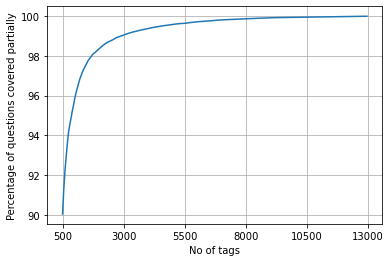

With 5500 tags we are covering  99.054 % of questions


In [16]:
fig, ax= plt.subplots()
ax.plot(questions_explained)
xlabel= list(500+np.array(range(-50, 450, 50))* 50)
ax.set_xticklabels(xlabel)
plt.xlabel("No of tags")
plt.ylabel("Percentage of questions covered partially")
plt.grid()
plt.show()
print("With", 5500, "tags we are covering ", questions_explained[50],"% of questions")

In [ ]:
multilabel_yx= tags_to_choose(5500)
print(f"No of questions that are not covered: {questions_explained_fn(5500)} out of {total_qs}")

In [18]:
print(f"No of tags in sample: {multilabel_y.shape[1]}")
print(f"No of tags taken: {multilabel_yx.shape[1]} ({(multilabel_yx.shape[1]/multilabel_y.shape[1])*100}%)")

No of tags in sample: 25498
No of tags taken: 5500 (21.570319240724764%)


<b>We consider top 15% which will cover 99% of the data</b>

## Split the data into the test and train (80:20)

In [18]:
total_size= preprocessed_data.shape[0]
train_size= int(0.80 * total_size)

x_train= preprocessed_data.head(train_size)
x_test= preprocessed_data.tail(total_size - train_size)

y_train= multilabel_yx[0: train_size, :]
y_test= multilabel_yx[train_size: total_size, :]

In [20]:
x_train.head()

,question,tags
0,sqlparamet pass method method like one method ...,c# sql methods parameters
1,use cygwin sshd xwin launch window applic remo...,windows-xp ssh cygwin remote-access xwindows
2,includ jqueri ui dialog went wordpress folder ...,wordpress jquery-ui admin
3,see modifi header inform error attempt redirec...,php email header
4,error messag return web api method omit non de...,asp.net iis asp.net-web-api


In [21]:
x_train.shape

(199998, 2)

In [22]:
print(f"Number of data points in train data: {y_train.shape}")
print(f"Number of data points in test data: {y_test.shape}")

Number of data points in train data: (199998, 5500)
Number of data points in test data: (50000, 5500)


## Featurizing data

In [19]:
start= datetime.now()
vectorizer= TfidfVectorizer(min_df= .00009, 
                            max_features= 200000, 
                            smooth_idf= True, 
                            norm="l2",
                            tokenizer= lambda x: x.split(),
                            sublinear_tf= False,
                            ngram_range=(1, 3))

x_train_multilabel= vectorizer.fit_transform(x_train['question'])
x_test_multilabel= vectorizer.transform(x_test['question'])
print(f"Time taken to run this cell: {datetime.now()- start}")

Time taken to run this cell: 0:01:29.420991


## Applying logistic regression with OneVsRest Classifier

In [24]:
classifier= OneVsRestClassifier(SGDClassifier(loss= 'log',
                                              alpha= 0.00001,
                                              penalty= 'l1'))
classifier.fit(x_train_multilabel, y_train)

OneVsRestClassifier(estimator=SGDClassifier(alpha=1e-05, loss='log',
                                            penalty='l1'))

In [27]:
predictions= classifier.predict(x_test_multilabel)

In [29]:
print(f"Accuracy : {metrics.accuracy_score(y_test, predictions)}")
print(f"Macro f1 score : {metrics.f1_score(y_test, predictions, average='macro')}")
print(f"Micro f1 score : {metrics.f1_score(y_test, predictions, average='micro')}")
print(f"Hamming loss : {metrics.hamming_loss(y_test, predictions)}")
print(f"Precision recall report : {metrics.classification_report(y_test, predictions)}")

Accuracy : 0.07902
Macro f1 score : 0.08701285975322393
Micro f1 score : 0.3707218978061864
Hamming loss : 0.0004142
Precision recall report :               precision    recall  f1-score   support

           0       0.60      0.22      0.32      3893
           1       0.77      0.44      0.56      3551
           2       0.82      0.56      0.66      3432
           3       0.74      0.42      0.54      3119
           4       0.94      0.75      0.84      2759
           5       0.85      0.64      0.73      2620
           6       0.69      0.33      0.45      1663
           7       0.87      0.60      0.71      1652
           8       0.70      0.39      0.50      1492
           9       0.78      0.43      0.55      1476
          10       0.50      0.15      0.23      1500
          11       0.83      0.58      0.68      1412
          12       0.51      0.11      0.18      1240
          13       0.56      0.25      0.34      1184
          14       0.58      0.20      0.30   

In [33]:
# Saving model to disk
import joblib
joblib.dump(classifier, "SO_model_250K.pkl")

['SO_model_250K.pkl']

In [20]:
import joblib
model_250k= joblib.load("SO_model_250K.pkl")

In [26]:
preds= model_250k.predict(x_test_multilabel)
print(f"Accuracy: {metrics.accuracy_score(y_test, preds)}")
print(f"Macro f1 score: {metrics.f1_score(y_test, preds, average='macro')}")
print(f"Micro f1 score: {metrics.f1_score(y_test, preds, average='micro')}")
print(f"Hamming loss: {metrics.hamming_loss(y_test, preds)}")
print('*' * 15 + " Precision recall report " + '*' * 15)
print(metrics.classification_report(y_test, preds))

Accuracy: 0.07902
Macro f1 score: 0.08701285975322393
Micro f1 score: 0.3707218978061864
Hamming loss: 0.0004142
***************Precision recall report***************
              precision    recall  f1-score   support

           0       0.60      0.22      0.32      3893
           1       0.77      0.44      0.56      3551
           2       0.82      0.56      0.66      3432
           3       0.74      0.42      0.54      3119
           4       0.94      0.75      0.84      2759
           5       0.85      0.64      0.73      2620
           6       0.69      0.33      0.45      1663
           7       0.87      0.60      0.71      1652
           8       0.70      0.39      0.50      1492
           9       0.78      0.43      0.55      1476
          10       0.50      0.15      0.23      1500
          11       0.83      0.58      0.68      1412
          12       0.51      0.11      0.18      1240
          13       0.56      0.25      0.34      1184
          14       0.5

## Modeling with less data points(150K data points) and more weights to title and 500 tags only

In [2]:
PROCESSED_DB_150 = "StackOverflowProcessed150.db"

In [35]:
sql_create_table= """
CREATE TABLE IF NOT EXISTS QuestionsProcessed(
    question text NOT NULL,
    code text,
    tags text,
    words_pre integer,
    words_post integer,
    is_code integer);
"""

create_database_table(PROCESSED_DB_150, sql_create_table)

Table in the database
QuestionsProcessed


In [9]:
read_db= TRAIN_NO_DUB
write_db= PROCESSED_DB_150
ROWS_FETCH= 150000

if os.path.isfile(read_db):
    conn_r= create_connection(read_db)
    if conn_r is not None:
        reader= conn_r.cursor()
        # selecting first 150k rows
        reader.execute(f"SELECT Title, Body, Tags FROM no_dub_train LIMIT {ROWS_FETCH}")
        
if os.path.isfile(write_db):
    conn_w= create_connection(write_db)
    if conn_w is not None:
        tables= check_table_exist(conn_w)
        writer= conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared all the rows")

Table in the database
QuestionsProcessed
Cleared all the rows


In [10]:
start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:
    
    is_code = 0
    
    title, question, tags = row[0], row[1], str(row[2])
    
    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x
    
    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
    
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))
    
    title=title.encode('utf-8')
    
    # adding title three time to the data to increase its weight
    # add tags string to the training data
    
    question=str(title)+" "+str(title)+" "+str(title)+" "+question
    
#     if questions_proccesed<=train_datasize:
#         question=str(title)+" "+str(title)+" "+str(title)+" "+question+" "+str(tags)
#     else:
#         question=str(title)+" "+str(title)+" "+str(title)+" "+question

    question=re.sub(r'[^A-Za-z0-9#+.\-]+',' ',question)
    words=word_tokenize(str(question.lower()))
    
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    
    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%100000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

number of questions completed= 100000
Avg. length of questions(Title+Body) before processing: 1222
Avg. length of questions(Title+Body) after processing: 430
Percent of questions containing code: 57
Time taken to run this cell : 0:03:40.024825


In [11]:
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

In [12]:
if os.path.isfile(PROCESSED_DB_150):
    conn_r= create_connection(PROCESSED_DB_150)
    if conn_r is not None:
        reader= conn_r.cursor()
        reader.execute("SELECT question from QuestionsProcessed LIMIT 10")
        print("Question after preprocessing")
        print("=" * 40)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-' * 30)
    conn_r.commit()
    conn_r.close()

Question after preprocessing
('dynam datagrid bind silverlight dynam datagrid bind silverlight dynam datagrid bind silverlight bind datagrid dynam code wrote code debug code block seem bind correct grid come column form come grid column although necessari bind nthank repli advanc ..',)
------------------------------
('java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid follow guid link instal jstl got follow error tri launch jsp page java.lang.noclassdeffounderror javax servlet jsp tagext taglibraryvalid taglib declar instal jstl 1.1 tomcat webapp tri project work also tri version 1.2 jstl still messag caus solv',)
------------------------------
('java.sql.sqlexcept microsoft odbc driver manag invalid descriptor index java.sql.sqlexcept microsoft odbc driver manag invalid descriptor index java.sql.sqlexcept microsoft odbc dr

In [13]:
PROCESSED_DB_150

'StackOverflowProcessed150.db'

In [14]:
# Taking 150k data entries into a dataframe
if os.path.isfile(PROCESSED_DB_150):
    conn_r= create_connection(PROCESSED_DB_150)
    if conn_r is not None:
        preprocessed_data= pd.read_sql_query("""
        SELECT question, Tags FROM QuestionsProcessed
        """, conn_r)
conn_r.commit()
conn_r.close()

In [15]:
preprocessed_data.head()

,question,tags
0,dynam datagrid bind silverlight dynam datagrid...,c# silverlight data-binding
1,dynam datagrid bind silverlight dynam datagrid...,c# silverlight data-binding columns
2,java.lang.noclassdeffounderror javax servlet j...,jsp jstl
3,java.sql.sqlexcept microsoft odbc driver manag...,java jdbc
4,better way updat feed fb php sdk better way up...,facebook api facebook-php-sdk


In [16]:
print(f"No of data points in sample: {preprocessed_data.shape[0]}")
print(f"No of dimensions: {preprocessed_data.shape[1]}")

No of data points in sample: 149999
No of dimensions: 2


<b>Converting string tags to multilable output variables</b>

In [22]:
vectorizer= CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y= vectorizer.fit_transform(preprocessed_data['tags'])

<b>Selecting 500 tags</b>

In [23]:
questions_explained= []
total_tags= multilabel_y.shape[1]
total_qs= preprocessed_data.shape[0]

for i in range(500, total_tags, 100):
    questions_explained.append(
        np.round(
            ((total_qs-questions_explained_fn(i))/total_qs)*100, 
            3
        )
    )

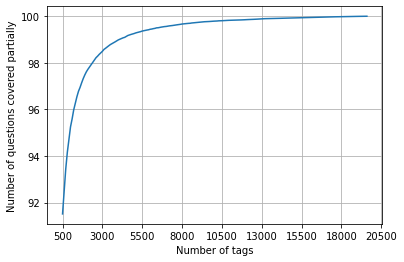

With 5500 tags we are covering 99.363 of questions
With 500 tags we are covering 91.515 of questions


In [26]:
# plotting
fig, ax= plt.subplots()
ax.plot(questions_explained)
xlabel= list(500 + np.array(range(-50, 450, 50))* 50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Number of questions covered partially")
plt.grid()
plt.show()
print(f"With 5500 tags we are covering {questions_explained[50]} of questions")
print(f"With 500 tags we are covering {questions_explained[0]} of questions")


In [34]:
# We will be using 500 tags
multilabel_yx= tags_to_choose(500)
print(f"Number of questions that are not covered: {questions_explained_fn(500)} out of {total_qs}")

Number of questions that are not covered: 12728 out of 149999


In [35]:
# Splitting data into train and test data
total_size= preprocessed_data.shape[0]
train_size= int(0.80 * total_size)

x_train= preprocessed_data.head(train_size)
x_test= preprocessed_data.tail(total_size - train_size)

y_train= multilabel_yx[0: train_size]
y_test= multilabel_yx[train_size: total_size]

In [36]:
print(f"Number of data points in train data: {y_train.shape}")
print(f"Number of data points in test data: {y_test.shape}")

Number of data points in train data: (119999, 500)
Number of data points in test data: (30000, 500)


### Featurization data with TfidfVectorizer

In [42]:
vectorizer= TfidfVectorizer(min_df= 0.00009,
                           max_features= 200000,
                           smooth_idf= True,
                           norm= 'l2',
                           tokenizer= lambda x: x.split(),
                           sublinear_tf= False,
                            ngram_range= (1, 3))
x_train_multilabel= vectorizer.fit_transform(x_train['question'])
x_test_multilabel= vectorizer.transform(x_test['question'])

In [44]:
print(f"Dimensions of train data X: {x_train_multilabel.shape}, Y: {y_train.shape}")
print(f"Dimensions of test data X: {x_test_multilabel.shape}, Y: {y_test.shape}")

Dimensions of train data X: (119999, 101482), Y: (119999, 500)
Dimensions of test data X: (30000, 101482), Y: (30000, 500)


### Applying Logistic Regression with OneVsRest Classifier

In [46]:
classifier= OneVsRestClassifier(SGDClassifier(loss='log',
                                              alpha=0.00001, 
                                              penalty='l1'),
                               n_jobs= -1)
classifier.fit(x_train_multilabel, y_train)

OneVsRestClassifier(estimator=SGDClassifier(alpha=1e-05, loss='log',
                                            penalty='l1'),
                    n_jobs=-1)

In [48]:
predictions= classifier.predict(x_test_multilabel)

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Hamming loss: {metrics.hamming_loss(y_test, predictions)}")
print()

precision= precision_score(y_test, predictions, average='micro')
recall= recall_score(y_test, predictions, average='micro')
f1= f1_score(y_test, predictions, average='micro')

print("Micro average quality numbers")
print(f"Precision: {np.round(precision, 4)}, Recall: {np.round(recall, 4)}, F1: {np.round(f1)}")
print()
precision= precision_score(y_test, predictions, average='macro')
recall= recall_score(y_test, predictions, average='macro')
f1= f1_score(y_test, predictions, average='macro')

print("Macro average quality numbers")
print(f"Precision: {np.round(precision, 4)}, Recall: {np.round(recall, 4)}, F1: {np.round(f1)}")

print()
print("\t\t\tMetrics classification report")
print(metrics.classification_report(y_test, predictions))

Accuracy: 0.20406666666666667
Hamming loss: 0.0030256

Micro average quality numbers
Precision: 0.715, Recall: 0.3141, F1: 0.0

Macro average quality numbers
Precision: 0.5451, Recall: 0.2369, F1: 0.0

			Metrics classification report
              precision    recall  f1-score   support

           0       0.80      0.32      0.45      1111
           1       0.71      0.17      0.27      2052
           2       0.68      0.35      0.47      2388
           3       0.76      0.49      0.60      2226
           4       0.83      0.43      0.56      2014
           5       0.56      0.11      0.18       642
           6       0.82      0.35      0.49      1756
           7       0.92      0.61      0.74      1690
           8       0.64      0.19      0.29       341
           9       0.78      0.77      0.77      2344
          10       0.68      0.35      0.46       821
          11       0.58      0.21      0.30      1143
          12       0.85      0.33      0.47       768
        

# TODO

1. Use bag of word upto 4 n grams and compute the micro f1 score with logistic regression (OvR).
2. Perform hyperparameter tu